# How do founders' educational background impact the startup funding?

## Introduction

This paper provides in-depth analysis into the question "How does the educational background of founders in startups correlate with the amount of funding that companies receive?" by examining key independent variables against the main dependent variable: amount of fundings received in USD. Founders have always been the driving force of startups and often the determinant for the level of success that corporations can achieve. This project explores this assumption as the educational background of founders will be assessed against the fundings raised by companies.

The dataset that will be explored in the project is the Startup Investments dataset retrieved from Kaggle, attributed to Crunchbase's 2013 Snapshot dataset. Three main tables from this dataset will be reviewed extensively: objects.csv, degrees.csv and relationships.csv. The objects.csv table contains the overall information of the companies and employees, the main columns of interest are the company id and the total amount of funding in USD. The degrees.csv table contains information about the educational backgrounds of employees and the relationships.csv has information about each employee and their connections to and positions in companies. These three tables will be merged to create the main dataframe, which is the foundation of the project for variable analysis to be built on. 

There are fundamental aspects of educational background that will be examined in this paper, including the number of degrees, institutions attended, the level of education (depth) achieved and the types of field that startups founders studied. These variables are picked based on the assumption that they can be factors that investors consider when doing a background check on founders of companies they want to invest in.

These three aspects will be divided into 5 independent variables to assess against the dependent variable of total funds raised. The 5 independent variables are: 
- 1) The number of Art (BA + MA degrees) and Science (BS + MS degrees) degrees of the founders
- 2) Level of education (Bachelor, Master and PhD) of the founders
- 3) The average number of degrees that founders of startups hold (The average is taken since start-ups can have multiple co-founders)
- 4) The STEM designation for founders’ highest level of education (whether the founders’ highest level of education is in a STEM field or not)
- 5) The Ivy League designation for founders’ (whether the founders have studied at an Ivy League school or not)

While independent variables 1) and 3) showed no significant correlation to the dependent variables (the amount of fundings raised by companies). Exploration of the other variables indicate 3 main findings:
- A higher level of education for founders is associated with a higher average total funding raised by their companies. The discrepancy in average total funding for startups between the Master and PhD level is the most substantial. 
- Startups that have founders who had the highest education in a STEM field on average tend to raise more funding and can have a higher upper bound range of funding than startups by non-STEM founders. 
- Startups that have founders who studied in Ivy League Institutions on average tend to raise more funding and can have a higher upper bound range of funding than startups by non-Ivy founders. 

For the purpose of providing clarification in analysis, outliers have been neglected. The Main Message that can be derived from further analysis is that, on average, higher education levels and STEM qualifications for founders is associated with a wider range of total funding, with a higher upper bound for startups. At the PhD-level of highest education for founders, there is no noticeable difference between STEM and non-STEM founders, however,  startups’ funding can range up to exceedingly higher levels than that of Master or Bachelor. 

This is consistent with the findings of a paper that analyzed 4953 digital startups, which stated that founders with a technical education are more likely to raise equity investment although at higher levels of education the effects of a technical education reduces (Ratzinger et al., 2018). Another paper also provides some support, underlining that startup founders that have higher academic qualifications tend to receive improved funding for their companies, under the conditions that they do not study in different fields (Franco et al., 2021). Not only limited to the US, there is some evidence to indicate that these findings can be replicated in other countries as well. In Indonesia, a paper analyzed 207 digital startup entrepreneurs to find that entrepreneurs who pursued further education notably improved their likelihood of attaining increased levels of investment (Furqon et al., 2023).

Human Capital Theory can offer possible explanations for these trends. The theory states that education is a major contributory factor to human capital, which dictates the productivity and economic influence of an individual (Ross, 2023). Despite certain limitations, this theory still holds weight in the modern business world and has been supported by research papers. There has also been specific evidence for how higher education and STEM-education specifically have a significant impact on increasing human capital. 

According to Adedeji and Campbell (2013), higher education is a must-have factor for the development of human capital and economic growth. In addition, Winters (2014) stated in his paper that STEM-education has a significant positive impact on an individual’s level of productivity. Even further, STEM-graduates have been found to create positive externalities, and indirectly increase the wage of people in their environment. This can be the result of the substantial impact to productivity that STEM-educated people have on their team settings, leading to higher wages for members, or other externalities. At any rate, research has shown that having a STEM education and higher levels of education propel productivity and economic growth (human capital) significantly. Based on this information, it is easy to understand that investors would prefer individuals with these educational characteristics as the leaders of companies that they invest in.

Different types of state-level maps provide some support to the Main Message although there were many inconsistencies due to the different distributions of startups in each state. In other words, to a certain extent states that have a high average educational level, percentage of STEM founders and proportion of Ivy League-educated founders tend to be the same ones that have higher average funding for startups, although this is not true for some states. Other findings from mapping states include:
1) Many startups appear to have offices located near the institutions of the founders’ highest educational level, presumably for traveling and campus resource utilization purposes. 
2) There is a high concentration in Northeastern states, CA, WA and FL.
Most Western US states have noticeably high STEM-founders percentage
3) In the West Coast, Northeastern and other states like IN, UT, there is a high percentage of schools from these areas which have produced startup founders. This indicate a healthy educational ecosystem for startups founders in these regions.

Investigating the specific characteristics of founders' schools that may have an impact of startup fundings, this paper found that the employer reputation, citation per faculty, faculty-student ratio, international faculty, international students ratios and sustainability of said schools can have a marginal  poitive influence over startups' fundraising endeavors. Out of all of these factors, schools' employer reputation and international student ratio appears to be the most decisive, although the similar correlations between all factors and startup funding indicate that higher quality schools in general (scoring well in all of these characteristics), produce founders with higher funding. This is consistent with the Ivy League observation and further supported by the finding that schools that are rated in the top rankings on average receive higher funding than unrated institutions.


## Data Cleaning/Loading

## Project 1

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import binscatter as bs

In [2]:
objects = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\ECO225\A Datasets\Startups Investments\objects.csv", low_memory=False)
degrees = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\ECO225\A Datasets\Startups Investments\degrees.csv", low_memory=False)
relationships = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\ECO225\A Datasets\Startups Investments\relationships.csv", low_memory=False)
offices = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\ECO225\A Datasets\Startups Investments\offices.csv", low_memory=False)

Checking if the data has been imported correctly

In [3]:
#objects.head()

### Data Cleaning

Cleaning, filtering and renaming columns to have consistency in formating and prepare objects.csv for merging

In [4]:
objects.rename(columns={'id': "company_id"}, inplace=True)

In [5]:
objects_df = objects.loc[objects["entity_type"] == "Company"]

In [6]:
objects_df = objects_df[["company_id", "name", "funding_total_usd"]]

In [7]:
objects_df.rename(columns={'name': "company_name"}, inplace=True)

Checking for duplicated rows

In [8]:
objects_df.duplicated().sum()

0

Basic information of the dataframe

In [9]:
objects_df.shape

(196553, 3)

In [10]:
objects_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196553 entries, 0 to 196552
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_id         196553 non-null  object 
 1   company_name       196552 non-null  object 
 2   funding_total_usd  196553 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.0+ MB


Cleaning, filtering and renaming columns to have consistency in formating and prepare degrees.csv for merging

In [11]:
degrees.rename(columns={'object_id': "person_object_id"}, inplace=True)

In [12]:
degrees_df = degrees[["person_object_id", "degree_type", "subject", "institution"]]

Checking for duplicated rows, removing duplicated rows

In [13]:
degrees_df.duplicated().sum()

313

In [ ]:
degrees_df.drop_duplicates(inplace=True)

In [15]:
#degrees_df.head()

Basic information of the dataframe

In [16]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109297 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person_object_id  109297 non-null  object
 1   degree_type       98143 non-null   object
 2   subject           81105 non-null   object
 3   institution       109242 non-null  object
dtypes: object(4)
memory usage: 4.2+ MB


Cleaning, filtering and renaming columns to have consistency in formating and prepare relationships.csv for merging

In [17]:
relationships.rename(columns={'relationship_object_id': "company_id"}, inplace=True)

In [18]:
relationships_df = relationships[["person_object_id", "company_id", "title"]]

Checking and removing duplicated rows

In [19]:
relationships_df.duplicated().sum()

211

In [ ]:
relationships_df.drop_duplicates(inplace=True)

In [21]:
#relationships_df.head()

Basic information of the dataframe

In [22]:
relationships_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402667 entries, 0 to 402877
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person_object_id  402667 non-null  object
 1   company_id        402667 non-null  object
 2   title             389328 non-null  object
dtypes: object(3)
memory usage: 12.3+ MB


### Merging datasets

In [23]:
degree_relationship = pd.merge(degrees_df, relationships_df, how="left", on="person_object_id")
#degree_relationship.head()

Checking and removing duplicate rows

In [24]:
degree_relationship.duplicated().sum()

0

In [25]:
degree_relationship.drop_duplicates(inplace=True)

In [26]:
main_df = pd.merge(degree_relationship, objects_df, how="left", on="company_id")
main_df.head(10)

,person_object_id,degree_type,subject,institution,company_id,title,company_name,funding_total_usd
0,p:6117,MBA,NaN,NaN,c:2430,CEO,Accell Telesystems,0.0
1,p:6136,BA,"English, French","Washington University, St. Louis",NaN,NaN,NaN,NaN
2,p:6136,MS,Mass Communication,Boston University,NaN,NaN,NaN,NaN
3,p:6005,MS,Internet Technology,University of Greenwich,c:2360,CEO,Yulop,0.0
4,p:6005,MS,Internet Technology,University of Greenwich,c:2467,Senior Developer,EDS,0.0
5,p:5832,BCS,"Computer Science, Psychology",Rice University,c:2033,senior software engineer,HotPads,2300000.0
6,p:5832,BCS,"Computer Science, Psychology",Rice University,c:20688,CFO,Greetz,15870000.0
7,p:1017,BS,Computer Science,Northeastern University,c:300,Founder,PodTech,7500000.0
8,p:1017,BS,Computer Science,Northeastern University,c:15531,"Founder, CEO, Chief R&D",Broadband Developments,0.0
9,p:1017,BS,Computer Science,Northeastern University,c:2420,"Vice President, Product",RealNames,0.0


Checking for duplicated rows

In [27]:
main_df.duplicated().sum()

0

Dropping rows that have no values in areas of interest

In [28]:
main_df.dropna(subset=['company_id','funding_total_usd', 'degree_type'], inplace=True)

Get only the rows that have founders' information and their companies that have raised money

In [29]:
main_df = main_df.loc[(main_df['funding_total_usd'] > 0) & (main_df['title'].str.contains('Founder'))]
#main_df.head()

## Summary Statistics Tables

### Primary dependent variable (Y): The total funding raised in USD ('funding_total_usd')

The total funding raised is a crucial indicator of a company's success. Having significant fundings allow startups to grow at an accelerated rate, invest in research and development projects and enhance marketing and branding opportunity. At the beginning of their lifespan where startups are struggling to break even in their business, fundings are sometimes the main factor keeping the company afloat in the market. Raising funds are one of the first major issue that startups owners have to tackle in order to maintain longevity. The company has to have an overall decent business prospect in order to attract funding from investors. In this light, the total amount of funding raised can be viewed as a significant signal of success. 

Data of fundings for each company that received fundings

In [30]:
fundings_graph = objects_df.loc[objects_df["funding_total_usd"] > 0].dropna(subset=['funding_total_usd']).drop_duplicates(subset=['company_id'])
#fundings_graph.head()

Average funding raised in USD for each company

In [31]:
average_funding = fundings_graph["funding_total_usd"].mean()
average_funding

14816520.421073401

### 1st independent variable (x): ARTS vs SCIENCES - The number of bachelor of arts (BA) and master of sciences (MA) vs the number of bachelor of sciences (BS) and master of sciences (MS)

In the recruiting process, one important factor that the hiring manager need to consider is the candidate's type of degree. The two main factions of arts and sciences each provides a different set of value and expertise to a startup, leading to a question of which type of degree is better. One way to determine this is investigating which types of degree that investors might prefer to see in the founders' educational background. As a result, the number of degrees in arts and sciences (both Bachelor and Masters) for each company has been chosen as a variable to examine whether this figure has a tangible effect on a startup's fundings, and if so, what faction correlates with higher funding. 

In [32]:
ba_bs_df = main_df.loc[(main_df['degree_type'].isin(["BA", "BS", "MA", "MS"]))]
#ba_bs_df.head()

In [33]:
ba_bs_df.shape

(5859, 8)

Createing arts_degree_count and sciences_degree_count columns to count the number of degrees that each company has for the arts (MA + BA) and sciences(MS + BS) factions.

In [34]:
grouped_df = ba_bs_df.groupby('company_id').agg({'degree_type': lambda x: (x == 'BA').sum() + (x == 'MA').sum(), 'funding_total_usd': 'first'})
grouped_df.rename(columns={'degree_type': 'arts_degree_count'}, inplace=True)
grouped_df['sciences_degree_count'] = ba_bs_df.groupby('company_id')['degree_type'].apply(lambda x: (x == 'BS').sum() + (x == 'MS').sum())
grouped_df.reset_index(inplace=True)
grouped_df = grouped_df.reindex(columns=['company_id', 'arts_degree_count', 'sciences_degree_count', 'funding_total_usd'])
grouped_df = grouped_df.loc[(grouped_df['arts_degree_count'] < 5) & (grouped_df['sciences_degree_count'] < 5)]

Get the average funding for a number of art degree that the founder has

In [35]:
art_deg_df = grouped_df.groupby('arts_degree_count').agg({'funding_total_usd': 'mean'}).reset_index()
art_deg_df.rename(columns={'arts_degree_count': 'degree_count', 'funding_total_usd': 'funding_art'}, inplace=True)
#art_deg_df.head()

Get the average funding for a number of science degree that the founder has

In [36]:
sci_deg_df = grouped_df.groupby('sciences_degree_count').agg({'funding_total_usd': 'mean'}).reset_index()
sci_deg_df.rename(columns={'sciences_degree_count': 'degree_count', 'funding_total_usd': 'funding_sci'}, inplace=True)
#sci_deg_df.head()

Merge the two dataframe

In [37]:
art_sci_df = pd.merge(sci_deg_df, art_deg_df, on="degree_count")
art_sci_df['funding_sci'] = art_sci_df['funding_sci']/1000000
art_sci_df['funding_art'] = art_sci_df['funding_art']/1000000
#art_sci_df.head()

### 2st independent variable(x): Level of Education

The level of education of the founders is another possible element for investor to consider when making investment decisions in a startup. There is a notion that a higher level of academic qualification is synonymous with a higher degree of skills and expertise, and this translates directly to a deeper understanding of the field for the founder. This analysis will assess this notion to determine whether investors are more inclined to invest in startups where the leader has a generally higher average level of education. In specific, this analysis will categorize the level of education into 3 main levels: Bachelor, Masters and PhD, and find the average fundings from companies that have founders at each level of education. 

In [38]:
lv_education_df = main_df.loc[(main_df['degree_type'].str.startswith("PhD")) | (main_df['degree_type'].str.startswith("B")) | (main_df['degree_type'].str.startswith("M"))]
#lv_education_df.head()

Creating the education_lv column to determine the level of education from degree types, although there will be certain errors in categorization due to the inconsistencies of the original dataset, it is expected that these errors will be minimal

In [ ]:
lv_education_df['education_lv'] = lv_education_df['degree_type'].apply(lambda x: 'Bachelor' if x.startswith('B') else 'Master' if x.startswith('M') else 'PhD' if x == 'PhD' else None)
#lv_education_df.head()

Checking and removing inconsistencies in data

In [40]:
lv_education_df['education_lv'].isna().sum()

10

In [ ]:
lv_education_df.dropna(subset=['education_lv'], inplace=True)

Create a ranking system for each level of education to determine the highest education level of an employee. The values 1, 2, 3 correspond to Bachelor, Masters and PhD, respectively

In [ ]:
lv_education_df['education_lv_int'] = lv_education_df['education_lv'].apply(lambda x: 1 if x == 'Bachelor' else 2 if x == 'Master' else 3 if x == 'PhD' else None)
#lv_education_df.head()

Each employee and their highest level of education

In [43]:
highest_education_df = lv_education_df.loc[lv_education_df.groupby('person_object_id')['education_lv_int'].idxmax()]
highest_education_df = highest_education_df[['person_object_id', 'education_lv_int']]
highest_education_df.rename(columns={'education_lv_int': 'education_lv_index'}, inplace=True)
#highest_education_df.head()

In [44]:
highest_edu_fd = lv_education_df.loc[lv_education_df.groupby('person_object_id')['education_lv_int'].idxmax()]
highest_edu_fd = highest_edu_fd[['person_object_id', 'education_lv']]
highest_edu_fd.rename(columns={'education_lv': 'highest_education_lv'}, inplace=True)
#highest_edu_fd.head()

Adding the highest level of education column to the dataframe

In [45]:
main_lv_education = pd.merge(lv_education_df, highest_edu_fd, how="left", on="person_object_id")
#main_lv_education.head()

Getting the rows that show the highest level of education of each employee

In [46]:
main_lv_education = main_lv_education[main_lv_education['education_lv'] == main_lv_education['highest_education_lv']]
#main_lv_education.head()

The average funding a company received from a degree in each level of education

In [47]:
average_funding_edu_lv_df= main_lv_education.groupby("highest_education_lv")["funding_total_usd"].mean().reset_index().sort_values("funding_total_usd", ascending=False)
average_funding_edu_lv_df.head()

,highest_education_lv,funding_total_usd
2,PhD,4.010149e+07
1,Master,2.156721e+07
0,Bachelor,2.118570e+07


### 3rd independent variable(x): Average number of degrees of founders 

The founders are the driving forces of every startup, these individuals chart the course and navigate the companies through the turbulence of the business world. One of the first thing investors will examine when considering investment options are the founders, as having qualified founders are pivotal in ensuring that the startup with flourish and investors will get a healthy return on investments. Provided this, the number of degrees that the founders hold can be an indicator for investors to assess the ability of founders and the extent of their knowledge in the field. Therefore, this variable has been chosen to see if there are noticeable impact on total funding.

Getting rows of the founder and co-founders

In [48]:
founder_df = main_df.dropna(subset=['title'])
#founder_df.head()

Getting the number of degrees that each of the founders/co-founders have

In [49]:
df_no_dg = founder_df.groupby('person_object_id').size().reset_index(name='number_of_degrees')
#df_no_dg.head()

Adding the number of degrees column to the dataframe

In [50]:
merged_df1 = pd.merge(founder_df, df_no_dg, how='left', on='person_object_id')
#merged_df1.head()

Getting the average number of degrees from founders/co-founders of each startup

In [51]:
company_grouped_df = merged_df1.groupby('company_id')['number_of_degrees'].mean().reset_index(name='average_number_of_degrees')
#company_grouped_df.head()

Getting the average_number_of_degrees column int the dataframe

In [52]:
merged_df2 = pd.merge(merged_df1, company_grouped_df, how='left', on='company_id')
#merged_df2.head()

Getting the info of companies and the average number of degrees of founders

In [53]:
founder_degree_df = merged_df2[['company_id', 'funding_total_usd', 'average_number_of_degrees']].drop_duplicates().sort_values('funding_total_usd', ascending=False)
#founder_degree_df.head()

### 4th independent variable(x): STEM vs non-STEM founders

The subject that founders studied are one of the most important factor of their educational background. In startups, there exists a contrast between founders who have the an education background in STEM field versus those who do not, and this has the potential to affect investors' decision making, since knowing the expertise of the business leaders is pivotal to determining their ability. To investigate the potential discrepancy between funding of startups owned by STEM vs non-STEM founders, the average fundings from companies that have founders possessing a degree from each subject in the top 10 most common areas will be examined. 

Drop possible missing values

In [54]:
filtered_edu_na_fd = main_lv_education.dropna(subset=['title'])
#filtered_edu_na_fd.head()

Cleaning and reformatting the subject column. For rows that has multiple subjects (seperated by "," and " &"), we will only keep the first subject as from observation it is often the main subject of study, correlating with the degree_type.

In [55]:
filtered_edu_na_fd['subject'] = filtered_edu_na_fd['subject'].str.lower()
filtered_edu_na_fd['subject'] = filtered_edu_na_fd['subject'].str.split(',| &| and').str[0].str.strip()
#filtered_edu_na_fd.head()

Create a list of the main STEM subjects created from analyzing the dataset's value counts with additional suggestions from ChatGPT

In [56]:
stem_fields = ["science", "technology", "engineering", "mathematics", "math", "maths", "physics", "chemistry", "biology", "computer science", "astronomy", "earth science", "environmental science", "materials science", "neuroscience", "biomedical engineering", "civil engineering", "mechanical engineering", "electrical engineering", "chemical engineering", "biochemistry", "genetics", "mathematical biology", "statistics", "applied mathematics", "operations research", "robotics", "artificial intelligence", "machine learning", "data science", "geology", "geophysics", "meteorology", "oceanography", "agricultural science", "forestry", "ecology", "biotechnology", "nanotechnology", "bioinformatics", "photonics", "space science", "astrophysics", "planetary science", "nuclear engineering", "optical engineering", "systems engineering", "information systems", "industrial engineering", "computer engineering"]

Add a STEM_designation column and new STEM_dummy column  that indicate if the subject is a STEM field or not and a funding_in_millions column that shows total fundings in millions for visualization purposes

In [57]:
filtered_edu_na_fd['STEM_designation'] = filtered_edu_na_fd['subject'].apply(lambda x: 'STEM' if x in stem_fields else 'non-STEM')
filtered_edu_na_fd['STEM_dummy'] = filtered_edu_na_fd['STEM_designation'].apply(lambda x: 1 if x == 'STEM' else 0)
filtered_edu_na_fd['funding_in_millions'] = filtered_edu_na_fd['funding_total_usd'] / 1000000
#filtered_edu_na_fd.head()

### 5th independent variable(x): Founders who studied at multiple institutions vs one institution

Another indicator of the quality of the founders based on their educational background is the institutions that they attended. Ivy League schools are renowned around the world for their quality of education, facilities and resources. These characteristics can be assumed to have helped founders during the development of their startups and potentially making their ventures more successful and investment-worthy. This analysis will explore this theory by examining the possibility of whether having an Ivy League education for founders can be a factor in the funding decision-making process for investors. 

Make a dataframe that has no null values for institutions

In [58]:
ivy_df = main_df.dropna(subset=['institution'])

Make a list of Ivy League institutions' names

In [59]:
ivy_schools = ["Harvard University", "Yale University", "Princeton University", "Columbia University", "University of Pennsylvania", "Brown University", "Dartmouth College", "Cornell University"]

Since many of the values in institutions record different departments of the same university, the column will be formatted for aggregating purposes. Darthmouth College has been left out of formating since there is no startup in the dataset that has been founded by a Darthmouth College alumni.

In [60]:
ivy_df.loc[ivy_df['institution'].str.contains('Stanford', case=False), 'institution'] = 'Stanford University'
ivy_df.loc[ivy_df['institution'].str.contains('Harvard', case=False), 'institution'] = 'Harvard University'
ivy_df.loc[ivy_df['institution'].str.contains('Yale', case=False), 'institution'] = 'Yale University'
ivy_df.loc[ivy_df['institution'].str.contains('Columbia University', case=False), 'institution'] = 'Columbia University'
ivy_df.loc[ivy_df['institution'].str.contains('University of Pennsylvania', case=False), 'institution'] = 'University of Pennsylvania'
ivy_df.loc[ivy_df['institution'].str.contains('Brown University', case=False), 'institution'] = 'Brown University'
ivy_df.loc[ivy_df['institution'].str.contains('Cornell University', case=False), 'institution'] = 'Cornell University'

In [ ]:
ivy_df['funding_in_millions'] = ivy_df['funding_total_usd'] / 1000000
ivy_df['ivy_designation'] = ivy_df['institution'].apply(lambda x: 'Ivy League' if x in ivy_schools else 'non-Ivy-League')
ivy_df['ivy_int'] = ivy_df['ivy_designation'].apply(lambda x: 1 if x == 'Ivy League' else 0)
#ivy_df.head()

In [62]:
ivy_dummy_df = ivy_df.groupby('person_object_id')['ivy_int'].max().reset_index(name='ivy_dummy')
ivy_fd_df = pd.merge(ivy_df, ivy_dummy_df, how='left', on='person_object_id')
#ivy_fd_df.head()

In [63]:
ivy_dummy_comp = ivy_df.groupby('company_id')['ivy_int'].max().reset_index(name='has_ivy_founder')
ivy_comp_df = ivy_fd_df.merge(ivy_dummy_comp, how='left', on='company_id')
#ivy_comp_df.head()

### Main Summary Statistics Table

Preparing dataframe variables for merging into the summary statistics table

The number of arts and science degree of the company's founders

In [64]:
summary_grouped_df = grouped_df[['company_id', 'arts_degree_count', 'sciences_degree_count']]
#summary_grouped_df.head()

The highest level of education of the company's founders

In [65]:
#highest_education_df.head()

The average number of degrees of the company's founders

In [66]:
founder_degree_df.rename(columns={'average_number_of_degrees': 'avg_no_degrees_fd'}, inplace=True)
summary_founder_degree_df = founder_degree_df[['company_id', 'avg_no_degrees_fd']]
#summary_founder_degree_df.head()    

The STEM designation of the founders' highest level of education

In [67]:
summary_filtered_edu_na_fd = filtered_edu_na_fd[["person_object_id", "STEM_dummy"]].drop_duplicates()
#summary_filtered_edu_na_fd.head()

The number of institutions the founders attended

In [68]:
summary_ivy_fd_df = ivy_fd_df[["person_object_id", "company_id", "ivy_dummy", "funding_in_millions"]].drop_duplicates()
#summary_ivy_fd_df.head()

Creating the summary statistics table with the 5 independent variables and 1 dependent variables (funding_in_millions)

In [69]:
summary_1 = pd.merge(summary_ivy_fd_df, summary_filtered_edu_na_fd, how="inner", on="person_object_id")
summary_2 = pd.merge(summary_1, summary_founder_degree_df, how="inner", on="company_id")
summary_3 = pd.merge(summary_2, highest_education_df, how="inner", on="person_object_id")
main_summary_stat = pd.merge(summary_3, summary_grouped_df, how="inner", on="company_id")
new_order = ['person_object_id', 'company_id', 'arts_degree_count', 'sciences_degree_count', 'education_lv_index', 'avg_no_degrees_fd',  'STEM_dummy', 'ivy_dummy',  'funding_in_millions']
main_summary_stat.reindex(columns=new_order)
main_summary_stat.rename(columns={'ivy_dummy': 'attended_ivy_league', 'STEM_dummy': 'studied_STEM_field', 'avg_no_degrees_fd': 'founders_avg_no_of_degrees', 'education_lv_index':'highest_education_index', 'arts_degree_count': 'founders_no_of_art_degrees', 'sciences_degree_count':  'founders_no_of_sciences_degrees'}, inplace=True)
main_summary_stat.head()

,person_object_id,company_id,attended_ivy_league,funding_in_millions,studied_STEM_field,founders_avg_no_of_degrees,highest_education_index,founders_no_of_art_degrees,founders_no_of_sciences_degrees
0,p:1017,c:300,0,7.50,0,2.000000,2,0,1
1,p:5412,c:255914,0,0.65,0,2.000000,2,1,1
2,p:1243,c:174451,0,6.00,0,4.333333,1,1,1
3,p:69821,c:174451,0,6.00,0,4.333333,1,1,1
4,p:69821,c:36151,0,66.00,0,6.000000,1,0,1


In [70]:
main_summary_stat.info

<bound method DataFrame.info of      person_object_id company_id  attended_ivy_league  funding_in_millions  \
0              p:1017      c:300                    0                7.500   
1              p:5412   c:255914                    0                0.650   
2              p:1243   c:174451                    0                6.000   
3             p:69821   c:174451                    0                6.000   
4             p:69821    c:36151                    0               66.000   
...               ...        ...                  ...                  ...   
5306         p:115029   c:140490                    0                0.250   
5307         p:115029   c:277356                    0                0.325   
5308         p:253595   c:277356                    0                0.325   
5309          p:38583    c:27883                    0               23.990   
5310         p:174048   c:184680                    0               22.600   

      studied_STEM_field  found

In [71]:
main_summary_stat.describe()

,attended_ivy_league,funding_in_millions,studied_STEM_field,founders_avg_no_of_degrees,highest_education_index,founders_no_of_art_degrees,founders_no_of_sciences_degrees
count,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000
mean,0.181698,24.230305,0.309358,2.211134,1.595933,0.567501,1.224816
std,0.385632,83.957226,0.462272,1.926570,0.638217,0.759813,1.008399
min,0.000000,0.001003,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.961000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,4.600000,0.000000,2.000000,2.000000,0.000000,1.000000
75%,0.000000,19.714177,1.000000,2.500000,2.000000,1.000000,2.000000
max,1.000000,2425.700000,1.000000,28.000000,3.000000,4.000000,4.000000


In [72]:
main_summary_stat['highest_education_index'].value_counts()

highest_education_index
1    2588
2    2281
3     442
Name: count, dtype: int64

The main summary statistic table reveals interesting information about the independent and dependent variables. For the first independent variable (the count of art and science degrees), it seems that founders of startups on average have more science degrees rather than art degrees. Regarding the average number of degrees held by founders, the summary statistics table reveals that on average founders of startups have more than two academic qualifications. However, it is worth noting that the maximum amount of degrees of 28 is an extreme outliers that is impossible, presumably errors caused by the original dataset's inconsistencies, indicating that the average number of degrees held by founders has been skewed by outliers and should be less than 2.2.

The education level index (an index that assigns the values 1, 2, 3 to Bachelor, Masters and PhD degrees, respectively) has an average of 1.64, indicating that a considerable number of startup founders have a higher degree than the Bachelor level. Specifically, according to value_count, founders who have Bachelor and Master as their highest education level each take up roughly 45% (~2700 founders) of the dataset; only around 10% (535 founders) of the founders have achieved a PhD-level education. Additionally, around 30% of founders studied a STEM field for their highest level of education and 16.5% of founders studied at an Ivy League school. 

Lastly, the independent variable summary statistics (funding_in_millions) shows that the average funding of a startup is $25 million, which is once again somewhat skewed by the outliers as can be seen from the maximum amount of funding that a startup in the dataset received: $2.5 billion. It is important to note that all of these variables are only estimations due to the nature of the dataset, having founders who started multiple companies and companies started by multiple co-founders.

## Plots, Histograms, Figures

### Primary dependent variable (Y): The total funding raised in USD ('funding_total_usd')

Firstly, let's examine the distribution of the total fundings in USD for each company in the dataset, which will be our primary dependent variable. For visualization purposes, a version without outliers is provided.

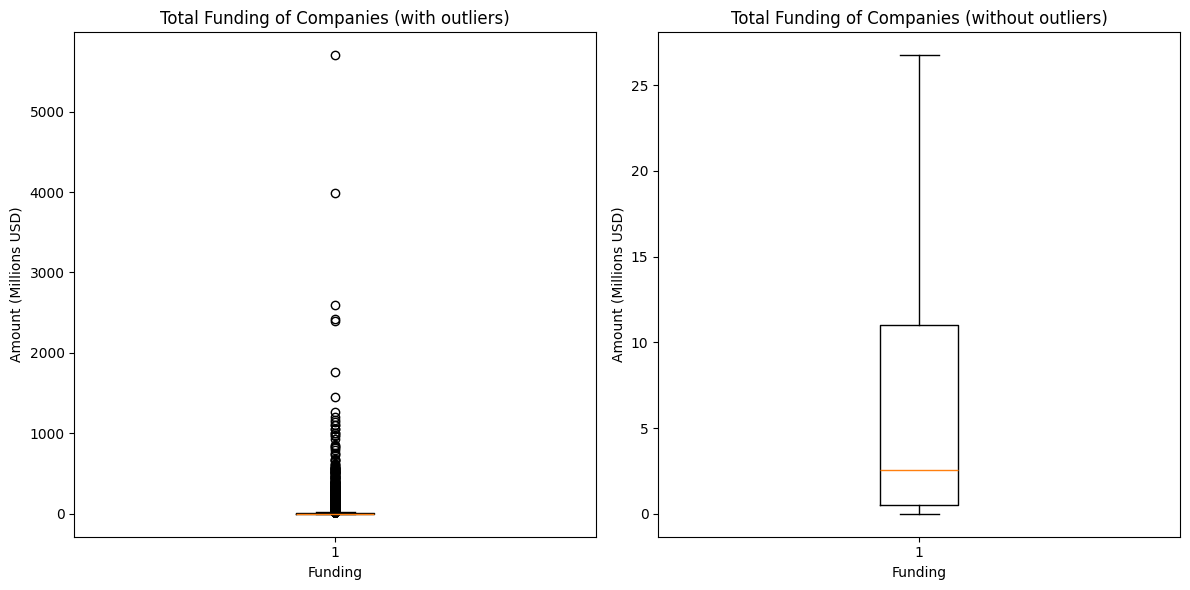

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].boxplot(fundings_graph["funding_total_usd"] / 1000000)
axs[0].set_xlabel("Funding")
axs[0].set_ylabel("Amount (Millions USD)")
axs[0].set_title("Total Funding of Companies (with outliers)")

axs[1].boxplot(fundings_graph["funding_total_usd"] / 1000000, showfliers=False)
axs[1].set_xlabel("Funding")
axs[1].set_ylabel("Amount (Millions USD)")
axs[1].set_title("Total Funding of Companies (without outliers)")

plt.tight_layout()
plt.show()


In [74]:
#fundings_graph.head()

### 1st independent variable (x): ARTS vs SCIENCES - The number of bachelor of arts (BA) and master of sciences (MA) vs the number of bachelor of sciences (BS) and master of sciences (MS)

This boxplot shows the distribution of the number of art degrees (BAs and MAs) per company. For visualization purposes, a version without outliers is provided.

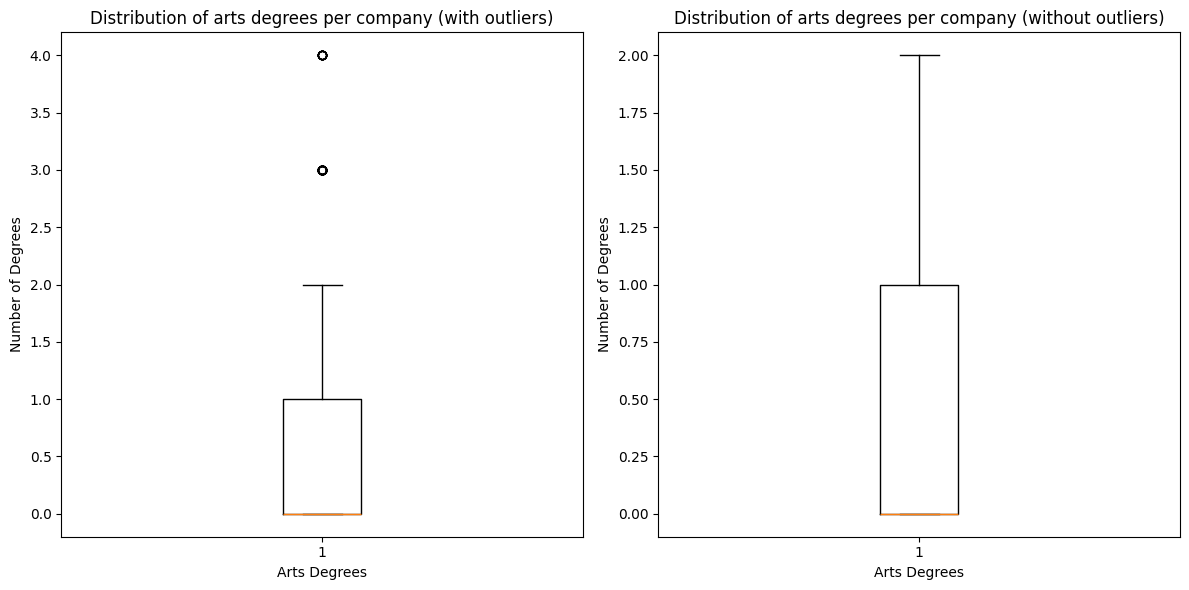

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].boxplot(grouped_df['arts_degree_count'])
axs[0].set_xlabel('Arts Degrees')
axs[0].set_ylabel('Number of Degrees')
axs[0].set_title('Distribution of arts degrees per company (with outliers)')

axs[1].boxplot(grouped_df['arts_degree_count'], showfliers=False)
axs[1].set_xlabel('Arts Degrees')
axs[1].set_ylabel('Number of Degrees')
axs[1].set_title('Distribution of arts degrees per company (without outliers)')

plt.tight_layout()
plt.show()

This boxplot shows the distribution of the number of science degrees (BSs and MSs)

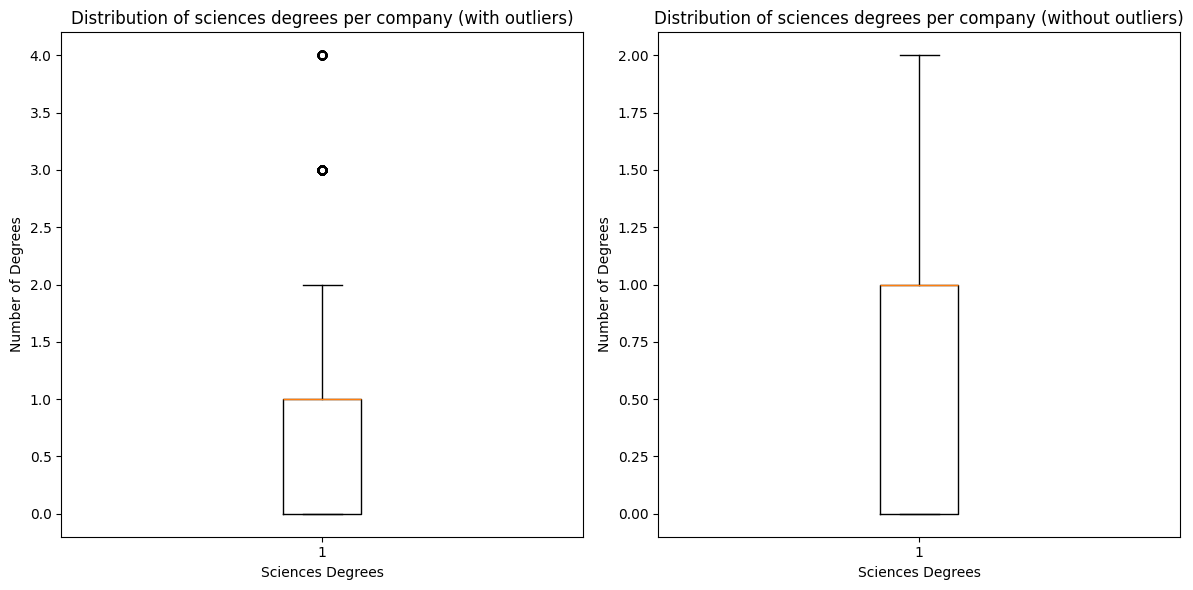

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].boxplot(grouped_df['sciences_degree_count'])
axs[0].set_xlabel('Sciences Degrees')
axs[0].set_ylabel('Number of Degrees')
axs[0].set_title('Distribution of sciences degrees per company (with outliers)')

axs[1].boxplot(grouped_df['sciences_degree_count'], showfliers=False)
axs[1].set_xlabel('Sciences Degrees')
axs[1].set_ylabel('Number of Degrees')
axs[1].set_title('Distribution of sciences degrees per company (without outliers)')

plt.tight_layout()
plt.show()


Given the the errors and incosistencies in the original dataset, the data will be filtered for the number of degrees to be less than 50 for both the arts and sciences factions to address outliers

In [77]:
grouped_df_outliers_filtered = grouped_df.loc[(grouped_df["arts_degree_count"] < 50) & (grouped_df["sciences_degree_count"] < 50) & (grouped_df["funding_total_usd"] / 1000000 < 500)]

The scatter plot below shows the correlation between the number of art degrees (blue) and science degrees (orange) that a company have and the amount of total funding that these companies received. There appears to be no apparent correlation between either types of degrees and the amount of fundings that companies received. In other words, according to this dataset, there is no clear connection between the number of art degrees or the number of science degrees and the companies' total raised fundings, indicating that the differentiation between art degrees and science degrees has no impact on how much fundings companies receive.

In [78]:
#art_sci_df.head()

Binned scatter plot of the number of founders' degrees in Art and Science vs the Average Startup Funding


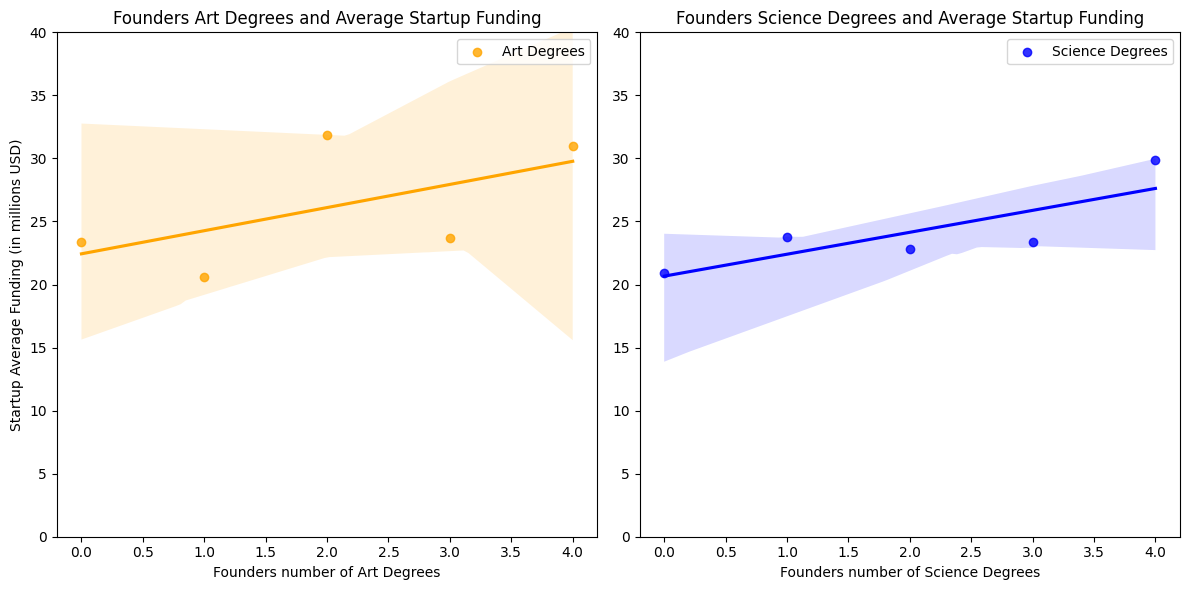

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Funding Art
sns.regplot(x='degree_count', y='funding_art', data=art_sci_df, color='orange', label='Art Degrees', ax=axs[0])
axs[0].set_xlabel('Founders number of Art Degrees')
axs[0].set_ylabel('Startup Average Funding (in millions USD)')
axs[0].set_title('Founders Art Degrees and Average Startup Funding')
axs[0].set_ylim(0, 40) 

# Second subplot: Funding Science
sns.regplot(x='degree_count', y='funding_sci', data=art_sci_df, color='blue', label='Science Degrees', ax=axs[1])
axs[1].set_xlabel('Founders number of Science Degrees')
axs[1].set_ylabel('')
axs[1].set_title('Founders Science Degrees and Average Startup Funding')
axs[1].set_ylim(0, 40) 

axs[0].legend()
axs[1].legend()

plt.tight_layout()


Although there appears to be a linear relationship between both number of art degrees and the number of science degree of founders in relation with the average funding of startups, this relationship is extremely weak due to the scatter of the points and the limited number of points. In the end, it is only safe to assume that the number of art degrees have no special relationship with startup funding whereas having more than one science degrees, on average, is associated with higher startup funding.

### 2st independent variable(x): Level of Education

This histogram depicts the number of recorded founders in the targeted subdataset and their highest education level

The bar chart shows the distribution of highest education level among founders in the targeted subdataset. The most significant proportion of founders' highest education level is Masters level, followed by Bachelors. Only 546 founders reported PhD as their highest education level. 

In [80]:
value_counts = highest_edu_fd['highest_education_lv'].value_counts()
value_counts = pd.DataFrame({'education_lv': value_counts.index, 'count': value_counts.values})
value_counts = value_counts.reindex([0, 1, 2])
value_counts


,education_lv,count
0,Bachelor,2683
1,Master,2474
2,PhD,546


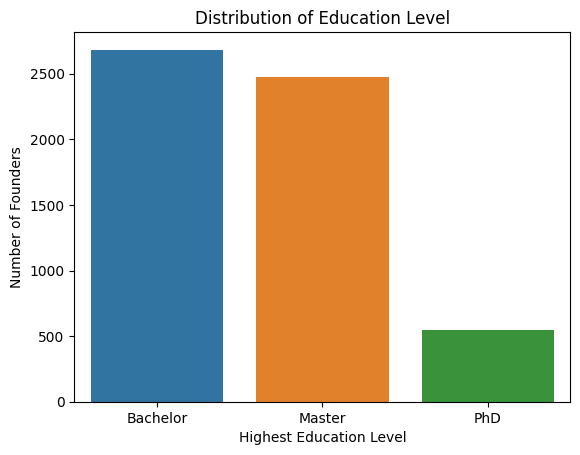

In [81]:
sns.barplot(x='education_lv', y='count', data=value_counts, hue='education_lv')

plt.xlabel('Highest Education Level')
plt.ylabel('Number of Founders')
plt.title('Distribution of Education Level')

plt.show()



In [82]:
average_funding_edu_lv_df = average_funding_edu_lv_df.reindex([0, 1, 2])
average_funding_edu_lv_df['funding_in_millions'] = average_funding_edu_lv_df['funding_total_usd'] / 1000000
#average_funding_edu_lv_df.head()

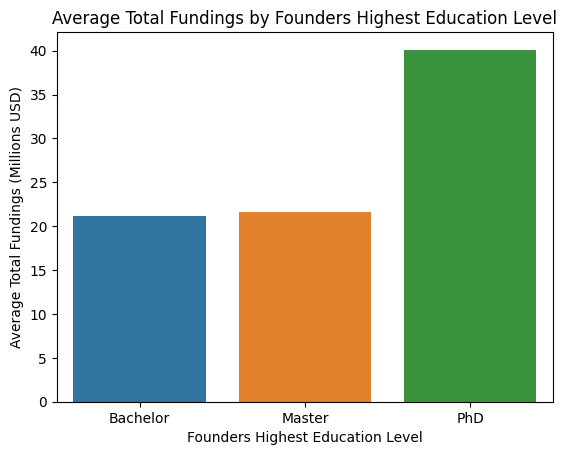

In [83]:
sns.barplot(x='highest_education_lv', y='funding_in_millions', data=average_funding_edu_lv_df, hue='highest_education_lv')

plt.xlabel('Founders Highest Education Level')
plt.ylabel('Average Total Fundings (Millions USD)')
plt.title('Average Total Fundings by Founders Highest Education Level')
plt.show()

This histogram shows the average total fundings a company receives from an employee at each education level. At a glance, the correlation shown in the graph indicates that the higher the level of education of an employee, the higher the average amount of total funding the company has. Nevertheless, it is important to stress that this plot only shows correlation and NOT causation, meaning that the assumption cannot be assumed to be true from this analysis. However, this correlation is interesting and should be analyzed further to determine whether there is a causation relationship. If confirmed, this can lead to implications such as providing recommendations for startups to hire more qualified individuals to increase fundings.

### 3rd independent variable(x): Average number of degrees of founders 

This boxplot displays the distribution between the average number of degrees held by founders of each company. 

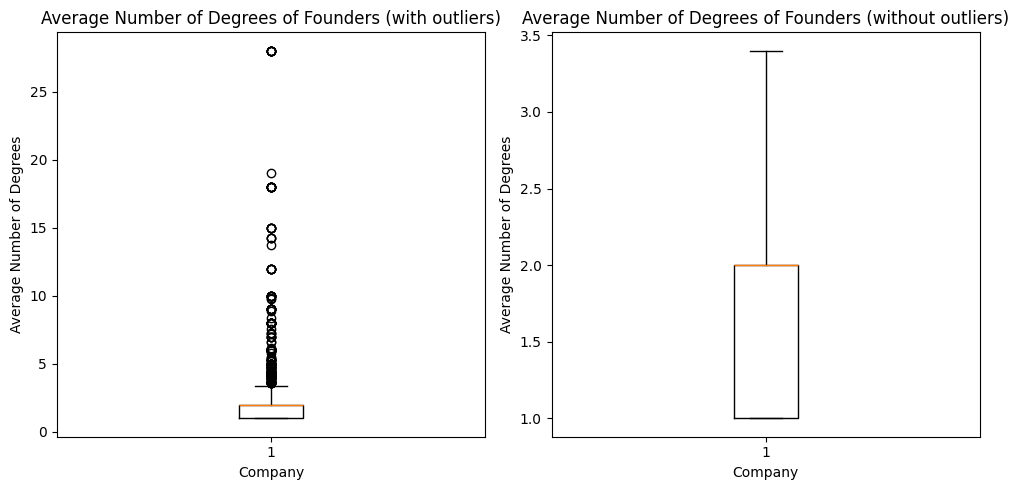

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(company_grouped_df['average_number_of_degrees'])
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Average Number of Degrees')
axs[0].set_title('Average Number of Degrees of Founders (with outliers)')

axs[1].boxplot(company_grouped_df['average_number_of_degrees'], showfliers=False)
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Average Number of Degrees')
axs[1].set_title('Average Number of Degrees of Founders (without outliers)')

plt.tight_layout()
plt.show()


Due to the complexity of the dataset, the data cleaning process cannot eliminate certain errors, leading high amounts of outliers in the average number of degrees among founders. To limit the outliers and present a more accurate analaysis, only companies that have the average number of degrees among founders < 4 will be considered for this analysis.

In [85]:
founder_degree_df_filtered = founder_degree_df.loc[founder_degree_df['avg_no_degrees_fd'] < 4]
#founder_degree_df_filtered.head(10)

In [86]:
avg_deg_fund = founder_degree_df_filtered.groupby('avg_no_degrees_fd')['funding_total_usd'].mean().reset_index()
avg_deg_fund["funding_in_millions"] = avg_deg_fund["funding_total_usd"] / 1000000
#avg_deg_fund.head()


This binscatter plot displays the distribution between the average number of degrees held by founders of each company

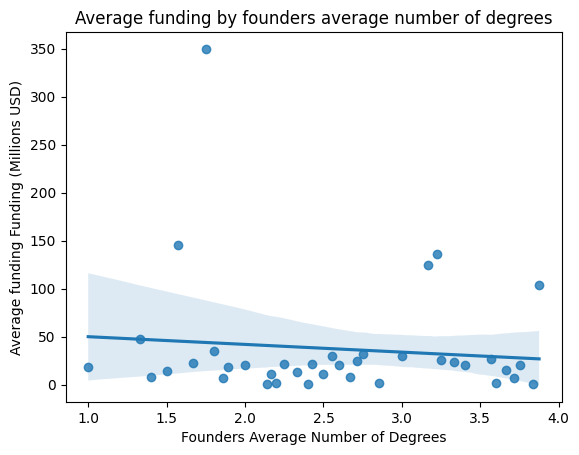

In [87]:
sns.regplot(x='avg_no_degrees_fd', y='funding_in_millions', data=avg_deg_fund)
plt.title('Average funding by founders average number of degrees')
plt.xlabel('Founders Average Number of Degrees')
plt.ylabel('Average funding Funding (Millions USD)')
plt.show()

From the graph, there appears to be no discernible correlation and connection between the number of degrees among Founders of each company and the number of total fundings received by that company. 

### 4th independent variable(x): STEM vs non-STEM founders

In [88]:
#filtered_edu_na_fd.head()

This plot shows the distribution in fundings for startups with STEM vs non-STEM educated founder (for their highest educational qualification)

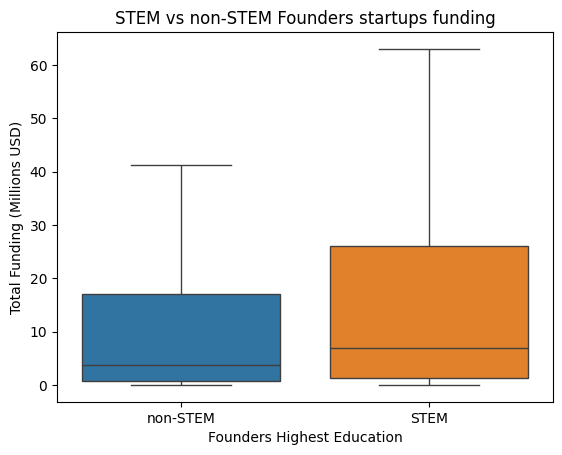

In [89]:
sns.boxplot(x='STEM_designation', y='funding_in_millions', hue='STEM_designation', data=filtered_edu_na_fd, showfliers=False)

plt.title('STEM vs non-STEM Founders startups funding')
plt.xlabel('Founders Highest Education')
plt.ylabel('Total Funding (Millions USD)')

plt.show()


Let's call founders who had their highest academic qualification in a STEM field STEM founders and those in any other areas non-STEM founders. For startups with non-STEM founders, the median amount of funding is around $4 million while this figure is around $6 million for STEM founders. This means that, on average, startups with STEM-founders typically receive slightly higher funding than companies with non-STEM founders in this dataset. 

In addition, 75% of the startups that have STEM founders have received total funding below $26 million while 75% of the startups by non-STEM founders only received total funding below the $17 million mark. This demonstrates that the majority of companies founded by STEM-educated entrepreneurs have a wider range of funding and that some companies founded by STEM-educated can reach higher amounts of funding, compared to their non-STEM counterpart.

It is important to note that this visualization has removed outliers as they are assumed to provide an inaccurate reflection of the entirety of the dataset. It is worth noting that with the outliers, both types of startups (with non-STEM and STEM founders) can reach a maximum funding level of $2.5 billion.

### 5th independent variable(x): Ivy vs non-Ivy founders

Create a funding_in_millions column for visualization purposes and dropping rows that does not have data about the institution attended.

In [90]:
#ivy_comp_df.head()

This plot depicts the distribution of funding for startups with founders that have attended multiple institution compared to those that attended only one institution

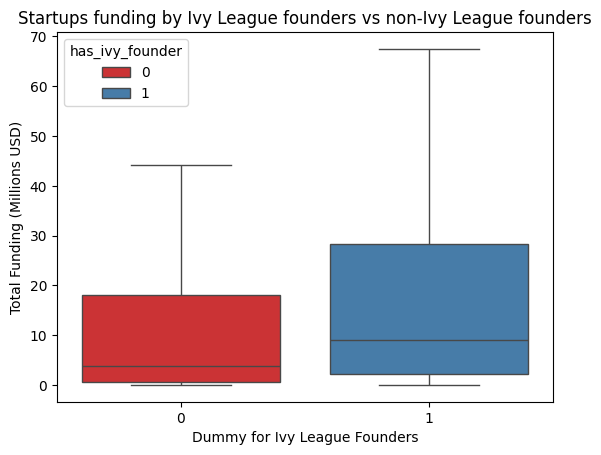

In [91]:
sns.boxplot(x='has_ivy_founder', y='funding_in_millions', hue='has_ivy_founder', data=ivy_comp_df, showfliers=False, palette="Set1")

plt.title('Startups funding by Ivy League founders vs non-Ivy League founders')
plt.xlabel('Dummy for Ivy League Founders')
plt.ylabel('Total Funding (Millions USD)')

plt.show()

The dummy variable 1 indicates startups with founders who attended an Ivy League schools (Ivy-founders) and 0 indicates startups with founders who did not (non-Ivy-founders). From the graph it seems that on average startups with Ivy-founders perform better than those with non-Ivy-founders. 75% of the startups that have Ivy-founders have received total funding below $29 million while 75% of the startups by non-STEM founders only received total funding below the $19 million mark. This demonstrates that the majority of companies founded by Ivy League-educated entrepreneurs have a wider range of funding and that some companies founded by Ivy founders can reach higher amounts of funding, as oppose to those founded by non-Ivy founders.

Some possible reasons for this discrepancy may include the quality of education, connections and resources that are better for startups development at Ivy League schools. Future projects should explore further to discover exactly what values that Ivy League schools offer the founders which led to these startups to receive higher funding. 

# Project 2

## 2.1 The Message

Higher educational qualifications and STEM education for founders is associated with higher total funding for startups. There is a drastic difference between fundings for startups that have STEM PhD-educated  founders as opposed to STEM Masters-educated founders, while the funding discrepancy for STEM Master-educated founders and STEM Bachelor-educated founders is less significant.

Get the columns of interest in one dataframe for visualization

In [92]:
main_message_df = filtered_edu_na_fd[['person_object_id', 'highest_education_lv', 'funding_in_millions', 'STEM_designation']]
#main_message_df.head()

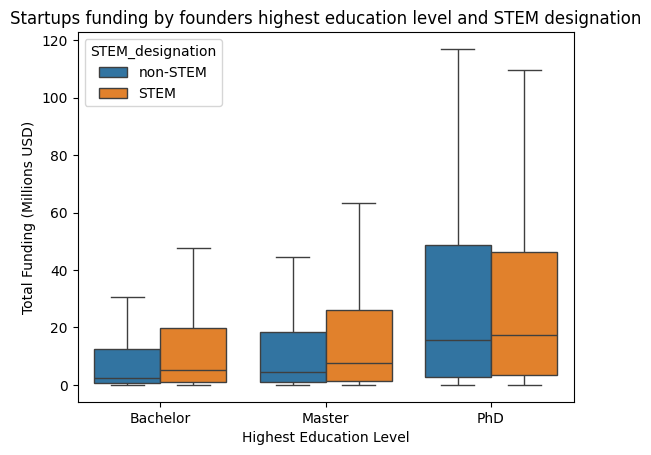

In [93]:
sns.boxplot(x='highest_education_lv', y='funding_in_millions', hue='STEM_designation', data=main_message_df, showfliers=False, order=['Bachelor', 'Master', 'PhD'])

plt.title('Startups funding by founders highest education level and STEM designation')
plt.xlabel('Highest Education Level')
plt.ylabel('Total Funding (Millions USD)')

plt.show()


In accordance with the dataset, for the majority of the startups (the median), companies with Master-educated founders average around $5 millions in fundings, slightly higher than those founded by Bachelor degrees holders. In comparison, the most significant proportion of startups with PhD-level founders received around 18 millions in funding. This implies that, for the majority of the startups in this dataset, higher educational level of founders is associated with higher funding for the startups, suggesting that the educational level of founders has the potential to be one of the deciding factors for investors when it comes to providing funding for the company.

In addition, the spread of total funding for startups with PhD-educated founders is also more considerable than their 2 counterparts. 75% of the observations for startups with Bachelor-educated founders, Master-educated founders and PhD-educated founders can reach up to approximately $19, $21 and $47 million respectively. This finding indicates that, for a significant numbers of companies, the amount of funding that startups with PhD-educated founders can receive is  more than double of what the startups with less academically qualified founders can receive. 

It is noticeable that the third quartile of the fundings for startups with founders who studied STEM subjects is markedly higher than non-STEM subjects for the Bachelor and Master level. In contrast, for the PhD level the opposite is true, as the third quartile for non-STEM subjects is marginally higher than STEM subjects, this difference for the PhD level is a topic that should be investigated further. In this light, startups with STEM-educated founders have the potential to reach higher level of funding than those with non-STEM-educated founders for the Bachelor and Master level, implying that, to a certain degree, investors may possibly prefer STEM-educated founders when it comes to funding decisions.

It is important to note that this visualization does not account for outliers, as it is assumed that the emphasis should be placed on the bulk of the data instead of the exceptions. Accounting for the outliers, it is interesting to see that the companies that achieved the highest fundings, reaching around $2.5 billion, had Bachelor-educated founders. Nevertheless, considering the small size of these outliers compared to the total volume of the dataset, it is assumed that these abnormal observations are not representative of the nature of the dataset.

These trends can potentially be explained by the Human Capital Theory, which states that education contributes significantly to an individual's domain knowledge, productivity and innovative capability. In this light, investors may assess that founders who have a higher level of education have higher human capital and thus more capable of effectively leading successful startups. Similarly, STEM-educated founders can also be perceived to have higher human capital since their domain knowledge achieved from education can be more directly translated to real world application. Other research (Ratzinger et al., 2018), provides more support for this assumption. Following this logic, the study of education's impact on human capital is a topic that warrants further investigation in the entrepreneurial world.

## 2.2 Maps and Interpretations

### Average amount of funding that startups received by states (Y-variable)

Renaming the offices dataframe to prepare for merging

In [94]:
offices.rename(columns={'object_id': "company_id"}, inplace=True)
#offices.head(5)

In [95]:
import geopandas as gpd
from shapely.geometry import Point

Filter the offices and objects dataframe for areas of interest (focusing on the USA and comapnies that received funding). Merge the two dataframes

In [96]:
filtered_offices = offices[(offices['country_code'] == 'USA')]

comp_fund_df = objects_df.loc[objects_df['funding_total_usd'] > 0]

merged_df = comp_fund_df.merge(filtered_offices, on="company_id", how="inner")
#merged_df.head()

Get columns of interest

In [97]:
merged_df1 = merged_df[['company_id', 'funding_total_usd', 'city', 'zip_code', 'state_code', 'country_code', 'latitude', 'longitude']]
#merged_df1.head()

Create Coordinates column for GeoDataFrame

In [ ]:
merged_df1["Coordinates"] = list(zip(merged_df1.longitude, merged_df1.latitude))
merged_df1["Coordinates"] = merged_df1["Coordinates"].apply(Point)
#merged_df1.head()

Create a GeoDataFrame from a DataFrame

In [99]:
gdf_comp = gpd.GeoDataFrame(merged_df1, geometry="Coordinates")
#gdf_comp.head()

Average funding for startups in each state

In [100]:
avg_funding_state_df = gdf_comp.groupby("state_code")["funding_total_usd"].mean().reset_index().sort_values("funding_total_usd", ascending=False)
#avg_funding_state_df.head()

Grab low resolution world file for mapping

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.columns

State shapefiles in USA

In [102]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
#state_df.head()

Merge the state shapefile with the average funding per state and create a funding_total_million_usd column for visualization purposes

In [103]:
avg_fund_w_state = state_df.merge(avg_funding_state_df, left_on="STUSPS", right_on="state_code", how="inner")
avg_fund_w_state['funding_total_million_usd'] = avg_fund_w_state['funding_total_usd'] / 1000000
#avg_fund_w_state.head(4)

Map of average startup funding by states in the USA

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\658637837.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):


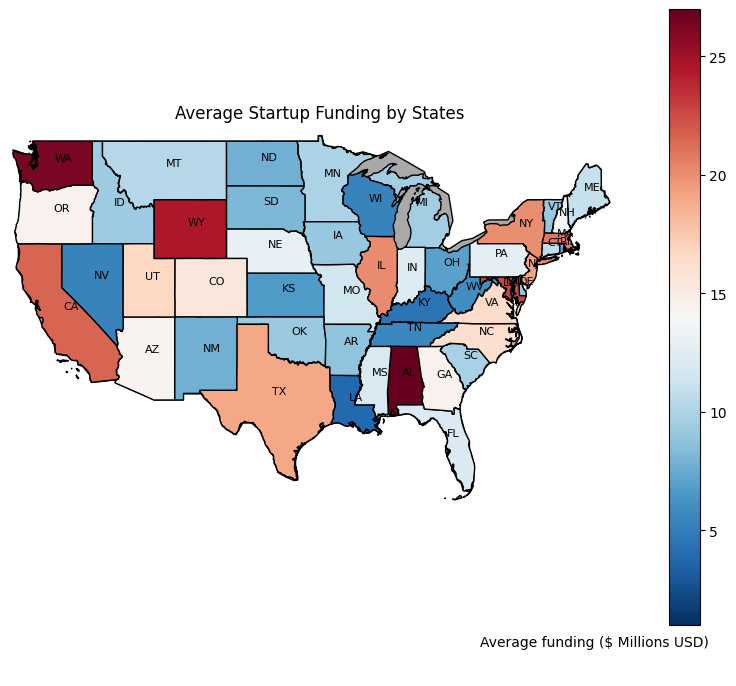

In [104]:
fig, gax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('white')

world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black', color='darkgrey')
avg_fund_w_state.plot(
    ax=gax, edgecolor='black', column='funding_total_million_usd', legend=True, cmap='RdBu_r', vmax=27, vmin=1)

for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):
    gax.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax.set_title('Average Startup Funding by States')
gax.annotate('Average funding ($ Millions USD)', xy=(0.48, 0.05), xycoords='figure fraction')

gax.set_xlim([-125, -65])
gax.set_ylim([24, 50])

plt.axis('off')
plt.show()

It is evident from this map that the state with the noticeably highest amount of fundings is Alabama, followed by Washington and Wyoming, these three states appear to have no geographical relation with each other. On a larger scale, the Midwest region of the US is the region with the lowest average fundings for startups, averaging less than $10 millions per startup throughout the states with the sole exception of Illinois. On the other hand, the North, South and West regions of America have varying amounts of startups funding for each state.

Assumptions can be made to explain why these states have higher funding than each other. On the educational side, some aspects that might influence startup funding are the states educational quality. Certain high-funding states such as California and North Eastern regions have high-performing institutions such as Ivy League schools. These states may also have a higher percentage of founders who studied STEM fields, which, as aforementioned, tend to produce higher funded startups.

There are also external factors which may positively influence the average funding of these states, such as the states' GDP, R&D expenditure and workforce quality. It is also important to notes that certain states in this illustration either overestimate or underestimate the average startup funding due to having too few startups recorded in the dataset.

### Map of the average education level by state

This map depicts the average education level of founders for each state, calculated by an "education index". This education index hierarchically ranks the education level of founders, assuming values of 1 for a Bachelor degree, 2 for a Masters degree and 3 for a PhD degree. The assumption is that this map will appear similar to the Average Startup Funding by State map to provide more support to the message that startups by founders that have hgiher academic qualifications have the potential to receive higher funding. 

Get columns of interest

In [105]:
filtered_edu_na_fd_2 = filtered_edu_na_fd[["company_id", "person_object_id", "education_lv_int"]].drop_duplicates()
#filtered_edu_na_fd_2.head()

Merge the dataframe with the dataframe of the office locations

In [106]:
loc_edu_fd_df_2 = filtered_edu_na_fd_2.merge(merged_df1, on="company_id", how="inner")
#loc_edu_fd_df_2.head()

Calculate the average education index for each state

In [107]:
edu_int_fd_df_2 = loc_edu_fd_df_2.groupby("state_code")["education_lv_int"].mean().reset_index().sort_values("education_lv_int", ascending=False)
edu_int_fd_df_2.rename(columns={'education_lv_int': 'average_education_index'}, inplace=True)
#edu_int_fd_df_2.head()

Merge the state shapefile with the average education index per state

In [108]:
edu_int_w_state = state_df.merge(edu_int_fd_df_2, left_on="STUSPS", right_on="state_code", how="inner")

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\4290859021.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):


C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\4290859021.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(edu_int_w_state.geometry.centroid.x, edu_int_w_state.geometry.centroid.y, edu_int_w_state['state_code']):


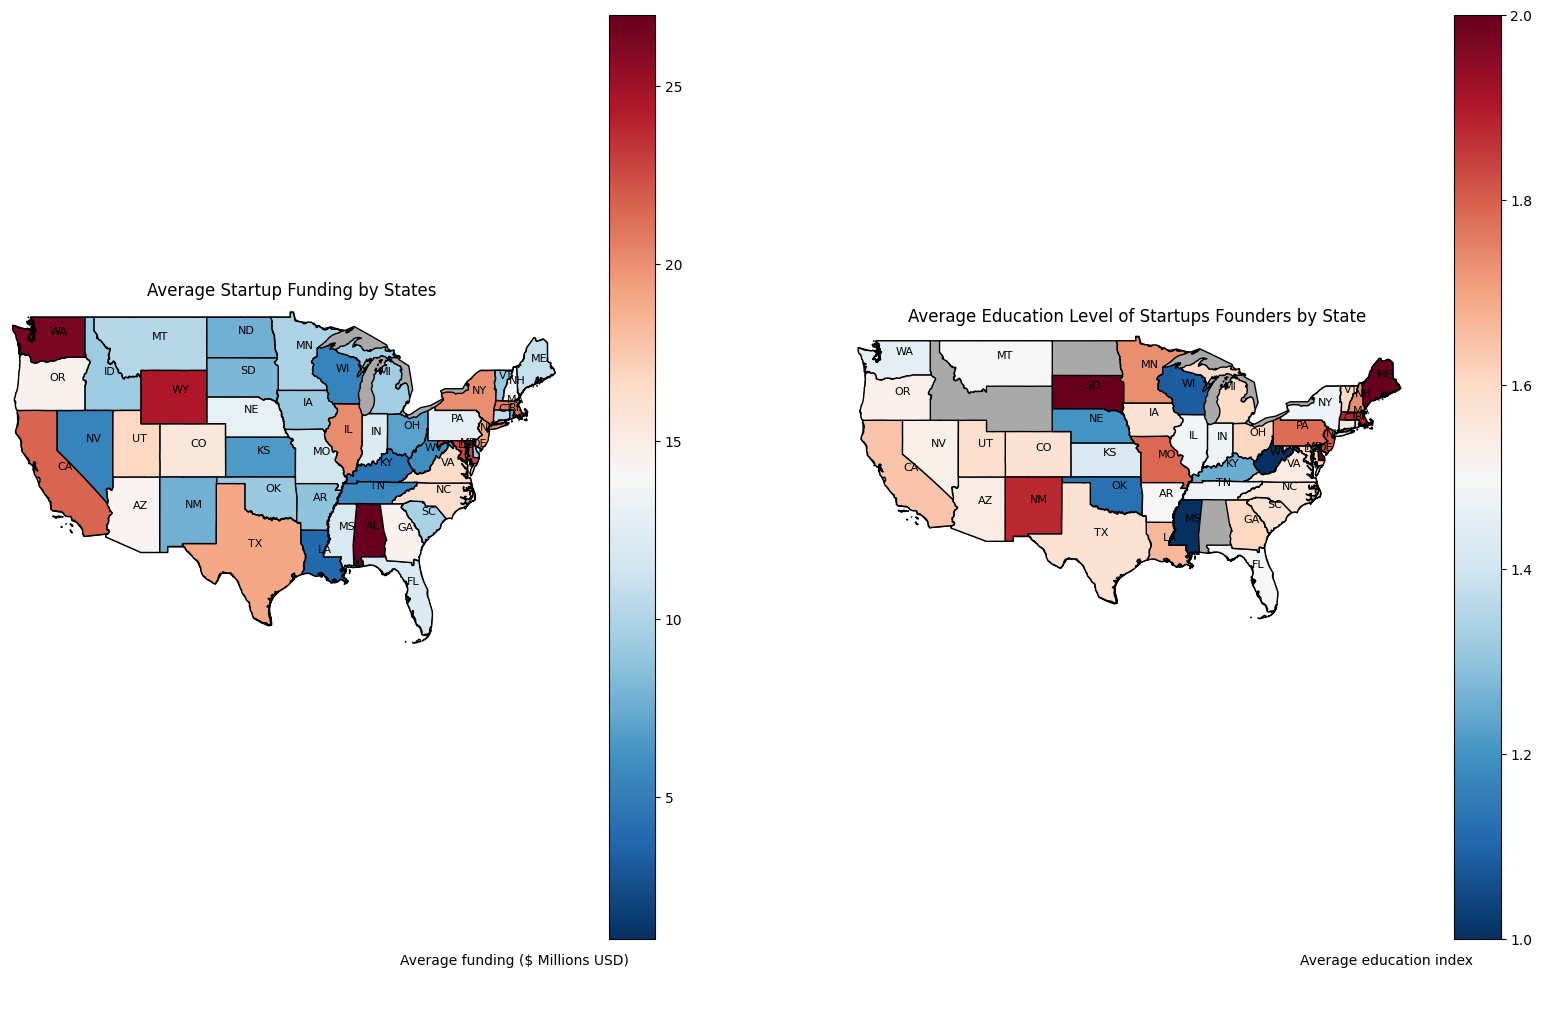

In [220]:
fig, (gax1, gax2) = plt.subplots(1, 2, figsize=(20, 12))
fig.patch.set_facecolor('white')

world.query("name == 'United States of America'").plot(ax=gax1, edgecolor='black', color='darkgrey')
avg_fund_w_state.plot(
    ax=gax1, edgecolor='black', column='funding_total_million_usd', legend=True, cmap='RdBu_r', vmax=27, vmin=1)

for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):
    gax1.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax1.set_title('Average Startup Funding by States')
gax1.annotate('Average funding ($ Millions USD)', xy=(0.2, 0.05), xycoords='figure fraction')

gax1.set_xlim([-125, -65])
gax1.set_ylim([24, 50])

# Plot second map

world.query("name == 'United States of America'").plot(ax=gax2, edgecolor='black', color='darkgrey')
edu_int_w_state.plot(
    ax=gax2, edgecolor='black', column='average_education_index', legend=True, cmap='RdBu_r', vmax=2.0, vmin=1)

for x, y, label in zip(edu_int_w_state.geometry.centroid.x, edu_int_w_state.geometry.centroid.y, edu_int_w_state['state_code']):
    gax2.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax2.set_title('Average Education Level of Startups Founders by State')
gax2.annotate('Average education index', xy=(0.65, 0.05), xycoords='figure fraction')

gax2.set_xlim([-125, -65])
gax2.set_ylim([24, 50])

gax1.axis('off')
gax2.axis('off')
plt.show()


Due to filtering and the lack of data about founders for certain states in the original dataset, information for certain states such as North Dakota, Wyoming, Idaho,.... are missing. In addition, some states, such as SD, NM and ME have very few startups reported in the dataset (<5) and thus the average education index may not be reflective of the true average education level of founders for the state. 

Overall, very few states in the US have an average education index of under 1.3, meaning that for the majority of states, there is a significant proportion of startup founders who have a Master degree or higher. The West and Northeast are the two regions with consistently above average education index (1.5) across all states while the Southeast and Midwest regions have some major states below this benchmark (a majority of founders from these regions’ highest education level is a Bachelor degree). 

In comparison with the Average Startup Funding by State map, this map is considerably different, meaning that states that have a higher average educational level among founders do not consistently have higher average funding. However, the average education index for some states are skewed by a low sample size in startups (<5) reported and for many states that have a higher startup sample size (>45), such as California (CA), Texas (TX) and Florida (FL), the correlation between average educational level and average startup funding per state can be supported. 

### Map of STEM vs non-STEM founders' distribution for each state

This map depicts the percentage of founders that pursued a STEM field for their highest education level (STEM founders) for each state. The assumption is that this map will appear similar to the Average Startup Funding by State map to provide more support to the message that startups by STEM founders perform better in fund raising then those of non-STEM founders. 

In [110]:
#filtered_edu_na_fd.head()

In [111]:
#filtered_offices.head()

Merge the filtered_edu_na_fd dataframe with the offices dataframe

In [112]:
loc_edu_fd_df = filtered_offices.merge(filtered_edu_na_fd, on="company_id", how="inner")
#loc_edu_fd_df.head()


Get the column of interest and removing rows with missing state_code values

In [ ]:
loc_edu_fd_df_stem = loc_edu_fd_df[['company_id', 'state_code', 'highest_education_lv', 'education_lv_int', 'STEM_dummy']]
loc_edu_fd_df_stem.dropna(subset="state_code",inplace=True)
#loc_edu_fd_df_stem.head()

Get the rows with the highest level of education of a founder of a company

In [114]:
filtered_loc_edu_fd_df_stem = loc_edu_fd_df_stem.groupby(['company_id', 'state_code']).apply(lambda x: x[x['education_lv_int'] == x['education_lv_int'].max()]).reset_index(drop=True)
#filtered_loc_edu_fd_df_stem.head()


Get the percentage of STEM founders in each state

In [115]:
state_avg_stem_df = filtered_loc_edu_fd_df_stem.groupby('state_code')['STEM_dummy'].mean().reset_index()
state_avg_stem_df.rename(columns={'STEM_dummy': 'STEM_percentage'}, inplace=True)
#state_avg_stem_df.head()

Merge the state shapefile with the average funding per state

In [116]:
main_state_avg_stem_df = state_df.merge(state_avg_stem_df, left_on="STUSPS", right_on="state_code", how="inner")
main_state_avg_stem_df["STEM_percentage"] = main_state_avg_stem_df["STEM_percentage"] * 100
#main_state_avg_stem_df.head()


Map of Percentage of STEM founders by state

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\297283179.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):
C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\297283179.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(main_state_avg_stem_df.geometry.centroid.x, main_state_avg_stem_df.geometry.centroid.y, main_state_avg_stem_df['state_code']):


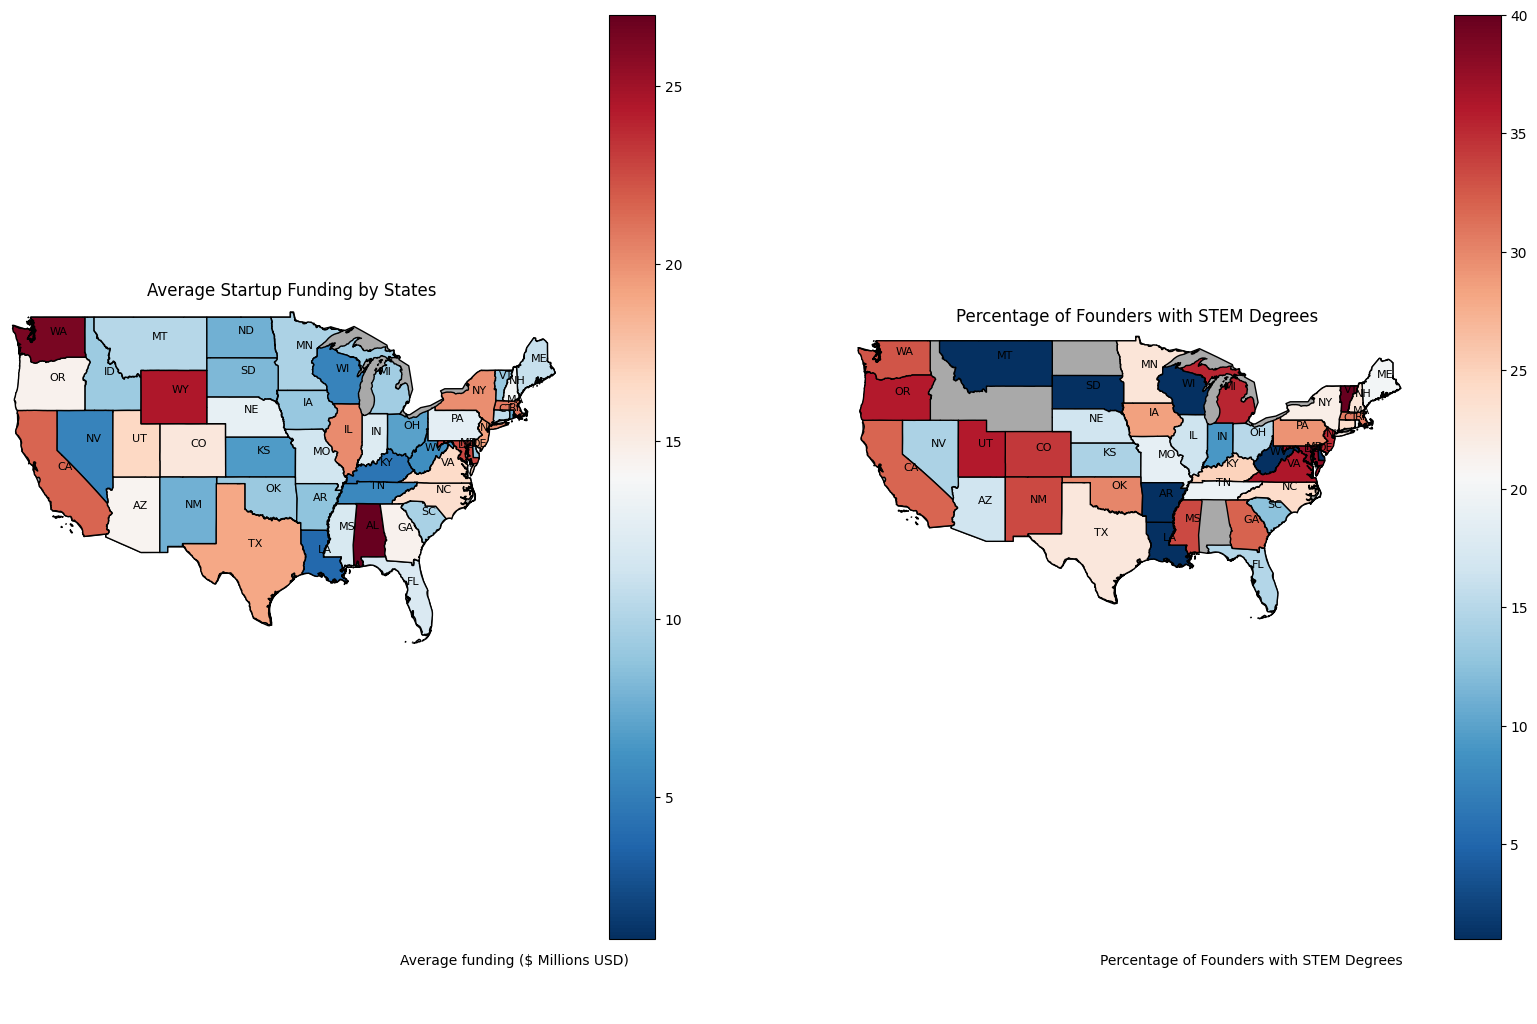

In [221]:
fig, (gax1, gax2) = plt.subplots(1, 2, figsize=(20, 12))
fig.patch.set_facecolor('white')

world.query("name == 'United States of America'").plot(ax=gax1, edgecolor='black', color='darkgrey')
avg_fund_w_state.plot(
    ax=gax1, edgecolor='black', column='funding_total_million_usd', legend=True, cmap='RdBu_r', vmax=27, vmin=1)

for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):
    gax1.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax1.set_title('Average Startup Funding by States')
gax1.annotate('Average funding ($ Millions USD)', xy=(0.2, 0.05), xycoords='figure fraction')

gax1.set_xlim([-125, -65])
gax1.set_ylim([24, 50])

# Plot second map

world.query("name == 'United States of America'").plot(ax=gax2, edgecolor='black', color='darkgrey')
main_state_avg_stem_df.plot(
    ax=gax2, edgecolor='black', column='STEM_percentage', legend=True, cmap='RdBu_r', vmax=40, vmin=1)

for x, y, label in zip(main_state_avg_stem_df.geometry.centroid.x, main_state_avg_stem_df.geometry.centroid.y, main_state_avg_stem_df['state_code']):
    gax2.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax2.set_title('Percentage of Founders with STEM Degrees', color='black')
gax2.annotate('Percentage of Founders with STEM Degrees', xy=(0.55, 0.05), xycoords='figure fraction', color='black')

gax2.set_xlim([-125, -65])
gax2.set_ylim([24, 50])

gax1.axis('off')
gax2.axis('off')
plt.show()

Due to filtering and the lack of data about founders for certain states in the original dataset, information for certain states such as North Dakota, Wyoming, Idaho,.... are missing.

At least one fifth of the startups across all states in the Northern region of the US have founders who pursued a STEM subject as their highest level of education. More than 25% of startups founders in 6 major states (WA, OR, CA, UT, CO, NM) of the Western region studied a STEM Subject as their highest education level. Across the US, the majority of US states have at least 15% of startups that have STEM-background founders. Overall however, most of the startups in the US from this dataset had their highest level of education in a non-STEM subject. 

In comparison with the Average Startup Funding by State map, this map is relatively different, despite many similarities. In other words, although many states that have a higher STEM founders percentage have a higher average startup funding, this is not the case for all states. However it is worth noting that the states that do have an above medium average startup funding (>$15 million) most often have a higher STEM founders percentage (>25%). 

### Map of percentage of Ivy League founders per state

This map showcases the proportion of founders who studied at an Ivy League institutions for each state based on the office locations. The assumption is that this map will appear similar to the Average Startup Funding by State map to provide more support to the message that startups by  founders who attended an Ivy League school perform better in fund raising then those of non-iVy founders. 

In [118]:
#ivy_comp_df.head()

Merge the dataframe containing information about companies and founders educational background with the office location dataframe

In [119]:
ivy_loc_comp = ivy_comp_df.merge(filtered_offices, on="company_id", how="inner")
#ivy_loc_comp.head()

In [120]:
comp_has_ivy_df = ivy_loc_comp[['company_id', 'state_code', 'has_ivy_founder']].drop_duplicates()
percent_ivy = comp_has_ivy_df.groupby('state_code')['has_ivy_founder'].mean().reset_index()
percent_ivy.rename(columns={'has_ivy_founder': 'percentage_ivy_founders'}, inplace=True)
percent_ivy['percentage_ivy_founders'] = percent_ivy['percentage_ivy_founders'] * 100
#percent_ivy.head()

Merge the state shapefile with the average percentage of ivy founders in that state

In [121]:
main_percent_ivy_df = state_df.merge(percent_ivy, left_on="STUSPS", right_on="state_code", how="inner")
#main_percent_ivy_df.head()

Map of Percentage of Ivy founders by state

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\3395906921.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):


C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\3395906921.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(main_percent_ivy_df.geometry.centroid.x, main_percent_ivy_df.geometry.centroid.y, main_percent_ivy_df['state_code']):


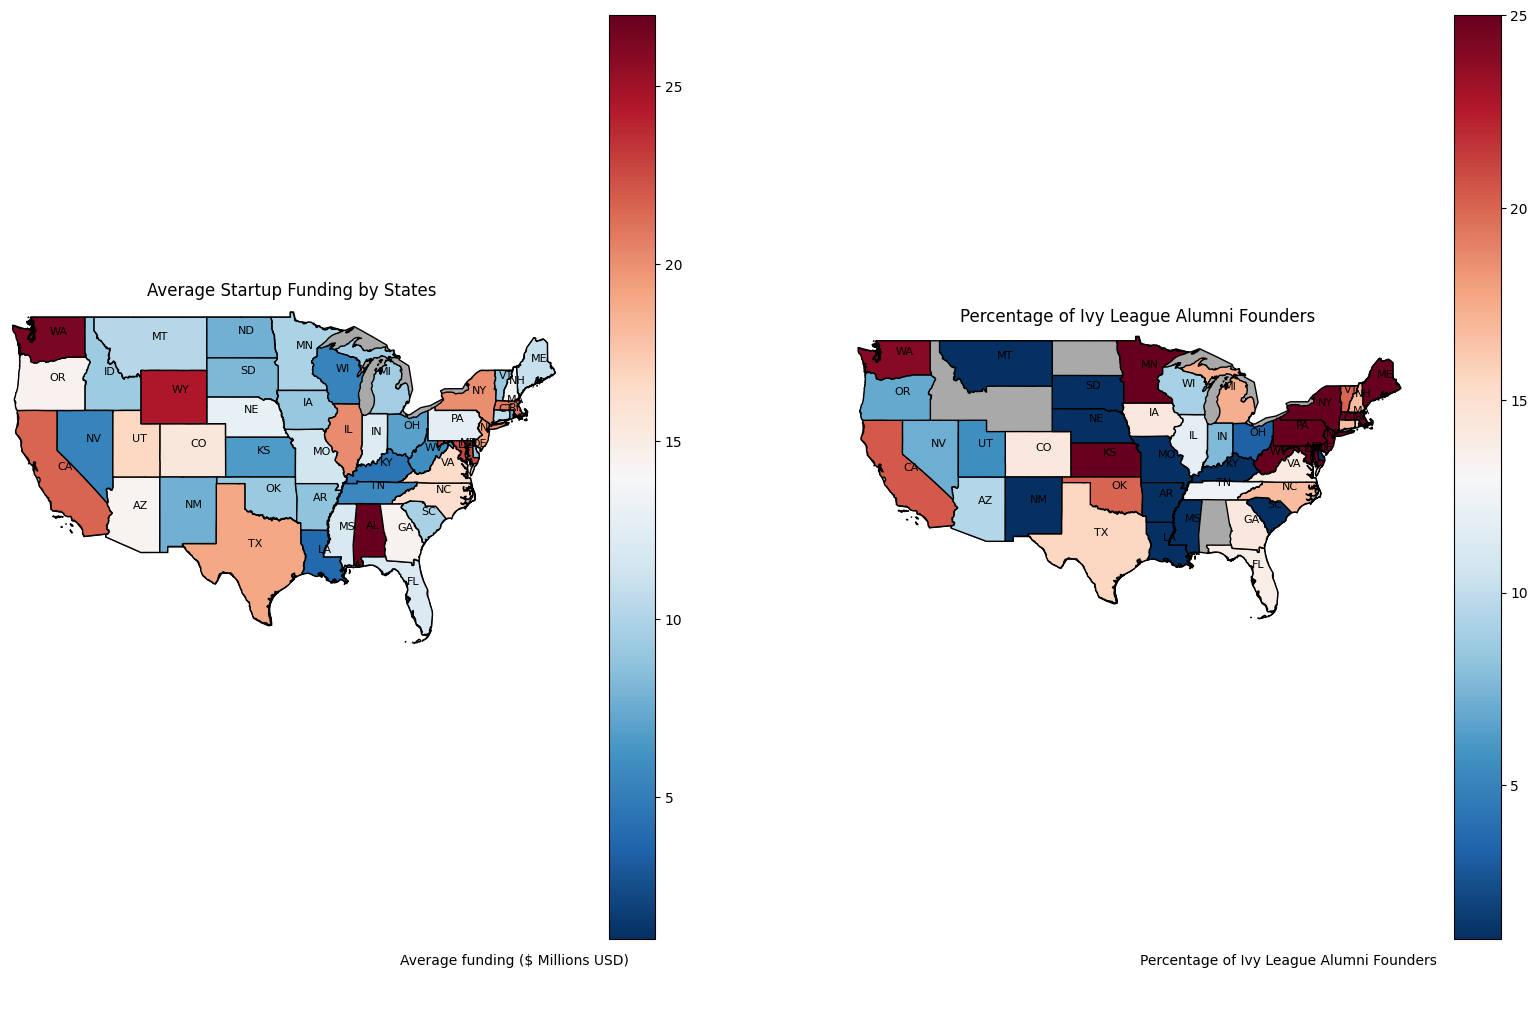

In [222]:
fig, (gax1, gax2) = plt.subplots(1, 2, figsize=(20, 12))
fig.patch.set_facecolor('white')

world.query("name == 'United States of America'").plot(ax=gax1, edgecolor='black', color='darkgrey')
avg_fund_w_state.plot(
    ax=gax1, edgecolor='black', column='funding_total_million_usd', legend=True, cmap='RdBu_r', vmax=27, vmin=1)

for x, y, label in zip(avg_fund_w_state.geometry.centroid.x, avg_fund_w_state.geometry.centroid.y, avg_fund_w_state['state_code']):
    gax1.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax1.set_title('Average Startup Funding by States')
gax1.annotate('Average funding ($ Millions USD)', xy=(0.2, 0.05), xycoords='figure fraction')

gax1.set_xlim([-125, -65])
gax1.set_ylim([24, 50])

# Plot second map

world.query("name == 'United States of America'").plot(ax=gax2, edgecolor='black', color='darkgrey')
main_percent_ivy_df.plot(
    ax=gax2, edgecolor='black', column='percentage_ivy_founders', legend=True, cmap='RdBu_r', vmax=25, vmin=1)

for x, y, label in zip(main_percent_ivy_df.geometry.centroid.x, main_percent_ivy_df.geometry.centroid.y, main_percent_ivy_df['state_code']):
    gax2.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax2.set_title('Percentage of Ivy League Alumni Founders', color='black')
gax2.annotate('Percentage of Ivy League Alumni Founders', xy=(0.57, 0.05), xycoords='figure fraction', color='black')

gax2.set_xlim([-125, -65])
gax2.set_ylim([24, 50])

gax1.axis('off')
gax2.axis('off')
plt.show()

The North East region of the US, being home to the Ivy League schools, is unsurprisingly the region with the highest Ivy startup founders percentage. It is worth noting that this map indicates that many startups from Ivy League alumni are based near the location of the institutions (as evident from the high Ivy-founders percentage of the North East region and California (where Yale is located)

In comparison with the Average Startup Funding per state map, although many states' average funding show correlation with the proportion of Ivy Alumni founders, there are also major inconsistencies with certain states, such as KS, OK and NM, which have high percentage of Ivy alumni founders yet low average startup fundings. Therefore, from a geographical standpoint, the evidence supporting a correlation between the founders graduating from an Ivy League school and better funding performance is relatively weak. 

### Map of institutions and offices locations based on the average level of funding received by alumni's startups

This map will reveal insights into regions and states that are most densely populated with schools that produce startup founders. In addition, it will also illustrate areas with institutions that have different average amounts of fundings for each of their startups. Based on this, further research can explore the unique characteristics of regions, and more specifically institutions, that provide the necessary education for founders to achieve high funding for their startups. 

### Merging with a New Dataset (1)

Since the longitude and latitude information of schools that founders attended were not provided in the original dataset, a new dataset is merged in to allow access to information about the locations of postsecondary institutions across the US. This new dataset (school_long_lat) is retrieved from the Integrated Postsecondary Education Data System from the US National Center for Education Statistics. The addition of this dataset will provide insights about the regions that have the educational ecosystem most beneficial for producing startups and raising startups funding.

Importing dataset with school's state location and changing column names to prepare for merging

In [123]:
schools_long_lat = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\A1 project-one-code-NathanKhuat3\hd2022.csv", encoding="latin-1")
schools_long_lat = schools_long_lat[['INSTNM', 'STABBR', 'LONGITUD', 'LATITUDE']]
schools_long_lat.rename(columns={'INSTNM': 'institution', 'STABBR': 'state_code', 'LONGITUD': 'longitude', 'LATITUDE': 'latitude'}, inplace=True)
#schools_long_lat.head()

In [124]:
main_lv_education.dropna(subset=['institution'], inplace=True)
#main_lv_education.head()

Upon inspection of the schools_long_lat's csv file, it appears that the institution name for each campus of an institution is denoted by "-" (i.e. George C Wallace Community College-Dothan)

In [125]:
#schools_long_lat.loc[schools_long_lat['institution'].str.contains('-')].head()

However, in our dataset the the campus is seperated from the institution's name by a "," 

In [126]:
#main_lv_education.loc[main_lv_education['institution'].str.contains(',')].head()

Format our dataset to prepare for merging with schools_long_lat data

In [127]:
main_lv_education['institution'] = main_lv_education['institution'].str.replace(', ', '-')
#main_lv_education.loc[main_lv_education['institution'].str.contains('-')].head()

Merge the dataframe containing highest education level of founders info with school locations dataframe

In [128]:
school_w_state = main_lv_education.merge(schools_long_lat, on='institution', how='left')
#school_w_state.head()

It is possible for some of the founders from the original data set has been left out due to data cleaning issues or the school_long_lat missing the longitude and latitude of certain schools

In [129]:
school_w_state.dropna(subset=['longitude', 'latitude'],inplace=True)

Get columns of interest and format dataframe for use

In [130]:
school_w_state_df = school_w_state[['person_object_id', 'company_id', 'institution', 'funding_total_usd', 'state_code', 'highest_education_lv', 'education_lv_int', 'longitude', 'latitude']]
school_w_state_df['funding_in_millions'] = school_w_state_df['funding_total_usd'] / 1000000
#school_w_state_df.head()

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\559818098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_w_state_df['funding_in_millions'] = school_w_state_df['funding_total_usd'] / 1000000


In [131]:
grouped_school_w_state_df = school_w_state_df.groupby(["institution", "state_code", "longitude", "latitude"])['funding_in_millions'].mean().reset_index().sort_values("funding_in_millions", ascending=False)
#grouped_school_w_state_df.head()

Summary Statistics of fundings

In [132]:
main_summary_stat.describe()

,attended_ivy_league,funding_in_millions,studied_STEM_field,founders_avg_no_of_degrees,highest_education_index,founders_no_of_art_degrees,founders_no_of_sciences_degrees
count,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000,5311.000000
mean,0.181698,24.230305,0.309358,2.211134,1.595933,0.567501,1.224816
std,0.385632,83.957226,0.462272,1.926570,0.638217,0.759813,1.008399
min,0.000000,0.001003,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.961000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,4.600000,0.000000,2.000000,2.000000,0.000000,1.000000
75%,0.000000,19.714177,1.000000,2.500000,2.000000,1.000000,2.000000
max,1.000000,2425.700000,1.000000,28.000000,3.000000,4.000000,4.000000


Based on the summary statistics, 50% and 75% of the startup observations have below $5 and $20 million respectively. This information can be used to categorize startups into low, medium and high funding.

In [133]:
conditions = [
    grouped_school_w_state_df['funding_in_millions'] < 5,
    (grouped_school_w_state_df['funding_in_millions'] >= 5) & (grouped_school_w_state_df['funding_in_millions'] < 20)
]

choices = ['Low Funding', 'Medium Funding']

grouped_school_w_state_df['funding_lv'] = np.select(conditions, choices, default='High Funding')
#grouped_school_w_state_df.head()

In [134]:
grouped_school_w_state_df["Coordinates"] = list(zip(grouped_school_w_state_df.longitude, grouped_school_w_state_df.latitude))
grouped_school_w_state_df["Coordinates"] = grouped_school_w_state_df["Coordinates"].apply(Point)

grouped_school_w_state_gdf = gpd.GeoDataFrame(grouped_school_w_state_df, geometry="Coordinates")
#grouped_school_w_state_gdf.head()

Get geodataframe for companies location (that has known latitude and longitude) and their funding

In [135]:
gdf_comp_filtered = gdf_comp[(gdf_comp['latitude'] != 0) & (gdf_comp['longitude'] != 0)]
#gdf_comp_filtered.head()

Categorize types of startups according to funding

In [ ]:
gdf_comp_filtered['funding_in_millions'] = gdf_comp_filtered['funding_total_usd'] / 1000000
conditions = [
    gdf_comp_filtered['funding_in_millions'] < 5,
    (gdf_comp_filtered['funding_in_millions'] >= 5) & (gdf_comp_filtered['funding_in_millions'] < 20)
]
fund_type = ['Low Funding', 'Medium Funding']
gdf_comp_filtered['funding_lv'] = np.select(conditions, fund_type, default='High Funding')

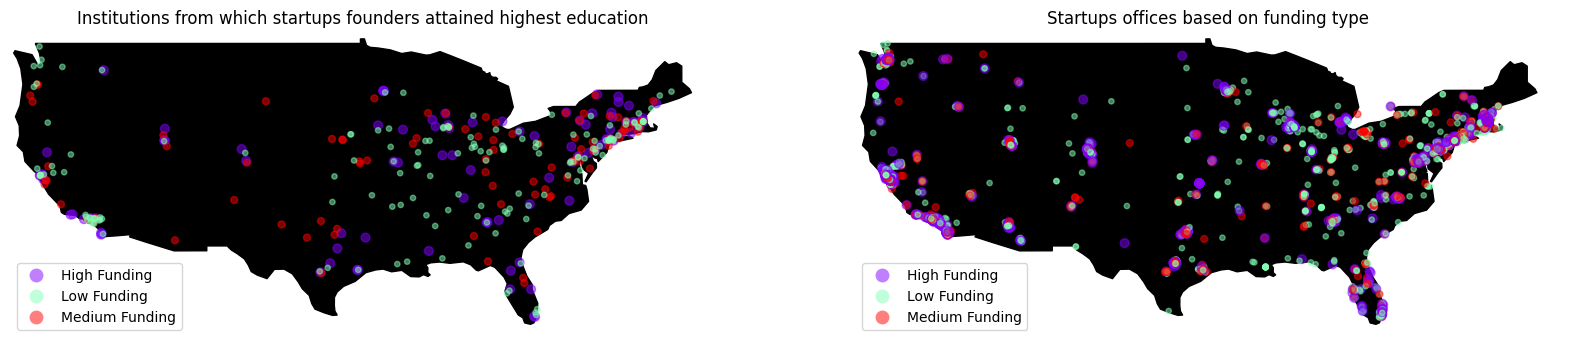

In [211]:
sizes = {'Low Funding': 15, 'Medium Funding': 25, 'High Funding': 40}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

world.query("name == 'United States of America'").plot(ax=ax1, edgecolor='black', color='black')
grouped_school_w_state_gdf.plot(ax=ax1, column='funding_lv', legend=True, alpha=0.5, cmap='rainbow', markersize=grouped_school_w_state_gdf['funding_lv'].map(sizes))

ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
ax1.set_title('Institutions from which startups founders attained highest education', color='black')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_xlim([-125, -65])
ax1.set_ylim([24, 50])

world.query("name == 'United States of America'").plot(ax=ax2, edgecolor='black', color='black')
gdf_comp_filtered.plot(ax=ax2, column='funding_lv', legend=True, alpha=0.5, cmap='rainbow', markersize=gdf_comp_filtered['funding_lv'].map(sizes))

ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')
ax2.set_title('Startups offices based on funding type', color='black')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_xlim([-125, -65])
ax2.set_ylim([24, 50])

ax1.axis('off')
ax2.axis('off')
plt.show()


This first map showcases the distributions of schools from which the founders of startups attained their highest level of education. The difference in colors of the points also shows the average level of funding (Low Funding: <5 million, Medium Funding: >5 but <20 million, High Funding: > 20 million) that startups founded by alumni from that institution received. For interpretation purposes, these data points will be referred to as Low Funding, Medium Funding and High Funding institutions. The regions that are most densely distributed with schools that produce startup founders are the East and Midwest of the US, particularly the NorthEast states that have highest concentration. The schools in NorthEast coastal states (MD, DE, DJ, CT,...) has provided education for a significant number of startups in the dataset. On the other end of the country, California, being home to institutions like UCLA, Stanford,..,  is a state that has a large number of founder-producing universities. Particularly in areas near Stanford University and Caltech, there is a considerable number of Medium and Low Funding institutions.

Institutions in the Southeast and Midwest regions produced founders that vary in performance in terms of total funding raised. In other words, these institutions have relatively equally distributed Low Funding, Medium Funding and High Funding institutions. Interestingly, states such as NY, PA and Texas have schools that consistently produce founders that have Medium and High funding for startups.

Comparing the first map to the second map, it is evident that these two visualizations are very similar, indicating a trend that startups tend to have offices open near the locations of where the founders graduated from their highest level of education. This trend may be explained by the fact that many startups were created by students, and thus to make traveling easier, offices of startups are located close to the founders' universities. This close proximity may also allow startups' founders to utilize schools' resources and connections. The exact cause behind this similarity requires further study.

### Map for the percentage of postsecondary institutions that produce startups founders (startup_schools)

To dive deeper into the question of which state has the best education system for startups to facilitate funding, this analysis will inspect the percentage of institutions that educated founders out of the total number of degree-granting postsecondary institutions in each state.

### Merging with a New Dataset (2)


To gain information about the total number of postsecondary institutions for each state,  the no_school_per_state dataset is imported. The no_school_per_state dataset is a csv file that has been reformatted for use using Excel from the tabn.317.20 dataset, which is a dataset containing information about the total number of degree-granting postsecondary institutions in each state, retrieved from the Integrated Postsecondary Education Data System from the US National Center for Education Statistics.

Importing the new dataset

In [138]:
no_school_per_state = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\A1 project-one-code-NathanKhuat3\no_schools_per_state.csv")
no_school_per_state = no_school_per_state[['state_code', 'total_schools']]
#no_school_per_state.head()

In [139]:
main_df.head()

,person_object_id,degree_type,subject,institution,company_id,title,company_name,funding_total_usd
7,p:1017,BS,Computer Science,Northeastern University,c:300,Founder,PodTech,7500000.0
16,p:5412,MS,Politics,University of Cambridge,c:255914,Founder,Studio Publishing,650000.0
36,p:1243,BA,International Business & Marketing,University of Oregon,c:174451,Co-Founder,TopFloor,6000000.0
54,p:6329,MA,Physics & Philosophy,University of Cambridge,c:76826,"Founder, CEO",Lyst,5000000.0
77,p:1017,MBA,"Entrepreneurship, Finance",Babson College,c:300,Founder,PodTech,7500000.0


In [140]:
#schools_long_lat.head()

In [141]:
state_fd_df = main_df.merge(schools_long_lat, on='institution', how='inner')

In [142]:
no_state_fd_school = state_fd_df.groupby('state_code')['institution'].nunique().reset_index()
#no_state_fd_school.head()

In [143]:
percent_state_fd_school = no_state_fd_school.merge(no_school_per_state, on='state_code', how='inner')
percent_state_fd_school['percentage_fd_schools'] = (percent_state_fd_school['institution'] / percent_state_fd_school['total_schools']) * 100
#percent_state_fd_school.head()

In [144]:
perc_fd_schools_w_states = state_df.merge(percent_state_fd_school, left_on="STUSPS", right_on="state_code", how="inner")

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\3761589189.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(perc_fd_schools_w_states.geometry.centroid.x, perc_fd_schools_w_states.geometry.centroid.y, perc_fd_schools_w_states['state_code']):


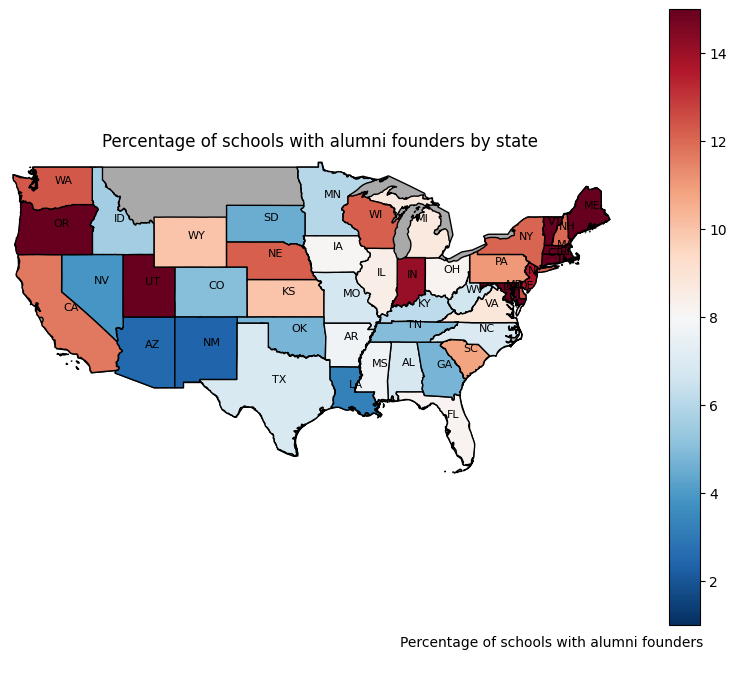

In [145]:
fig, gax = plt.subplots(figsize=(10, 8))

fig.patch.set_facecolor('white')
gax.set_facecolor('black')

world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black', color='darkgrey')
perc_fd_schools_w_states.plot(
    ax=gax, edgecolor='black', column='percentage_fd_schools', legend=True, cmap='RdBu_r', vmax=15, vmin=1)

for x, y, label in zip(perc_fd_schools_w_states.geometry.centroid.x, perc_fd_schools_w_states.geometry.centroid.y, perc_fd_schools_w_states['state_code']):
    gax.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax.set_title('Percentage of schools with alumni founders by state', color='black')
gax.annotate('Percentage of schools with alumni founders', xy=(0.4, 0.05), xycoords='figure fraction', color='black')

gax.set_xlim([-125, -65])
gax.set_ylim([24, 50])

plt.axis('off')
plt.show()

The North East region states, West Coast states as well as some other states are highlighted in red, indicating that these are the areas with a high proportion of schools that startups founders. From this, an assumption can be made that these states provide an ideal educational ecosystem that educated the founders of startups which received funding. Further study should investigate this theory further to determine the validity of this statement, and if proven true, to what extent does the education system from these areas facilitate ideal conditions for startups to flourish. For now, it can be assumed that an education in these regions is associated with a higher chance of preparing students to become successful startups founders in fundraising endeavors. 

## Project 3

## 3.1 Potential Data to Scrape

The U.S’ News Higher Ranking is a potential website candidate for web-scraping, given that the website provide ranking data for each state' higher education by one of US' most renowned media institution. This dataset can provide extra insights into the quality of education in each state and the specific elements that contribute to this quality, which allows this paper to examine the states that have excelent educational ecosystems to see if the relationship between education and startup funding can more firmly established on a geographical level. 

Another approach to take is to look outside the sphere of education to examine other contributing factors to startup funding, specificly from a state-level, where trust-worthy data is easy to come by. Although a correlation has been established between the founders' education and the funding that startup received on a state level, it is important to note that this relationship may be coincidental. In other words, there are other factors other than founders education that impacts the average startup funding in that state, such as startup resources available, skilled workforce and industry clusters in these states. Wikipedia can provide access to two such factors: the state GDP per capita and R&D expenditure to explore other elements of the states that also potentially contribute to higher average startups funding. 

These datasets will be scraped from two different wikipedia websites: List of U.S. states by research and development spending and List of U.S. states and territories by GDP. This information will be scraped, converted into a dataframe, and merged with the average funding of each state dataframe. 

## 3.2 Potential Challenges

Initial dataset idea and challenges

Initially, the U.S’ News Higher Ranking by states (https://www.usnews.com/news/best-states/rankings/education/higher-education) appears to be a desirable dataset to scrape, since it contains ranking about Higher Education for each state, an element of interest and relevance to the research question. One of the challenges for scraping this dataset is that it has a very complex HTML structure with nested structure filled with irregular layout with graphic elements, pictures and link, which makes it very difficult to find the headers of necessary information to extract data. 

The second challenge is that the website does not display all of the rows in the table, but instead rely on a "Load More" interactive button to reveal lower rows. Simply using the website's URL will possibly lead to a lost of information as the initial website interface only shows the ranking for the top 10 states. To be able to extract data fully from this website, I would need to learn to use Selenium WebDriver and write a Python script that simulates user interaction by clicking the button to load content. Once it is fully loaded, likely achieved by using a while loop in the script, I can then proceed with normal webscraping techniques.

Lastly, there might be issues with interpretability as this is ranking data for each state instead of a numerical rating. Explaining the metrics that contribute to this rating ('burden of tuition debt', 'institution cost',....) and relating it directly to the research question can be potential issues

Future practice

In the future, it is best practice to try scraping data from websites that provide it in a clean table format with less visual elements, and as a result, less complex HTML structures. This would expedite the data-scraping process as the process of finding the proper headers used in scraping will be a lot less time consuming. Websites with a "Load More" function should also be avoided as this would impede the data-scraping process, leading to a loss of data.

Other datasets and potential challenges

Alternate datasets to be considered are the List of U.S. states by research and development spending and GDP per capita datasets by Wikipedia (https://en.wikipedia.org/wiki/List_of_U.S._states_by_research_and_development_spending and https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP ). This takes a different approach as they are not related to education of founders, but instead examine other external factors that may impact startup funding (dependent variable) other than the primary independent variables in education, providing a more holistic view of the story. The potential challenges with these two datasets are that the tables use the state names instead of state codes, making merging this dataset into one of the current dataset in the project impossible without modifications. To solve this issue, these datasets will need to be merged with the state code columns first to prepare for merging with the main dataset for startup funding. In addition, the column names would need to be reformatted to maintain consistency with the main dataset.

## 3.3 Scraping Data from a Website

Request the state-level research and development spending information from the website

In [146]:
import requests

wiki_RD_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_research_and_development_spending'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response2 = requests.get(wiki_RD_url, headers=headers)

print('Status code\n', response2.status_code)

Status code
 200


Reformat the scraped content from the website using BeautifulSoup. Create the data_table2 variable which contains the information about the  table from which the desired data can be scraped and the all_values2 variable which contains all the values inside that table.

In [147]:
from bs4 import BeautifulSoup
soup_object2 = BeautifulSoup(response2.content)
data_table2 = soup_object2.find_all('table', "wikitable sortable")[0]
all_values2 = data_table2.find_all('tr')

Create the rd_state dataframe which has a state column and a R&D expenditure of that state column. Use a for loop to loop through the values of the all_values2 variable, get all the text values striped of spaces, and fill the dataframe

In [148]:
rd_state = pd.DataFrame(columns = ['state', 'R&D_expenditure_in_millions'])
ix = 0 

for row in all_values2[1:]:
    values = row.find_all('td')
    state = values[1].text.strip()
    rd_expenditure = values[2].text.strip()

    rd_state.loc[ix] = [state, rd_expenditure]
    ix += 1

#rd_state.head(10)

To reformat the dataframe, merge it with the state_name_code dataset which contains information about the name of the state and the state code, take the columns of interest and rename the column to state_code. Merge with the average startup funding for each state dataframe (avg_funding_state_df), format the name of the funding column and change the units into millions of dollars for visualization purposes. Finally, clean the R&D_expenditure_in_millions column as it is still in str type and may have characters such as ',' ; '$' and extra spaces, get rid of these characters and reformat the column into float type for visualization.

Importantly, the row for the state of California will be dropped for visualization purposes since this state have an extremely high value in R&D expenditure compared to others. This will not impact the visualization or interpretation as that data point also follows the trend identified.

In [149]:
state_name_code = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\A1 project-one-code-NathanKhuat3\state_names.csv")
rd_state_w_code = rd_state.merge(state_name_code, left_on='state', right_on='State', how='inner')
rd_state_w_code = rd_state_w_code[['Alpha code', 'R&D_expenditure_in_millions']]
rd_state_w_code.rename(columns={'Alpha code': 'state_code'}, inplace=True)
rd_state_w_funding = rd_state_w_code.merge(avg_funding_state_df, on="state_code", how="inner")
rd_state_w_funding["funding_total_usd"] = rd_state_w_funding["funding_total_usd"] / 1000000
rd_state_w_funding.rename(columns={'funding_total_usd': 'funding_in_millions'}, inplace=True)
rd_state_w_funding['R&D_expenditure_in_millions'] = rd_state_w_funding['R&D_expenditure_in_millions'].str.replace(',', '').astype(float)

#rd_state_w_funding.head()

Summary statistics for state R&D expenditure

In [150]:
rd_state_w_funding['R&D_expenditure_in_millions'].describe()

count        51.000000
mean      13956.549020
std       31348.351506
min         339.000000
25%        1472.500000
50%        5701.000000
75%       12602.500000
max      217976.000000
Name: R&D_expenditure_in_millions, dtype: float64

The average R&D expenditure for each state is roughly $14 billions and the standard deviation is $31 billion, meaning that the amount of R&D expenditure by different states varies quite substantially from the average.

Request the state-level GDP information from the website

In [151]:
wiki_GDP_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response3 = requests.get(wiki_GDP_url, headers=headers)

print('Status code\n', response3.status_code)

Status code
 200


Reformat the scraped content from the website using BeautifulSoup. Create the data_table3 variable which contains the information about the  table from which the desired data can be scraped and the all_values3 variable which contains all the values inside that table.

In [152]:
from bs4 import BeautifulSoup
soup_object3 = BeautifulSoup(response3.content)
data_table3 = soup_object3.find_all('table', 'sortable wikitable sticky-header-multi static-row-numbers sort-under')[0]
all_values3 = data_table3.find_all('tr')

Create the GDP_per_cap_22 dataframe which has a state column and a GDP per capita column. Use a for loop to loop through the values of the all_values2 variable, get all the text values striped of spaces, and fill the dataframe. Clean the both columns as they are still in str type and may have characters such as ',' ; '$' and extra spaces, get rid of these characters and reformat the GDP_per_cap_22 column into float type for visualization.

In [153]:
GDP_per_cap_22 = pd.DataFrame(columns = ['state', 'GDP_per_cap_22'])
ix = 0 

for row in all_values3[2:]:
    values = row.find_all('td')
    state = values[0].text.strip()
    gdp_per_cap = values[6].text.strip()

    GDP_per_cap_22.loc[ix] = [state, gdp_per_cap]
    ix += 1
GDP_per_cap_22['state'] = GDP_per_cap_22['state'].str.replace('*', '').str.rstrip()
GDP_per_cap_22['GDP_per_cap_22'] = GDP_per_cap_22['GDP_per_cap_22'].str.replace('$', '').str.replace(',', '').astype(float)
#GDP_per_cap_22.head(10)

To reformat the dataframe, merge it with the state_name_code dataset which contains information about the name of the state and the state code, take the columns of interest and rename the column to state_code. Merge with the average startup funding for each state dataframe (avg_funding_state_df), format the name of the funding column and change the units into millions of dollars for visualization purposes. Importantly, the row for the District of Columbia will be dropped for visualization purposes since this state have an extremely high value in GDP per capita in 2022 compared to others. This will not impact the visualization or interpretation as that data point also follows the trend identified.

In [154]:
GDP_per_cap_22_w_code = GDP_per_cap_22.merge(state_name_code, left_on='state', right_on='State', how='inner')
GDP_per_cap_22_w_code = GDP_per_cap_22_w_code[['Alpha code', 'GDP_per_cap_22']]
GDP_per_cap_22_w_code.rename(columns={'Alpha code': 'state_code'}, inplace=True)
GDP_per_cap_22_w_funding = GDP_per_cap_22_w_code.merge(avg_funding_state_df, on="state_code", how="inner")
GDP_per_cap_22_w_funding["funding_total_usd"] = GDP_per_cap_22_w_funding["funding_total_usd"] / 1000000
GDP_per_cap_22_w_funding.rename(columns={'funding_total_usd': 'funding_in_millions'}, inplace=True)
GDP_per_cap_22_w_funding = GDP_per_cap_22_w_funding[GDP_per_cap_22_w_funding['state_code'] != 'DC']
#GDP_per_cap_22_w_funding.head()

Summary statistics for state GDP per capita

In [155]:
GDP_per_cap_22_w_funding['GDP_per_cap_22'].describe()

count        50.00000
mean      71437.48000
std       12812.78067
min       47190.00000
25%       61985.50000
50%       69615.50000
75%       79981.50000
max      104344.00000
Name: GDP_per_cap_22, dtype: float64

The average GDP per capita for each state is roughly $71,500 and the standard deviation is $12,812, meaning that the amount of GDP per capita by different states do not vary significantly from the average.

Merge the two new columns about GDP per capita and R&D expenditure of states into main dataframe

In [156]:
#filtered_edu_na_fd.head()

In [157]:
#filtered_offices.head()

In [158]:
core_df = filtered_edu_na_fd.merge(filtered_offices[['company_id', 'office_id', 'state_code']], on="company_id", how="inner")
core_df = core_df.merge(GDP_per_cap_22_w_funding[['state_code', 'GDP_per_cap_22']], on='state_code', how='inner')
core_df = core_df.merge(rd_state_w_funding[['state_code', 'R&D_expenditure_in_millions']], on='state_code', how='inner')
core_df.rename(columns={'GDP_per_cap_22': 'state_GDP_per_cap_22', 'R&D_expenditure_in_millions': 'state_R&D_expenditure_in_millions'}, inplace=True)
core_df.dropna(subset=['institution'], inplace=True)
#core_df.head()


## 3.4 Visualizing Scraped Data

Text(0, 0.5, '')

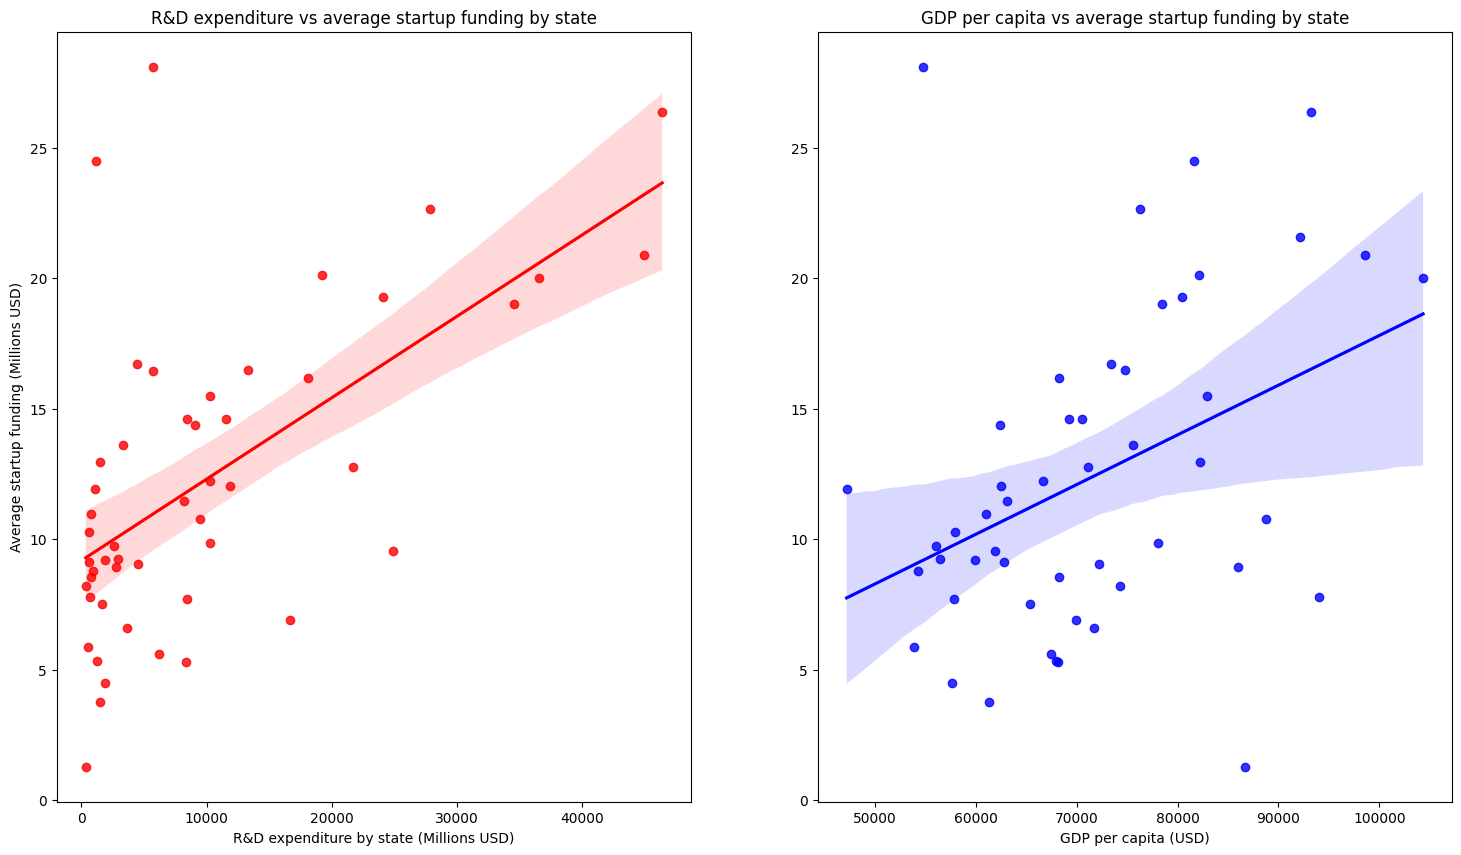

In [224]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.regplot(x='R&D_expenditure_in_millions', y='funding_in_millions', data=rd_state_w_funding[1:], ax=axes[0], color='red')
axes[0].set_title('R&D expenditure vs average startup funding by state')
axes[0].set_xlabel('R&D expenditure by state (Millions USD)')
axes[0].set_ylabel('Average startup funding (Millions USD)')

sns.regplot(x='GDP_per_cap_22', y='funding_in_millions', data=GDP_per_cap_22_w_funding, ax=axes[1], color='blue')
axes[1].set_title('GDP per capita vs average startup funding by state')
axes[1].set_xlabel('GDP per capita (USD)')
axes[1].set_ylabel('')

From this visualization it is evident that there are  relatively strong correlation relationships between state R&D expenditure, state GDP per capita and the average startup funding by state. In other words, companies in states that expend more on Research and Development, a crucial aspect of startups development, typically receive higher funding for startups, most likely as a result of the impeccable quality of the product produced from the R&D development investment. Although it is worth noting that a significant proportion of funding is  reinvested in R&D, so this relationship is reciprocal. Nevertheless, it is likely that companies that have shown strong monetary commitment to R&D have the potential to appear more appealing to investors. In addition, states that have a higher GDP per capita, also tend to have higher startup funding. It is assumed that these states have higher-income investors that are more willing invest more into startups. 

All in all, both state R&D expenditure and state GDP per capita may have influence over average startup funding, revealing the possible need to closely inspect the impact of founders education to access the strength of this factor as a determinant for investors' funding decisions.

Once again, it is important to state that the state of California has been dropped for the left graph and the District of Columbia has been dropped for the right graph due to extreme values. This serves to make the message from the visualization clearer and these datapoints still follow the graph's trends.

C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\482797513.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdp_cap_by_state.geometry.centroid.x, gdp_cap_by_state.geometry.centroid.y, gdp_cap_by_state['state_code']):
C:\Users\kdmq3\AppData\Local\Temp\ipykernel_14652\482797513.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(rd_by_state.geometry.centroid.x, rd_by_state.geometry.centroid.y, rd_by_state['state_code']):


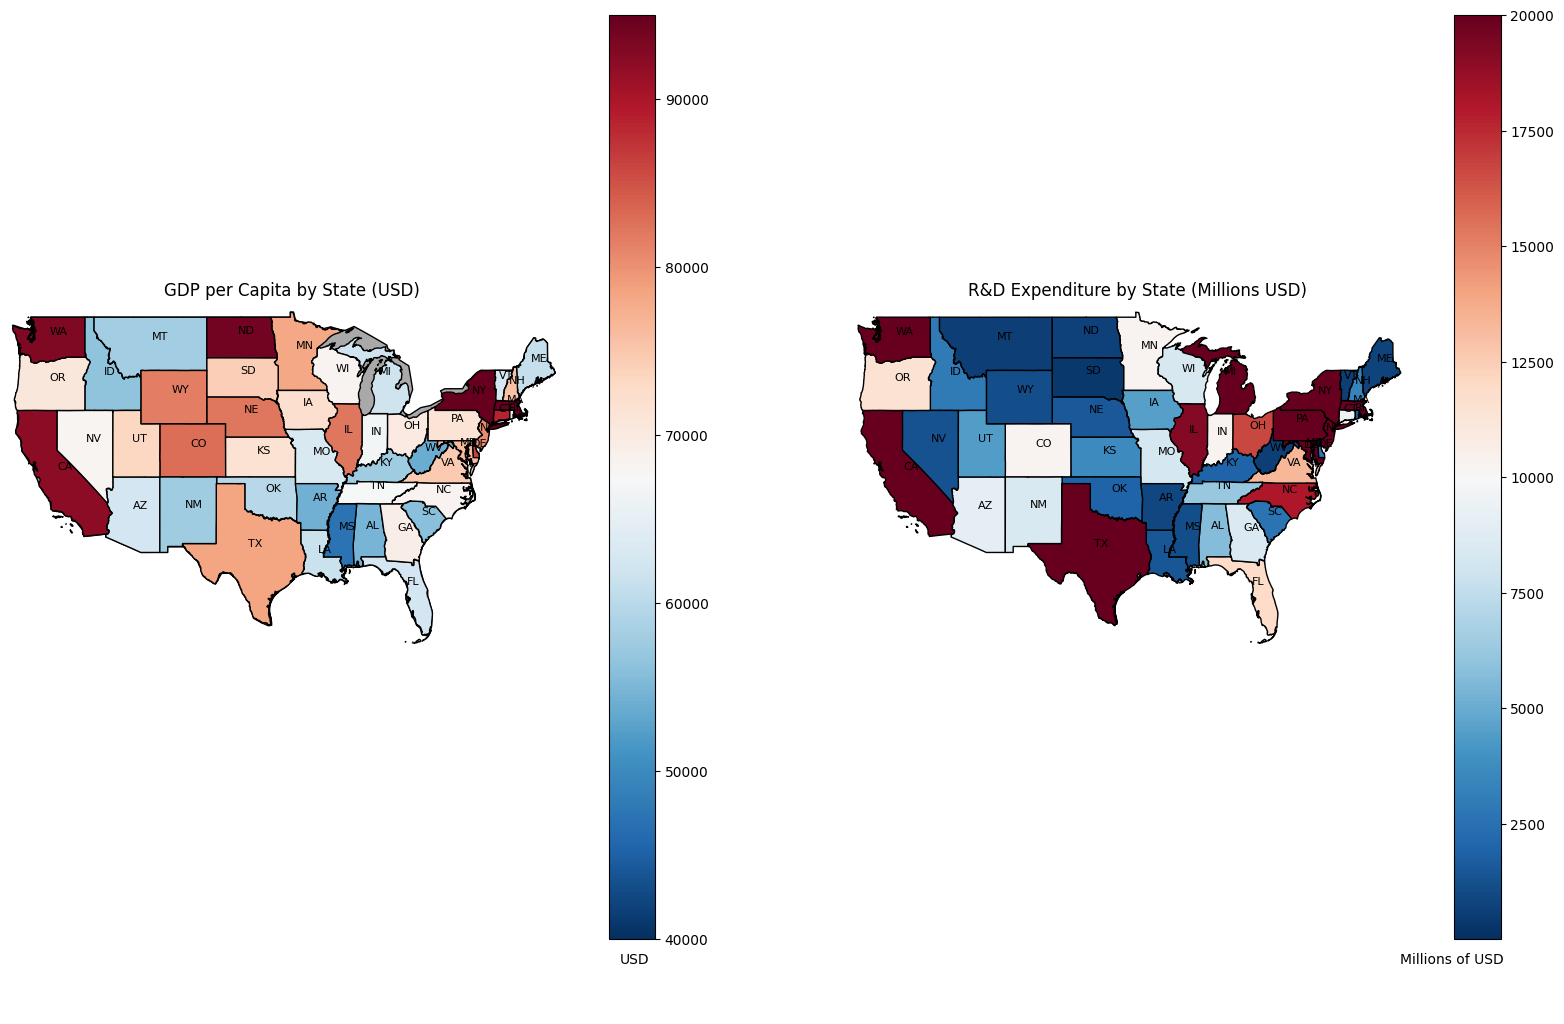

In [219]:

rd_by_state = state_df.merge(rd_state_w_funding, left_on="STUSPS", right_on="state_code", how="inner")
gdp_cap_by_state = state_df.merge(GDP_per_cap_22_w_funding, left_on="STUSPS", right_on="state_code", how="inner")

fig, (gax1, gax2) = plt.subplots(1, 2, figsize=(20, 12))
fig.patch.set_facecolor('white')

world.query("name == 'United States of America'").plot(ax=gax1, edgecolor='black', color='darkgrey')
gdp_cap_by_state.plot(
    ax=gax1, edgecolor='black', column='GDP_per_cap_22', legend=True, cmap='RdBu_r', vmax=95000, vmin=40000)

for x, y, label in zip(gdp_cap_by_state.geometry.centroid.x, gdp_cap_by_state.geometry.centroid.y, gdp_cap_by_state['state_code']):
    gax1.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax1.set_title('GDP per Capita by State (USD)')
gax2.annotate('USD', xy=(0.31, 0.05), xycoords='figure fraction', color='black')

gax1.set_xlim([-125, -65])
gax1.set_ylim([24, 50])

# Plot the second map
rd_by_state.plot(
    ax=gax2, edgecolor='black', column='R&D_expenditure_in_millions', legend=True, cmap='RdBu_r', vmax=20000, vmin=1)

for x, y, label in zip(rd_by_state.geometry.centroid.x, rd_by_state.geometry.centroid.y, rd_by_state['state_code']):
    gax2.annotate(label, xy=(x, y), xytext=(-2, 3), textcoords="offset points", fontsize=8, color='black')

gax2.set_title('R&D Expenditure by State (Millions USD)')
gax2.annotate('Millions of USD', xy=(0.7, 0.05), xycoords='figure fraction', color='black')

gax2.set_xlim([-125, -65])
gax2.set_ylim([24, 50])

gax1.axis('off')
gax2.axis('off')
plt.show()


This visualization provides further information that supports the idea that the correlation between founders' education and the average funding for each state need to be scrutinized. In the two maps, it is clear that certain states such as the WestCoast states, Texas and the Northeast states have high levels of GDP per capita and R&D expenditure. These are the states that have high average startup funding, but also relatively high percentage of schools with alumni founders, Ivy-league founders and high average education levels. 

In short, the main takeaway is that the positive correlation between educational factors of founders and startup funding is not clear cut, as the state-level data that provides support to this relationship also have other characteristics such as high GDP per capita and R&D expenditure which could also be reasons why startups in these states receive higher funding. This emphasizes the importance of determining the strength of the relationship between educational background of founders and startup funding specifically, in regards of other contributing variables.

## 3.5 Adding a New Dataset

The QS University Ranking is one of the most popular rankings for universities, renowned for its impeccable ratings for universities crafted by synthesizing numerous research. The ranking is based on ratings of specific elements of an educational institution. These ratings can provide deeper insights into what specific factors of an educational institution that can help founders secure higher funding for startups. 

These different factors all contribute to the founders’ human capital in different ways, which, as aforementioned, can be linked to higher startup funding. 
1) The Employer Reputation ratings can serve as a potential identifier of competent, innovative and skilled individuals, making them more trustworthy by investors. 
2) The Citations per Faculty rating is a powerful indicator of an institution's research environment, which can provide substantial value to startups in the forms of resources, connections and inventions (Singha, 2023). 
3) The Faculty Student Ratio rating can reveal information such as which schools provide better expert networking opportunities and training for students given the  more accessible faculty. 
4) The International Faculty and 5) International Students rating shows schools that can provide future founders with the diverse international experience of being taught by and working with individuals from different backgrounds. 
6) The Sustainability rating depicts the commitment of institutions to sustainability, and how this may influence young entrepreneurs to incorporate values of sustainability into their startups, which may be highly sought after by investors.

An assumption can be made that all of these characteristics help add to founders’ human capital and can increase the funding chances for startups. By examining the QS University Ranking dataset further, it is possible to identify the specific factors from an educational institution that have a positive effect on startup funding. This is very informative for aspiring entrepreneurs who are currently researching tertiary education prospects.

Retrieve the ratings from the QS datasets. For the purposes of data cleaning and merging, different university campuses in the institution column will be merged into one university and the average ratings for these campuses will be considered.

In [161]:
qs_rating = pd.read_csv(r"C:\Users\kdmq3\OneDrive\Documents\A1 project-one-code-NathanKhuat3\2024 QS World University Rankings 1.2 (For qs.com).csv")
qs_rating = qs_rating[['Institution Name', 'Employer Reputation', 'Citations per Faculty', 'Faculty Student', 'International Faculty', 'International Students', 'Sustainability']]
qs_rating['Institution Name'] = qs_rating['Institution Name'].str.split('[,(-]').str[0].str.rstrip()
qs_rating = qs_rating.groupby('Institution Name')[['Employer Reputation', 'Citations per Faculty', 'Faculty Student', 'International Faculty', 'International Students', 'Sustainability']].mean().reset_index()
qs_rating.head()

,Institution Name,Employer Reputation,Citations per Faculty,Faculty Student,International Faculty,International Students,Sustainability
0,American University,22.8,4.1,30.0,3.0,15.6,3.0
1,Arizona State University,36.7,61.5,6.8,64.5,30.1,97.3
2,Auburn University,8.5,19.0,7.4,23.9,7.8,53.4
3,Baylor University,16.8,8.3,11.7,2.4,3.8,3.8
4,Binghamton University SUNY,4.8,16.9,6.2,8.0,9.9,3.9


Summary statistics of the ratinngs for employer reputations and citations per faculty for each school (added dataset)

In [162]:
qs_rating.describe()

,Employer Reputation,Citations per Faculty,Faculty Student,International Faculty,International Students,Sustainability
count,190.000000,189.000000,190.000000,185.000000,187.000000,166.000000
mean,20.882368,32.196892,32.399276,25.440541,22.647928,41.214383
std,26.638021,26.699821,30.805575,25.345084,26.688372,33.106535
min,1.400000,1.400000,2.800000,1.100000,1.400000,1.000000
25%,4.300000,12.300000,8.900000,6.000000,4.550000,8.600000
50%,8.500000,21.500000,18.900000,15.900000,10.400000,34.450000
75%,24.350000,43.250000,49.775000,36.400000,29.850000,70.400000
max,100.000000,100.000000,100.000000,100.000000,98.200000,99.900000


On average, Sustainability rating for schools was the highest while employer reputation was the lowest average rating among schools on the dataset, at 41.2 and 20.8 points out of 100. Sustainability rating being higher can be explained by the fact that it is missing ratings for around 24 schools. Sustainability is also the rating with the highest standard deviation, meaning that individual school's sustainability vary quite substantially for the mean. From an economic standpoint, the main takeaway is that the average rating for Citations per Faculty, Faculty Student and Sustainability for schools in this datasets are higher, meaning that these characteristics of schools are assessed to be moderately better than the other characteristics (International Faculty, International Students and Employer Reputation).

Distribution of the ratings

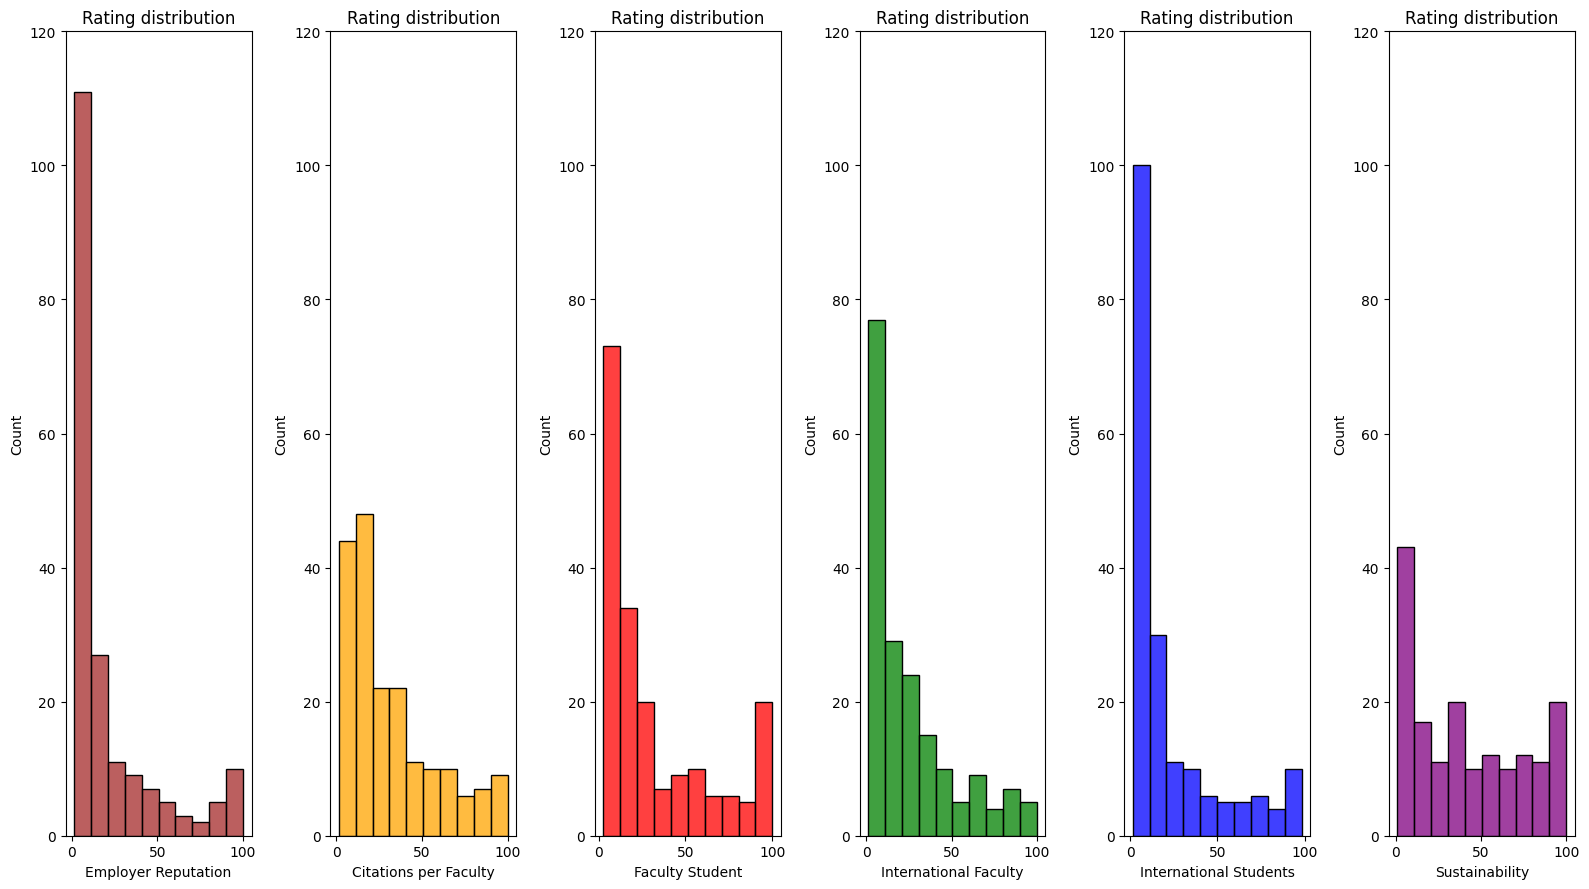

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=len(qs_rating.drop('Institution Name', axis=1).columns), figsize=(16, 9))
colors = ['brown', 'orange', 'red', 'green', 'blue', 'purple']
# Iterate through each column and plot histogram
for i, column in enumerate(qs_rating.drop('Institution Name', axis=1).columns):
    sns.histplot(qs_rating.drop('Institution Name', axis=1)[column], ax=axes[i], bins=10, color=colors[i])  # Adjust the number of bins as needed
    axes[i].set_title('Rating distribution')
    axes[i].set_ylim(0, 120)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

All of the rating distributions are left-skewed, meaning that higher ratings for these characteristics are rarer than lower ratings, specifically for the employer repuation and the international student ratio ratings.

A heatmap that explores the relationship between different ratings with each other

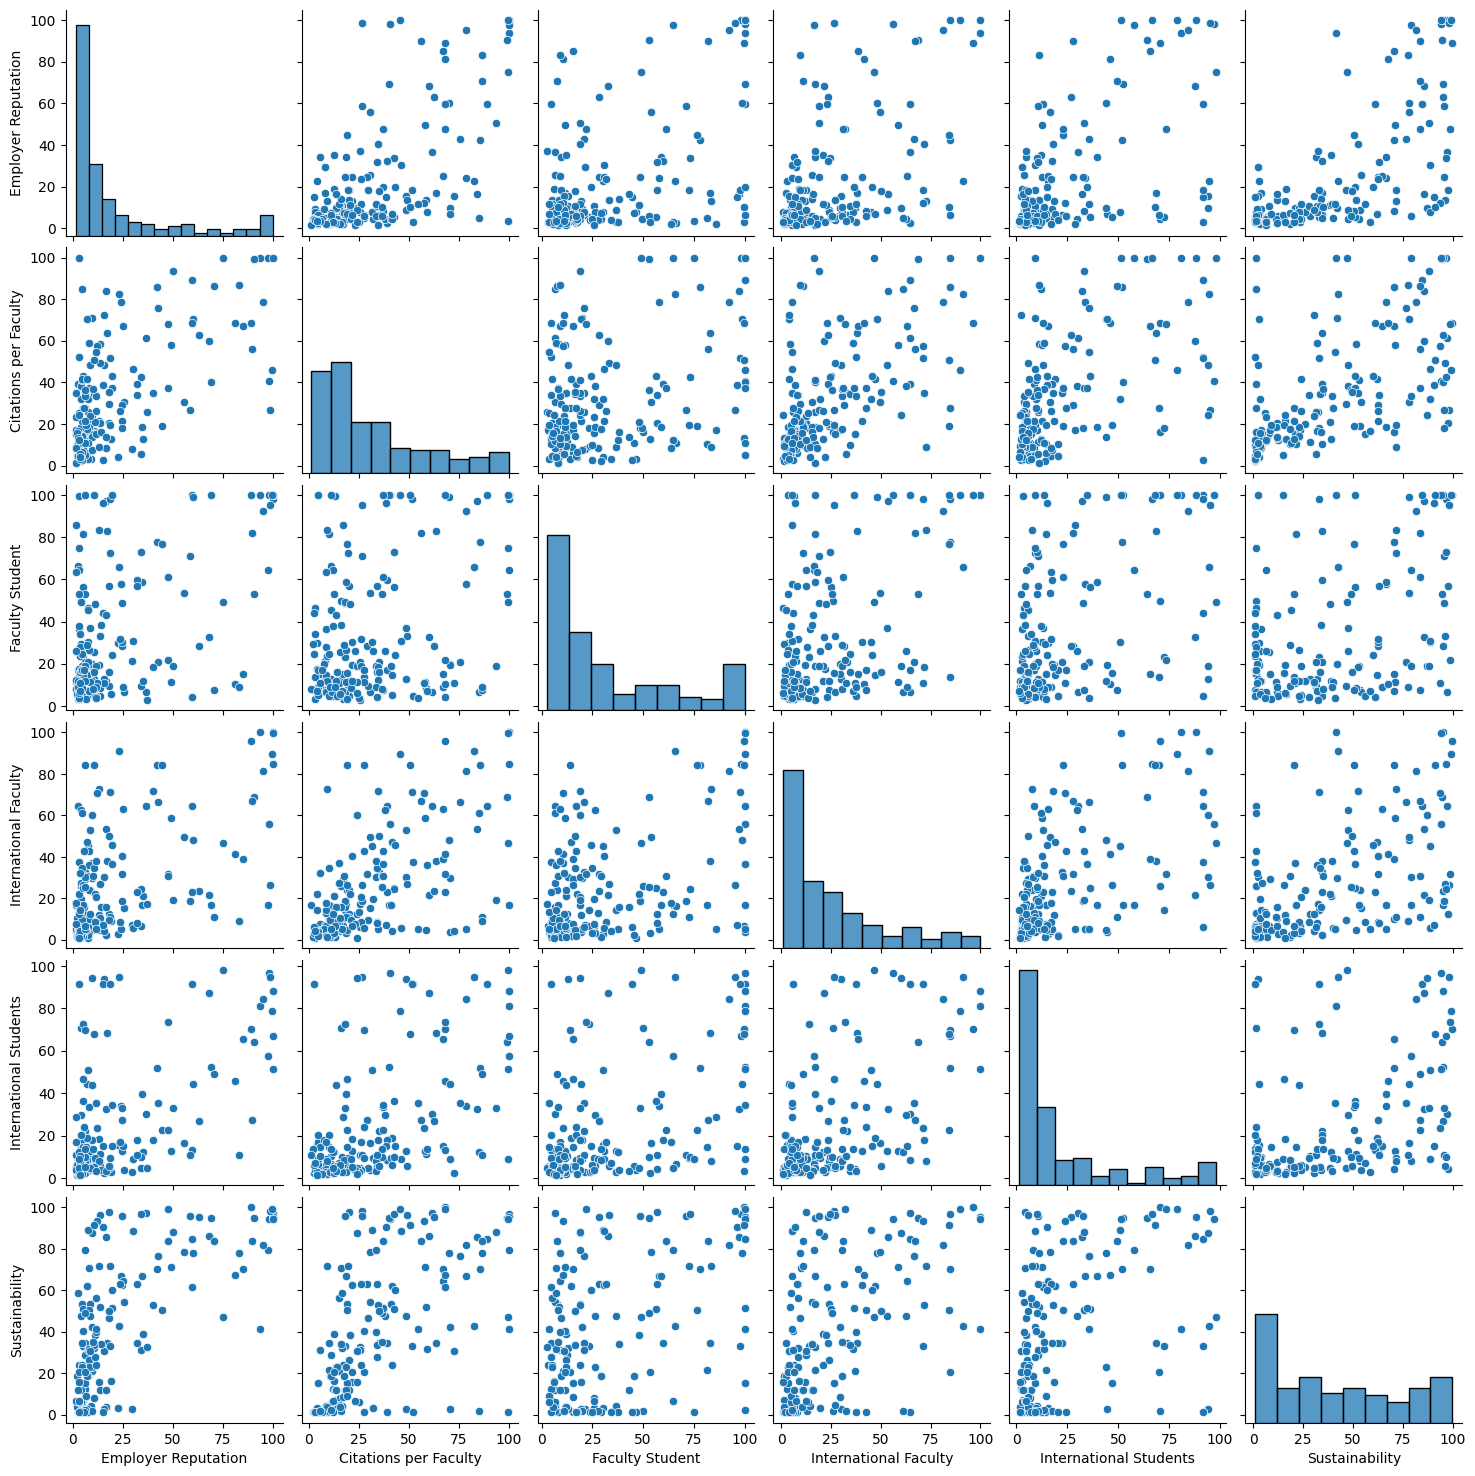

In [229]:
# Test code
sns.pairplot(qs_rating.drop('Institution Name', axis=1))

A very important observation to note that these characteristics all appear to be positively correlated. This indicates that the datset is segregated holistically, meaning that there are higher quality schools that scores well on all aspects and lower quality schools that scores more poorly on all aspects. This will be important to consider when examining the relationship of each characteristic individually on funding.

In [165]:
core_df['institution'] = core_df['institution'].str.split('[,(-]').str[0].str.rstrip()

Merge the main dataset with the qs rating dataset. Create the has_school_rating column which indicates schools from the main dataset that have ratings in the QS top universities ranking and those that do not. It is assumed that those that are not rated are schools of lower quality, based on the research-based and expert-reviewed QS assessment. Observing how startups by founders from these non-Rated schools performed compared to Rated schools will also be a potentially interesting observation.

In [166]:
core_df = core_df.merge(qs_rating, left_on='institution', right_on='Institution Name', how='left')
core_df.drop(columns=['Institution Name'], inplace=True)
core_df.rename(columns={'Employer Reputation': 'employer_reputation', 'Citations per Faculty': "citations_per_faculty", 'Faculty Student': "faculty_student", 'International Faculty': "international_faculty", 'International Students': "international_students", 'Sustainability': "sustainability"}, inplace=True)
cols = ['employer_reputation', 'citations_per_faculty', 'faculty_student', 'international_faculty', 'international_students', 'sustainability']
core_df['has_school_rating'] = np.where(core_df['employer_reputation'].isnull(), 'Not Rated', 'Rated')
#core_df.head()

Round the ratings to integer for visualization comprehension

In [167]:
core_df['employer_reputation'] = core_df['employer_reputation'].round()
core_df['citations_per_faculty'] = core_df['citations_per_faculty'].round()
core_df['faculty_student'] = core_df['faculty_student'].round()
core_df['international_faculty'] = core_df['international_faculty'].round()
core_df['international_students'] = core_df['international_students'].round()
core_df['sustainability'] = core_df['sustainability'].round()
rated_core_df = core_df.loc[core_df['has_school_rating'] == 'Rated']

Group the average funding of startups by rating for visualization comprehension

In [168]:
fund_employer_rep = rated_core_df.groupby('employer_reputation')['funding_in_millions'].mean().reset_index()
fund_citation_fac = rated_core_df.groupby('citations_per_faculty')['funding_in_millions'].mean().reset_index()
fund_fac_stu = rated_core_df.groupby('faculty_student')['funding_in_millions'].mean().reset_index()
fund_int_fac = rated_core_df.groupby('international_faculty')['funding_in_millions'].mean().reset_index()
fund_int_stu = rated_core_df.groupby('international_students')['funding_in_millions'].mean().reset_index()
fund_sus = rated_core_df.groupby('sustainability')['funding_in_millions'].mean().reset_index()

Plot the ratings of schools from which founders graduated against startup funding

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

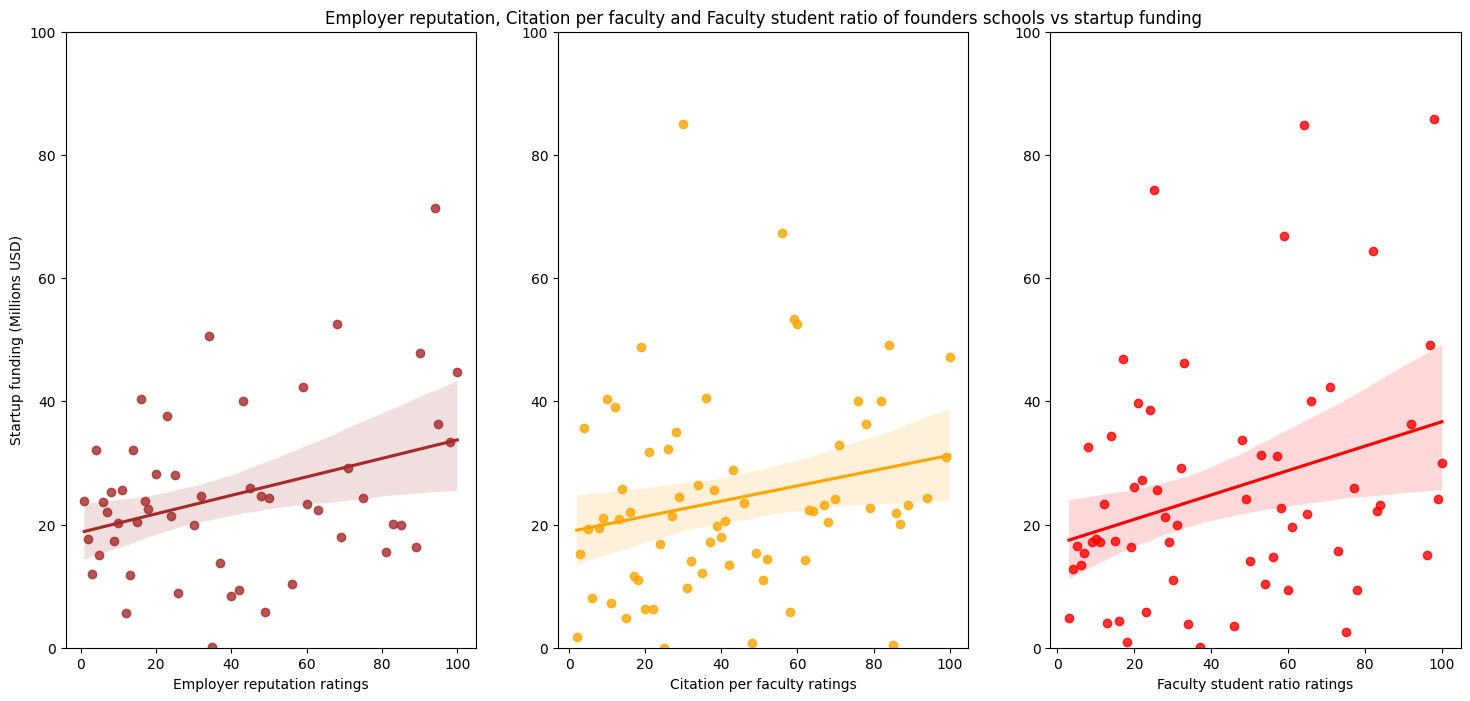

In [227]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

sns.regplot(x='employer_reputation', y='funding_in_millions', data=fund_employer_rep, ax=axes[0], color='brown')
axes[0].set_xlabel('Employer reputation ratings')
axes[0].set_ylabel('Startup funding (Millions USD)')
axes[0].set_ylim(0, 100)

sns.regplot(x='citations_per_faculty', y='funding_in_millions', data=fund_citation_fac, ax=axes[1], color='orange')
axes[1].set_title('Employer reputation, Citation per faculty and Faculty student ratio of founders schools vs startup funding')
axes[1].set_xlabel('Citation per faculty ratings')
axes[1].set_ylabel('')
axes[1].set_ylim(0, 100)

sns.regplot(x='faculty_student', y='funding_in_millions', data=fund_fac_stu, ax=axes[2], color='red')
axes[2].set_xlabel('Faculty student ratio ratings')
axes[2].set_ylabel('')
axes[2].set_ylim(0, 100)

plt.tight_layout

In [170]:
print('employer_reputation_x_funding:', fund_employer_rep['employer_reputation'].corr(fund_employer_rep['funding_in_millions']))
print('citations_per_faculty_x_funding:',  fund_citation_fac['citations_per_faculty'].corr(fund_employer_rep['funding_in_millions']))
print('faculty_student_x_funding:', fund_fac_stu['faculty_student'].corr(fund_employer_rep['funding_in_millions']))

employer_reputation_x_funding: 0.3431794921263795
citations_per_faculty_x_funding: 0.33294013183220256
faculty_student_x_funding: 0.3409013387103036


(0.0, 100.0)

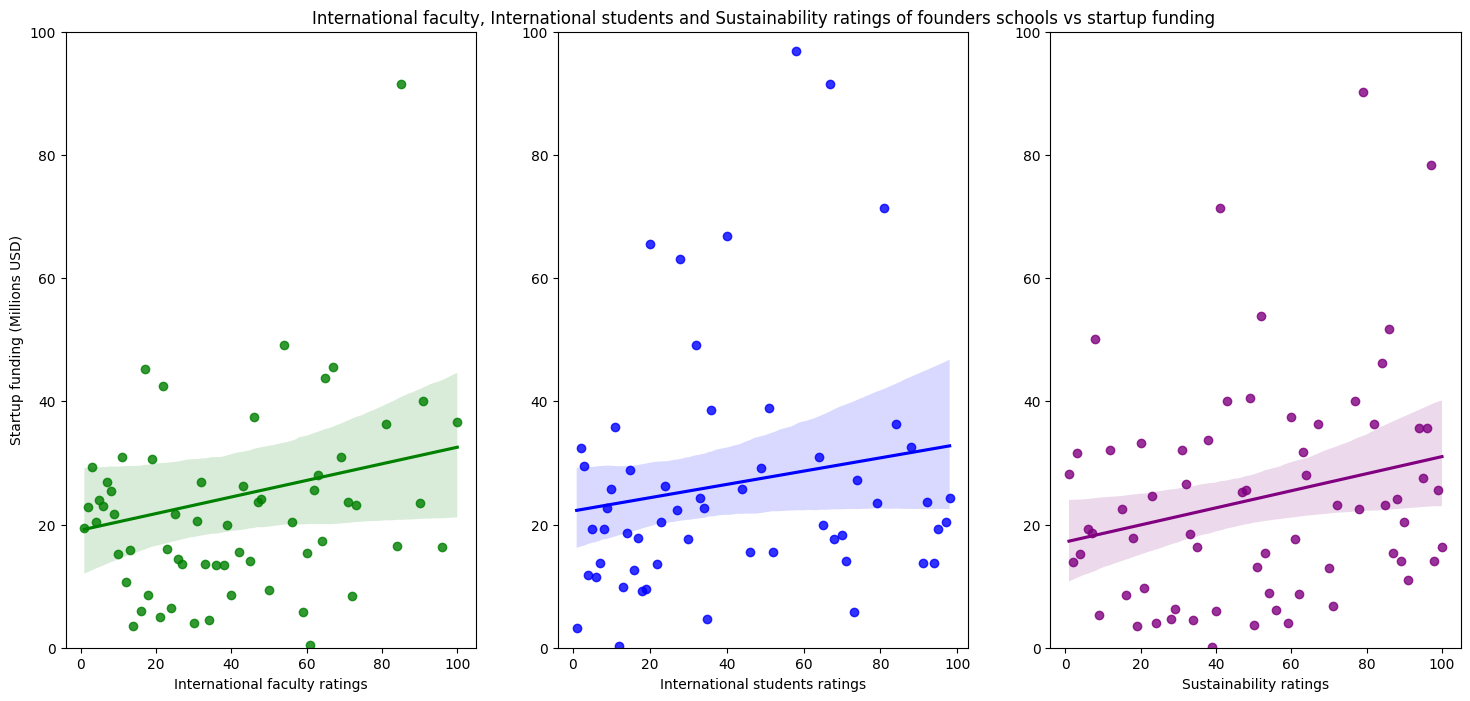

In [228]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

sns.regplot(x='international_faculty', y='funding_in_millions', data=fund_int_fac, ax=axes[0], color='green')
axes[0].set_xlabel('International faculty ratings')
axes[0].set_ylabel('Startup funding (Millions USD)')
axes[0].set_ylim(0, 100)

sns.regplot(x='international_students', y='funding_in_millions', data=fund_int_stu, ax=axes[1], color='blue')
axes[1].set_title('International faculty, International students and Sustainability ratings of founders schools vs startup funding')
axes[1].set_xlabel('International students ratings')
axes[1].set_ylabel('')
axes[1].set_ylim(0, 100)

sns.regplot(x='sustainability', y='funding_in_millions', data=fund_sus, ax=axes[2], color='purple')
axes[2].set_xlabel('Sustainability ratings')
axes[2].set_ylabel('')
axes[2].set_ylim(0, 100)

In [172]:
print('international_faculty_x_funding:', fund_int_fac['international_faculty'].corr(fund_employer_rep['funding_in_millions']))
print('international_students_x_funding:', fund_int_stu['international_students'].corr(fund_employer_rep['funding_in_millions']))
print('sustainability_x_funding:', fund_sus['sustainability'].corr(fund_employer_rep['funding_in_millions']))

international_faculty_x_funding: 0.3209782860643227
international_students_x_funding: 0.3435020594468751
sustainability_x_funding: 0.32231680703509413


All in all, different aspects of founders’ schools such as employer reputation, citation per faculty, faculty-student ratio, international faculty, international students ratios and sustainability all have a marginal positive correlation with startup funding of founders. This means that they appear to be minor factors in the investment decision making process for investors. The similarity between the correlations of all the characteristics with average startup fundings can be explained by the fact that these factors are all positively correlated with each other to a certain degree. In other words, higher quality schools tend to score well across all areas and train founders that receive higher startup funding.

Based on these graphs, employer reputation and international student ratio have slightly stronger positive correlation with funding than other factors. In other words, employer reputation and international student ratio are potentially more influential factors to higher startup funding. One possible explanation of this trend is that founders benefit from the diverse studying experience with peers around the globe in schools that have a higher international student ratio, and this experience is later translated to them building better startups. Furthermore, founders from schools that have a stronger employer reputation are more likely to be recognized by investors as more competent, which helps with the funding decision process. Multiple regression must be implemented to investigate precisely how each characteristic of the founders’ educational institution impacts startup funding. 


Text(0, 0.5, 'Total Funding (Millions USD)')

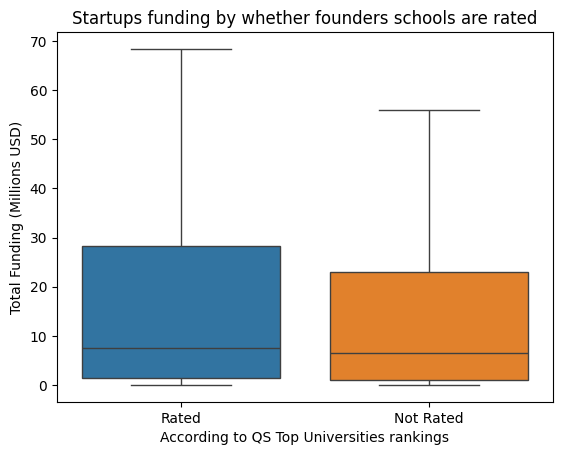

In [173]:
sns.boxplot(x='has_school_rating', y='funding_in_millions', hue='has_school_rating', data=core_df, showfliers=False)

plt.title('Startups funding by whether founders schools are rated')
plt.xlabel('According to QS Top Universities rankings')
plt.ylabel('Total Funding (Millions USD)')

The visualization shows that, on average, higher quality institutions (using the QS ranking as a reliable measure of quality), tend to produce startup founders that perform marginally better in fundraising. Startups founders from rated schools also have the potential to reach higher levels of funding. This provides further support for the assumption that higher quality overall score higher in all characteristics, and founders from these institutions receive higher startup funding as a result.

## Project 4

In [174]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

## 4.1 OLS Regression

To perform regression, 12 independent variables (X-variables) have been chosen to measure their influence on the startup funding (y-variable). These factors may have explanatory power of the startup funding as they consist of individual educational characteristics, external state factors and quality of founders' school characteristics, all of which have the potential to either influence startup funding directly or indirectly, based on the human capital theory. These variables include:
- Highest_education_index (this indicate the founder’s level of education with integers Bachelor as 1, Masters as 2 and PhD as 3)
- studied_STEM_field (this indicates whether the founders studied STEM for his highest qualification)
- Attended_ivy_league (this indicates whether the founders studied at an Ivy League school for his highest qualification)
- state_GDP_per_cap_22 (this indicates the GDP per capita in 2022 of the state in which the office of the startup is located in)
- state_R&D_expenditure_in_millions	(this indicates the R&D expenditure of the state in which the office of the startup is located in)
- Employer_reputation (this indicates the employer reputation rating of the founder’s school)
- Citations_per_faculty (this indicates the research environment rating of the founder’s school)
- Faculty_student (this indicate the faculty student ratio rating of the founder’s school)
- International_faculty (this indicates the international faculty ratio rating of the founder’s school)
- International_students (this indicates the international student ratio rating of the founder’s school)
- Sustainability (this indicates the sustainability rating of the founder’s school)
- Rated_dummy (this indicates whether the founder’s school was rated)


The assumption is that all of these x-variables have a weak linear relationship with the y-variable based on the individual analysis of each of these x-variables with startup funding performed above. In all of the correlation graphs visualized above, a linear relationship between the chosen independent variables and startup funding is relatively weak in strength with a large amount of scatter in every graph. These factors showed that a linear relationship is very challenging to establish firmly. This trend can be explained by the fact that different aspects of founders’ education, although may play some indirect roles in influencing factors, are not the main factors of consideration for startup investors.

Conceptually, relating to the Human Capital theory, these variables all contribute to improving human capital, which is assumed to be an indication of competency, a crucial factor for investors to consider, and therefore capable of impacting startup funding.

However, founders’ education may only have a very weak relationship with startup funding due to other prominent factors that take priority when investors enter the decision making process. Characteristics relating to the startups themselves are likely more influential towards funding, for example, the business model, profitability,  and the skill level of the companies’ workforce are assumably more significant elements to consider. In addition, education is also not the only indicator of a founders’ competency, as this can be judged from many other aspects such as innovation, charisma and other personal qualities. Due to these nuances, there are likely non-linear complexities in the relationship between founders' education and startup funding. In short, based on the significant weight that other factors carry in the funding decision making process, only weak linear relationships can be established between different aspects of founders’ education and startup funding.

In [175]:
core_df_regression = core_df.merge(ivy_fd_df[['person_object_id', 'ivy_dummy']], on='person_object_id', how='left')
#core_df_regression.head()

In [ ]:
ols_regression_df = core_df_regression[['person_object_id', 'company_id', 'education_lv_int', 'STEM_dummy', 'ivy_dummy', 'state_GDP_per_cap_22', 'state_R&D_expenditure_in_millions', 'employer_reputation', 'citations_per_faculty', 'faculty_student', 'international_faculty', 'international_students', 'sustainability', 'has_school_rating', 'funding_total_usd']]
ols_regression_df['funding_total_usd'] = ols_regression_df['funding_total_usd'] / 1000000
ols_regression_df['state_R&D_expenditure_in_millions'] = ols_regression_df['state_R&D_expenditure_in_millions'] / 1000
ols_regression_df['state_GDP_per_cap_22'] = ols_regression_df['state_GDP_per_cap_22'] / 1000
ols_regression_df.rename(columns={'ivy_dummy': 'attended_ivy_league', 'STEM_dummy': 'studied_STEM_field', 'education_lv_int':'highest_education_index', 'funding_total_usd': 'funding_in_millions', 'state_R&D_expenditure_in_millions': 'state_R&D_expenditure_in_billions', 'state_GDP_per_cap_22': 'state_GDP_per_cap_22_in_thousands'}, inplace=True)
ols_regression_df["rated_dummy"] = np.where(ols_regression_df['has_school_rating'] == 'Rated', 1, 0)
ols_regression_df.drop_duplicates(inplace=True)
#ols_regression_df.head()

Education level regression

In [ ]:
ols_regression_df['const'] = 1

X1 = ['const', 'highest_education_index']
X2 = ['const', 'studied_STEM_field']
X3 = ['const', 'attended_ivy_league']
X4 = ['const', 'highest_education_index', 'studied_STEM_field']
X5 = ['const', 'studied_STEM_field', 'attended_ivy_league']
X6 = ['const', 'highest_education_index', 'attended_ivy_league']
X7 = ['const', 'highest_education_index', 'studied_STEM_field', 'attended_ivy_league']




X8 = ['const', 'rated_dummy']
X9 = ['const', 'rated_dummy', 'attended_ivy_league']

X10 = ['const', 'state_GDP_per_cap_22_in_thousands']
X100 = ['const', 'state_GDP_per_cap_22_in_thousands', 'state_R&D_expenditure_in_billions']
X11 = ['const', 'state_GDP_per_cap_22_in_thousands', 'state_R&D_expenditure_in_billions', 'attended_ivy_league']

X12 = ['const', 'citations_per_faculty']
X13 = ['const', 'employer_reputation']
X14 = ['const', 'citations_per_faculty', 'employer_reputation']
X15 = ['const', 'employer_reputation', 'international_faculty']
X16 = ['const', 'citations_per_faculty', 'international_faculty']
X17 = ['const', 'citations_per_faculty', 'employer_reputation', 'international_faculty']
X18 = ['const', 'highest_education_index', 'studied_STEM_field', 'attended_ivy_league', 'state_GDP_per_cap_22_in_thousands', 'state_R&D_expenditure_in_billions', 'citations_per_faculty', 'employer_reputation', 'international_faculty', 'international_students', 'sustainability']

# Estimate an OLS regression for each set of variables
edu_lv_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X1], missing='drop').fit()
stem_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X2], missing='drop').fit()
ivy_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X3], missing='drop').fit()
edu_lv_stem_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X4], missing='drop').fit()
edu_lv_ivy_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X5], missing='drop').fit()
stem_ivy_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X6], missing='drop').fit()
edu_lv_stem_ivy_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X7], missing='drop').fit()

rated_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X8], missing='drop').fit()
rated_ivy_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X9], missing='drop').fit()

stateGDP_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X10], missing='drop').fit()
stateGDP_stateRD_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X100], missing='drop').fit()
stateGDP_stateRD_ivy_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X11], missing='drop').fit()

citations_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X12], missing='drop').fit()
employerrep_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X13], missing='drop').fit()
citations_employerrep_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X14], missing='drop').fit()
employerrep_intfac_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X15], missing='drop').fit()
citations_intfac_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X16], missing='drop').fit()
citations_employerrep_intfac_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X17], missing='drop').fit()

all_regression = sm.OLS(ols_regression_df['funding_in_millions'], ols_regression_df[X18], missing='drop').fit()

### Table 1: Estimates of Founders' Individual Education Characteristics Against Startup Funding

In [178]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

Justification:

The analysis from the above sections suggest a relationship between founders’ level of education, STEM education and Ivy League education with startup funding. To explore these relationships further when considering different variables together, regression models will be utilized. The first three regressions will investigate the individual effects of each variable against startup funding. Regression models (4) to (6) are multivariate regressions which each examine different scenarios where one of the variables are excluded. Lastly, regression model (7) considers the effect of all three variables on startup funding.

$$
\widehat{log(funding)}_i = 28.261 + 0.608 \ {highest education index}_i
$$

This function describes the line that best fits our data for model (1)

$$
\widehat{log(funding)}_i = 26.482 + 9.252 \ {studied STEM field}_i
$$

This function describes the line that best fits our data for model (2)


$$
\widehat{log(funding)}_i = 27.377 + 9.451 \ {attended Ivy League}_i
$$

This function describes the line that best fits our data for model (3)

$$
\widehat{log(funding)}_i = 25.796 + 0.426 \ {highest education index}_i + 9.235\ {studied STEM field}_i
$$

This function describes the line that best fits our data for model (4)

$$
\widehat{log(funding)}_i = 24.259 + 9.89 \ {studied STEM field}_i + 10.262\ {attended Ivy League}_i
$$

This function describes the line that best fits our data for model (5)

$$
\widehat{log(funding)}_i = 27.307 + 0.043 \ {highest education index}_i + 9.444 \ {attended Ivy League}_i
$$

This function describes the line that best fits our data for model (6)

$$
\widehat{log(funding)}_i = 24.579 - 0.203 \ {highest education index}_i + 9.9\ {studied STEM field}_i + 10.295\ {attended Ivy League}_i
$$

This function describes the line that best fits our data for model (7)

In [179]:
stargazer1 = Stargazer([edu_lv_regression, stem_regression, ivy_regression, edu_lv_stem_regression, edu_lv_ivy_regression, stem_ivy_regression, edu_lv_stem_ivy_regression])
HTML(stargazer1.render_html())

Interpretation:

The dummy variables for whether the founders attended an Ivy League school and whether a founder studied a STEM field maintain a statistically significant positive relationship with startup funding, after accounting for the remaining two variables. This indicates that these two variables are potentially good predictors of startup funding. This can be supported by model (5), which excludes the educational level of founders and is the most statistically significant model according to the F statistics. 

According to model (7), holding fixed the education level and whether the founders studied a STEM field, founders that attended an Ivy League school on average raised around $10.3 million more in startup funding than those who did not attend these institutions. Similarly Holding fixed the education level and whether the founders studied at an Ivy League school, founders that studied a STEM field for their highest educational qualification on average raised around $9.9 million more in startup funding than those who did not attend these institutions.

On the other hand, according to all the regressions ran in the table, the level of education of founders' relationship with startup funding appears to be statistically insignificant, which is a major contradiction to previous findings. This is further supported by the fact that in every model that includes this variable, the explanatory power of the model (measured by the F-statistic) is lower. According to model (7), the level of education of founders is likely to be a poor predictor of startup funding. However, it is very important to note that, in general, all of these models are statistically insignificant (having a F statistic < 10), meaning that using the combination of all these factors are not enough in accurately predicting startup finding.

Preferred specification:

Model (7) from table 1 will be chosen as the preferred specification going forward. This regression model factors in the 3 different individual educational background characteristics for founders, consisting of the founders’ level of education, whether they attended an Ivy League school and whether they studied a STEM field for their highest qualification. Out of these three variables, the coefficient for whether they studied a STEM field and whether they studied at an Ivy League institution are statistically significant. Ultimately, this model is chosen as the preferred specification since it is the most relevant to the research question, as the main objective is to see how individual aspects of founders' education affect funding. Machine learning techniques can be utilized to develop a deeper understanding of how these variables correlate with startup funding.

### Table 2: Estimates of Founders' Education Institution's Quality Against Startup Funding

Justification:

The quality of the founders’ schools is an important factor of the founders’ educational background that can interest investors. The variables rated_dummy and attended_ivy_league are indicators of whether the founders’ schools are rated by the QS ranking system, and whether that school was an Ivy League school, and can serve as a measure of institution quality. Running a regression with these variables will give idea into whether these factors affect funding.

$$
\widehat{log(funding)}_i = 25.176 + 7.394 \ {rated Dummy}_i
$$

This equation describes the line that best fits our data for model (1)


$$
\widehat{log(funding)}_i = 24.011 + 6.498 \ {rated Dummy}_i + 8.368 \ {attended Ivy League}_i
$$

This equation describes the line that best fits our data for model (2)

In [180]:
stargazer3 = Stargazer([rated_regression, rated_ivy_regression])
HTML(stargazer3.render_html())


Interpretation:

Holding whether the founder attended an Ivy League school fixed, founders who graduated from a school rated by the QS top university ranking system on average raise about $6.5 million more for their startups than those from non-rated institutions. Additionally, holding whether the founder attended a school rated by the QS top university ranking system fixed, founders who are Ivy-League alumni on average receive $8.4 million more for their startups than non-Ivy League founders. This concur with the previous findings that the higher the quality of the schools, with Ivy League schools being presumed as schools of the highest quality, the more likely that founders from these institutions gain higher funding for their startups.

Evaluation:

These two coefficients are highly statistically significant at a 5% level, which shows that the relationship between rated schools, Ivy League attendance and startup funding are reliable, providing further support for previous analysis.  Nevertheless, the small F-statistics and R-squared indicate that using these two factors by themselves are not enough in accurately predicting startup funding.


### Table 3: Estimates of Characteristics of States Where Startups Are Located Against Startup Funding

Justification:

Other than founders’ education, other environment based factors, such as the GDP per capita and the R&D expenditure of the states the startups’ offices are located in may have an effect on startup funding. Based on previous analysis, these two factors have shown a relatively positive correlation with startup funding, and regression will reveal more information into the nature of these relationships.

$$
\widehat{log(funding)}_i = 5.975 + 0.257 \ {stateGDPperCapthousands}_i
$$

This equation describes the line that best fits our data for model (1)


$$
\widehat{log(funding)}_i = 6.555 + 0.24\ {stateGDPperCapthousands}_i + 0.008\ {state(RandD)expenditurebillions}_i
$$

This equation describes the line that best fits our data for model (2)

$$
\widehat{log(funding)}_i = 8.855 + 0.190 \ {stateGDPperCapthousands}_i + 0.012 \ {state(RandD)expenditurebillions}_i + 8.940 \ {attendedIvyLeague}_i
$$

This equation describes the line that best fits our data for model (3)

In [181]:
stargazer4 = Stargazer([stateGDP_regression, stateGDP_stateRD_regression, stateGDP_stateRD_ivy_regression])
HTML(stargazer4.render_html())

Interpretation:

Based on regression model (2), State GDP per capita appears to have a stronger relationship to startup funding than State R&D expenditure, based on statistical significance. Specifically, holding State R&D expenditure fixed, startups from state that have GDP per capita that $1 thousand higher are associated with having startup funding that is $240,000 higher on average. However, when accounting for the factor of founders studying at an Ivy League school, GDP per capita no longer share a statistically significant relationship with startup funding, as shown in model (3). In other words, it is likely that startups that have higher funding are more associated with having an Ivy League education rather than being located in a high income state. The original effects on startup funding witnessed from state GDP per capita were likely due to high income states being the home to many Ivy League institutions. 

Evaluation:

Once again, the extremely small F-statistics and R-square needs to be taken into consideration as this indicates this model is highly unsuitable for predicting startup funding.

### Table 4: Estimates of Founders' Schools' Characteristics Against Startup Funding

Justification:

The rating on different characteristics of schools where founders studied may indicate what specific aspects of these institutions help influence startup funding. From the analysis performed in the previous sections, the ratings for schools’ reputation with employers, citations per faculty and international faculty ratio have the most positive relationships with startup funding. Running regressions using these variables will provide more information on the nature of their relationship.

$$
\widehat{log(funding)}_i = 12.628 + 0.303 \ {citationsperfaculty}_i
$$

This equation describes the line that best fits our data for model (1)

$$
\widehat{log(funding)}_i = 18.830 + 0.223 \ {employer reputation}_i
$$

This equation describes the line that best fits our data for model (2)

$$
\widehat{log(funding)}_i = 11.894 + 0.239 \ {citationsperfaculty}_i + 0.08 \ {employerreputation}_i
$$

This equation describes the line that best fits our data for model (3)

$$
\widehat{log(funding)}_i = 17.979 + 0.188 \ {employer reputation}_i + 0.054 \ {international faculty}_i
$$

This equation describes the line that best fits our data for model (4)

$$
\widehat{log(funding)}_i = 12.439 + 0.309 \ {citationsperfaculty}_i - 0.005 \ {international faculty}_i
$$

This equation describes the line that best fits our data for model (5)

$$
\widehat{log(funding)}_i = 11.784 + 0.096 \ {employer reputation}_i - 0.045 \ {international faculty}_i + 0.263\ {citationsperfaculty}_i
$$

This equation describes the line that best fits our data for model (6)

In [182]:
stargazer5 = Stargazer([citations_regression, employerrep_regression, citations_employerrep_regression, employerrep_intfac_regression, citations_intfac_regression, citations_employerrep_intfac_regression])
HTML(stargazer5.render_html())

Interpretation:

Out of the three independent variables, the citations per faculty rating for schools appear to be the only variable that maintains a statistically significant positive relationship with startup funding, after accounting for the remaining two variables. This indicates that the citations per faculty rating of school is potentially a good predictor variable of startup funding. In other words, the results from the regressions performed (especially model (3) and (5)) provided support for the claim that founders from schools that have a stronger research environment tend to receive higher funding. Holding fixed the employer reputation rating and the international faculty rating, founders that attended school with 1 unit of citations per faculty rating higher on average raised $263,000 more in startup funding.

From the regression model (6), it is evident that the employer reputation rating and the international faculty rating barely have any relationship with startup funding once accounting for the other two variables. This means that the correlation with funding previously observed from these variables are attributable to the citation per faculty rating rather than their own individual impact. This is further validated by regression (4), which did not include citation per faculty rating and had a poor F-statistic, meaning that the model was statistically insignificant.  



### Table 5: Estimates of All Independent Variables Against Startup Funding

$$
\widehat{log(funding)}_i = -0.54 + 7.964 \ {attendedIvyLeague}_i + 0.252\ {citationsperfaculty}_i + 0.203\ {employerreputation}_i - 3.103\ {highesteducationindex}_i - 0.028\ {internationalfaculty}_i - 0.197\ {internationalstudents}_i + 0.228\ {stateGDPperCapthousands}_i + 0.004\ {state(RandD)expenditurebillions}_i + 9.461\ {studiedSTEMfield}_i - 0.083\ {sustainability}_i
$$

This equation describes the line that best fits our data for model (1)

In [183]:
stargazer6 = Stargazer([all_regression])
HTML(stargazer6.render_html())

Based on the regression model utilizing all explanatory variables, the citations per faculty rating of founders' school and founders' STEM education are highly statistically significant (at the 1% level). This means that these factors have a strong positive effect on startup funding, holding fixed other elements such as level of education, external state factors, Ivy League attendance and other school ratings. The employer reputation rating of the school is also somewhat significantly significant (at the 10% level). Another result is that the international rating of schools share a relatively statistically significant (at the 10% level) negative relationship with startup funding. In summary, the citations per faculty rating of founders' school, founders' STEM education, and the employer reputation rating of founders' school are positively correlated with startup funding, although this relationship for the first two factors is stronger. In contrast, schools with higher international rating appear to be associated with lower startup funding. All of the other independent variables does not seem to share any statistically significant relationship to startup funding, which implies that they are not as influential. It is crucial to note that these interpretations may be unreliable due to the low R-squared and F statistic, which indicate that this model performs poorly in predicting startup funding using these explanatory variables. In specific, only 1% of the variations in startup funding can be explained by all of these independent variables under a Linear Regression Model.
 

## 4.2 Machine Learning 

### Decision Tree Model

In [184]:
X_all = ols_regression_df.drop(["funding_in_millions", "has_school_rating", "person_object_id", "company_id", "const"], axis=1).copy()
X_preferred = ols_regression_df[['highest_education_index', 'studied_STEM_field', 'attended_ivy_league']].copy()
y = np.log(ols_regression_df["funding_in_millions"])

In [185]:
# All x-variables
y_test = np.log(ols_regression_df.dropna().copy()["funding_in_millions"])
X_test = X_all.dropna().copy()

In [186]:
# Preferred x-variables
X_pref = X_test[['highest_education_index', 'studied_STEM_field', 'attended_ivy_league']]


Objective Function 

$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

The Decision Tree model operates based on the objective function above.

Regularization Parameter

In this model there are 3 Regularization Parameters: The Minimum Leaf Size, Maximum tree depth and Alpha. The Minimum Leaf Size dictates the minimum number of observations taken into consideration at each leaf note in order for a split to happen, and choosing a Maximum tree depth decides The Minimum Leaf Size. A higher Minimum Leaf Size will reduce the depths of the tree and result in a simpler model at the cost of underfitting, where the model can not capture all the detail to predict startup funding. Following this logic, the Maximum Tree Depth dictates the number of leaf notes and the simplicity of the model, setting these parameters too low will result in underfitting. Lastly, $\alpha$ also regulates the complexity of the tree, choosing an alpha will decide in the pruning process whether to focus on the model’s ability to explain the data given or on the simplicity of the model. In short all three of these parameters control the complexity of the model, setting these parameters too high will result in overfitting (where the model learns the data too well and give poor predictions) and too low will result in underfitting  (where the model learns the data not well enough and give poor predictions). 

Explanation of the objective function

The Decision Tree model operates based on the objective function above. The model determines the most important features and the threshold of these features to split the data into subregions based on the startup funding associated with these splits. The model then makes  predictions about startup funding based on the subregions and calculates the sum of the errors between its predictions and the actual startup funding, which makes up the first part of the objective function. For the second part of the objective function, the $\alpha$ determines the degree to which the complexity of the model will be punished to prevent overfitting. The number of terminal nodes in the tree represents the complexity and accuracy of the model. There is a tradeoff between overfitting the model, represented by the first part of the objective function and underfitting, represented by the second part of the model.

The max depth is set to 4 for the Decision Tree Model that contains all the independent variable. After tuning, this depth is assumed to be appropriate as it balances the model's complexity and minimizing the standard error. Increasing the depth will reduce the mean squared error at the increased risk of overfitting the data. In contrast, Reducing this depth will reduce the risk of overfitting the data at the cost of providing less accurate predictions. A max depth of 3 is set for the model of the preferred specification as there's only 3 explanatory variables.

In [187]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import r2_score

### Decision Tree Model for all X variables

In [188]:
all_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X_test,y_test)

# Use the fitted tree to predict
y_pred_tree = all_tree.predict(X_test)

# find the error of prediction (MSE) and R-squared
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))
print("R-squared:", r2_score(y_test, y_pred_tree))

Mean Squared Error: 4.215031868382872
R-squared: 0.09103125647789778


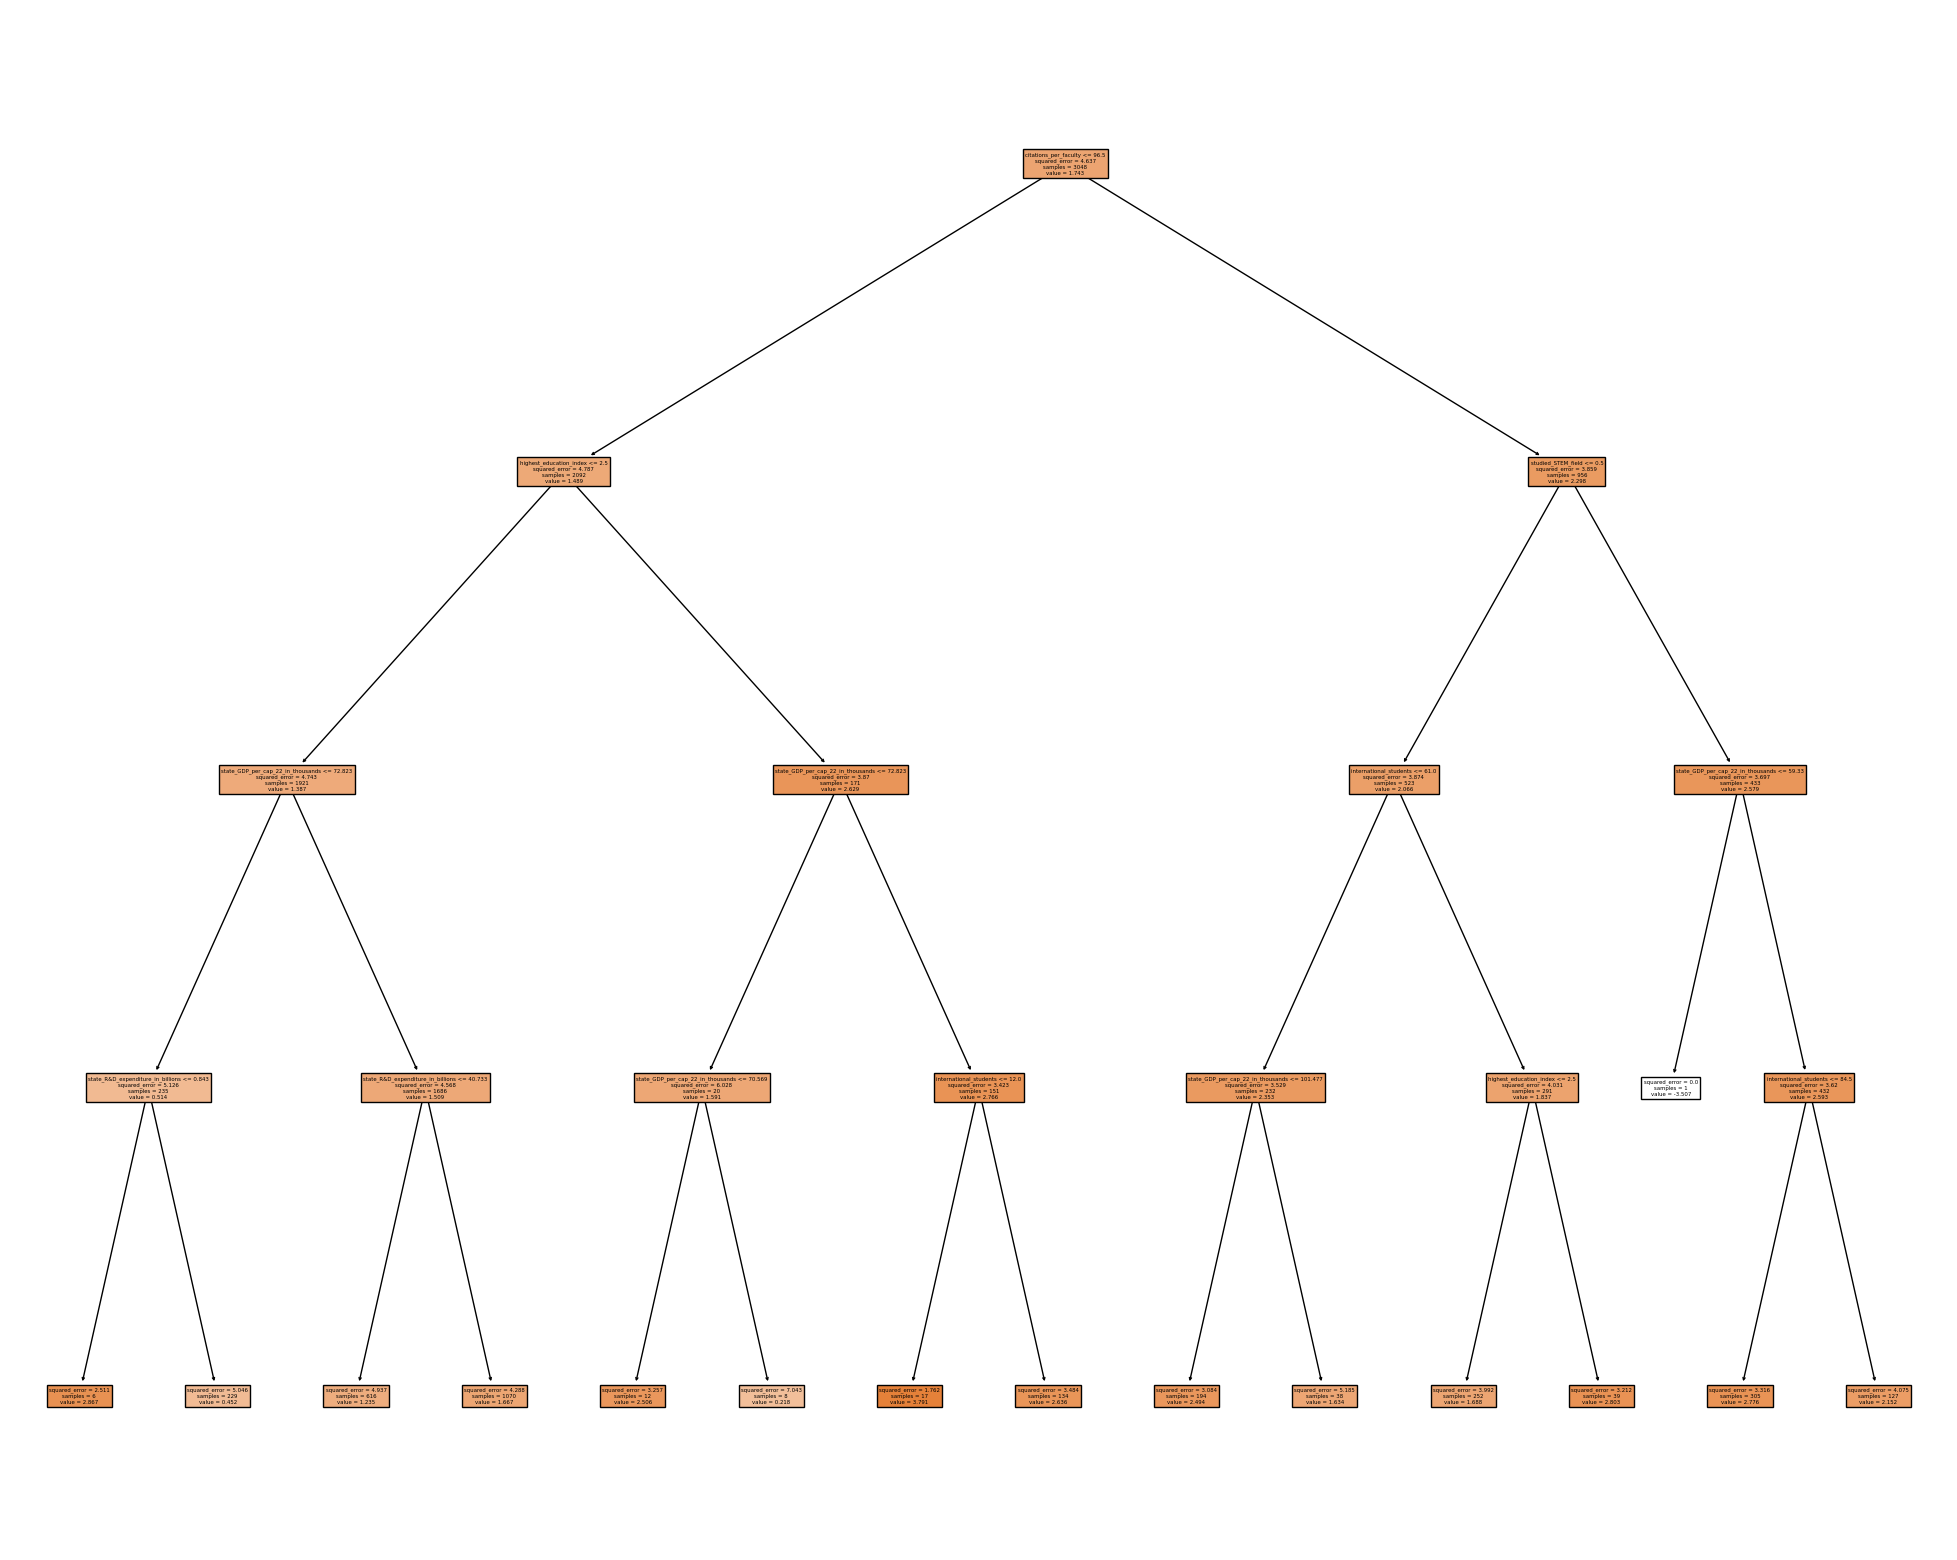

In [189]:
all_tree_fig = plt.figure(figsize=(25,20))
all_tree_fig = tree.plot_tree(all_tree, feature_names=X_all.columns, filled=True)

Interpretation:

This Decision Tree model contains all explanatory variables in the main data frame. Institutions' citations per faculty rating is the top node, which indicates that this dependent variable is the most important in determining the startup funding. The model separated the dataset into two main groups: startups that have founders graduating from schools with a citation per faculty rating above 96.5 points and the remaining startups. Based on the value provided, it seems that average startup funding is considerably higher for founders who studied at schools with a citation per faculty rating higher than 96.5 points. After institutions' citations per faculty rating, the model determines the international faculty ratio rating of schools to be the second most important explanatory factor for startup funding, as it split the dataset based on schools which received an international faculty rating of less than 32. However, since the sample size for schools with this rating range is very limited (37 observations only), the results provided from this branch will likely not be reflective of the dataset and will be neglected. For the other side of the dataset, the next most important variable is whether the founders studied STEM for their highest level of education. For non-STEM founders, the average funding of their startup is relatively lower than STEM founders, and those who studied at schools with less international students performed better in fundraising. Lastly, for STEM founders, the next important criteria to consider is whether the state GDP per capita of that startup is higher than  $59,330. According to the Decision Tree model, the four most important predictors of startup funding are, in order, the founders’ schools’ research environment (citation per faculty), international faculty ratio, whether the founders studied STEM and the GDP per capita of the state where the startup is located. In short, STEM founders who studied at schools with higher ratings for citations per faculty, international faculty and have startups located in states with higher GDP per capita, on average, performed better in fundraising.

### Decision Tree Model for the preferred specification

In [190]:
preferred_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_pref, y_test)

# use the fitted tree to predict
y_pref_pred_tree = preferred_tree.predict(X_pref)

# find the error of prediction (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pref_pred_tree))
print("R-squared:", r2_score(y_test, y_pref_pred_tree))

Mean Squared Error: 4.433923746434883
R-squared: 0.043827372480583104



- For each region, solve  


$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

- Repeat with each of the two smaller rectangles.  
- Stop when $ |R| = $ some chosen minimum size or when depth of tree $ = $
  some chosen maximum.  
- Prune tree.  


$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$


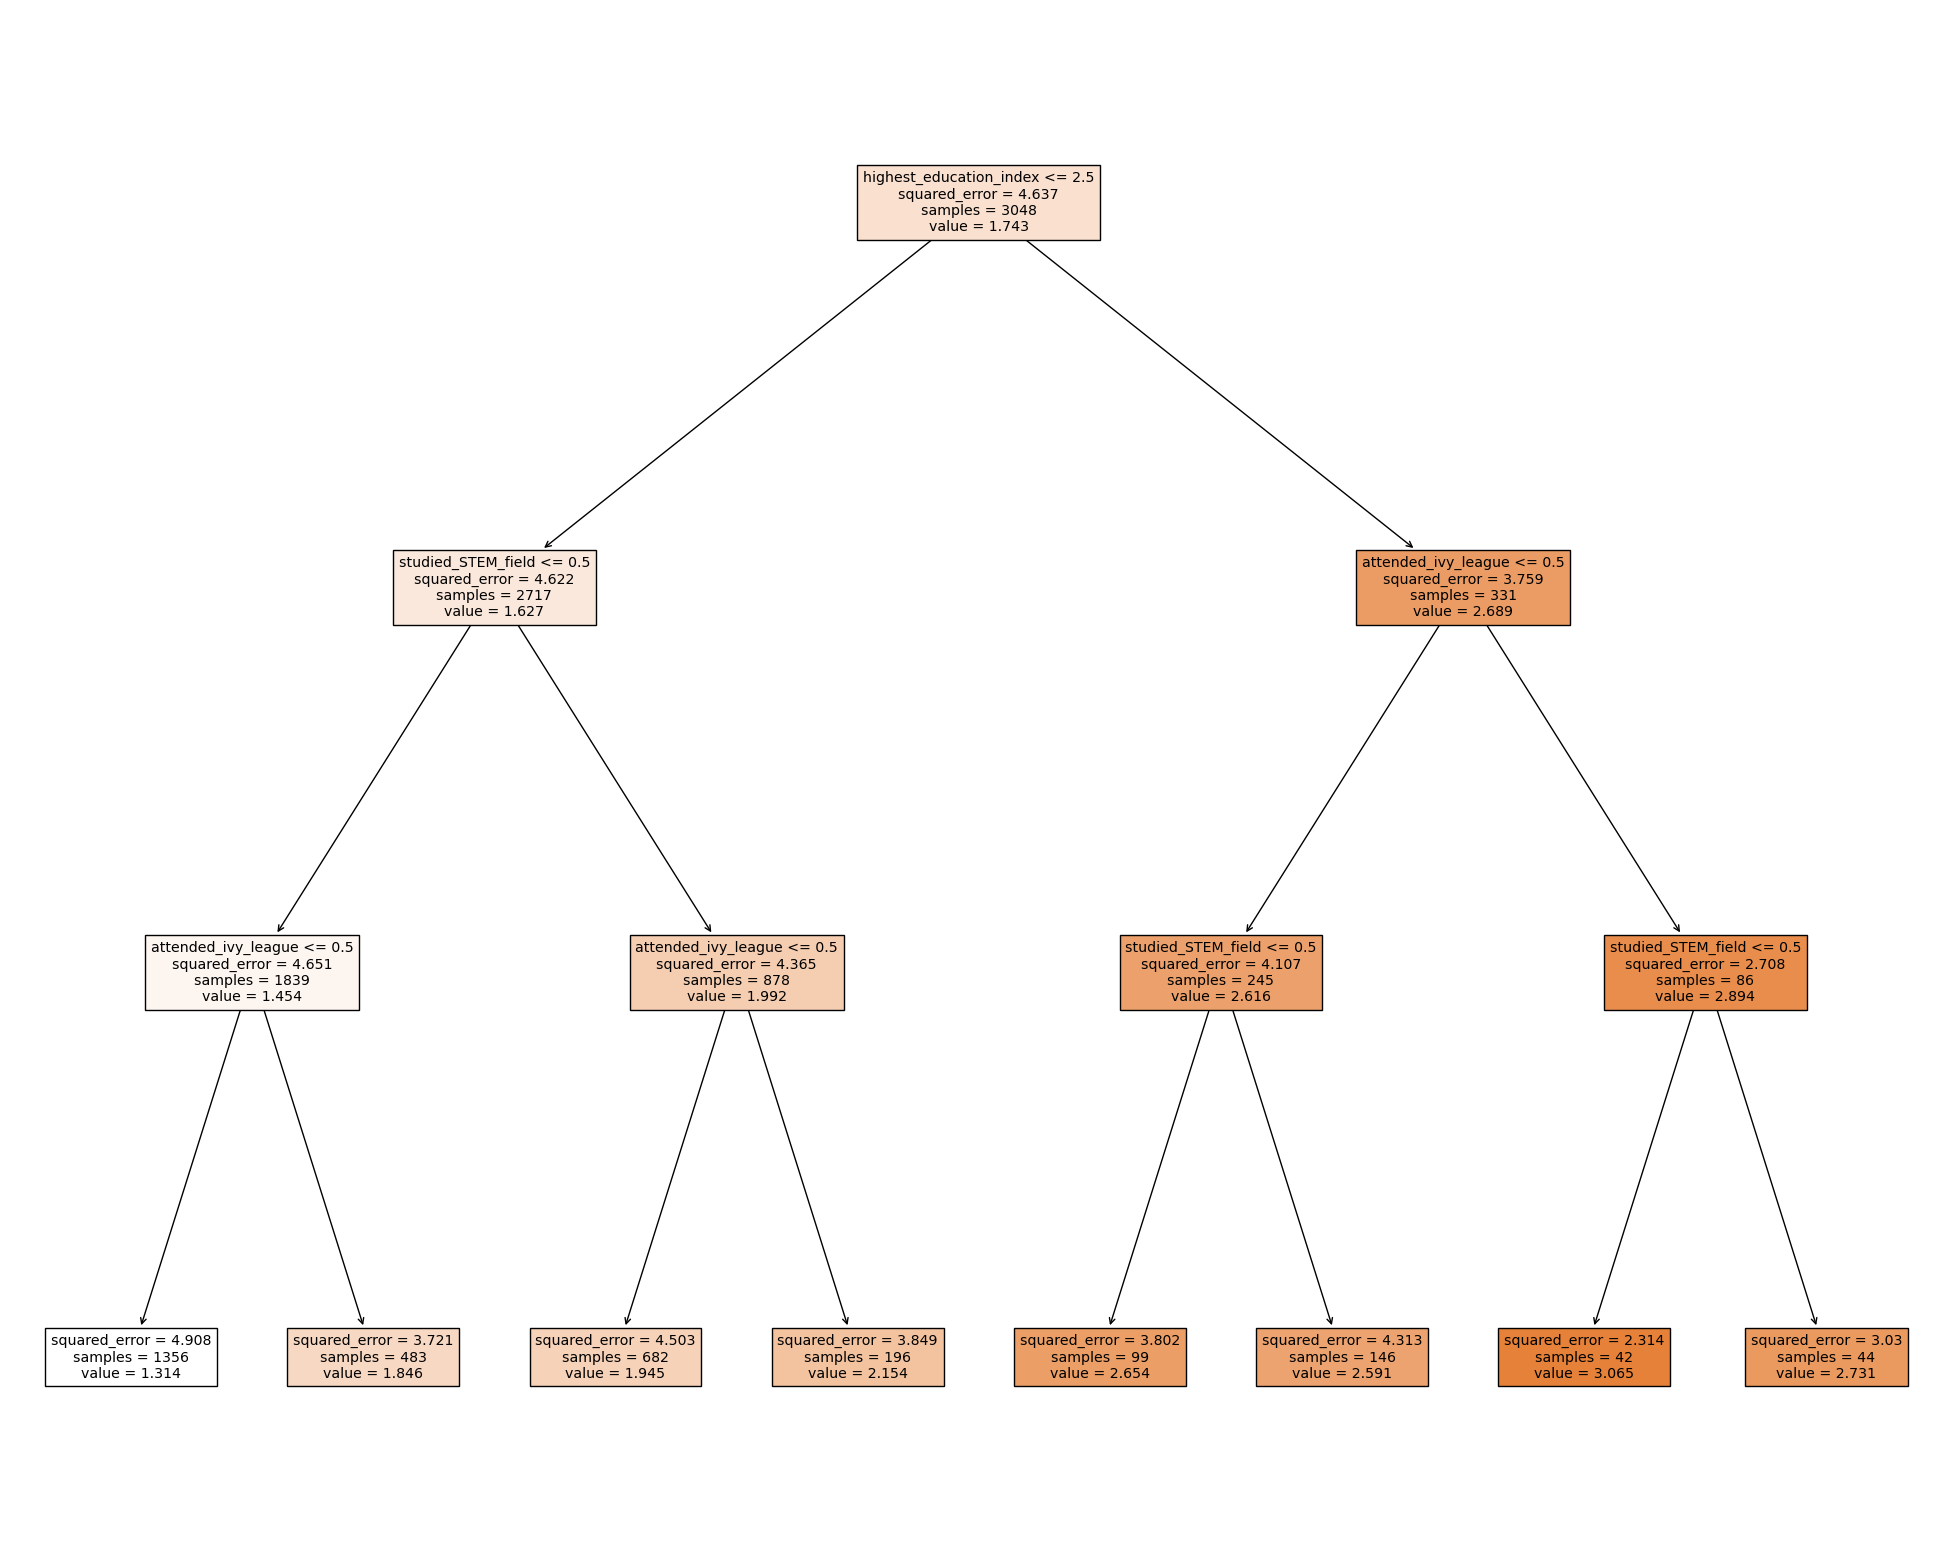

In [191]:
preferred_tree_fig = plt.figure(figsize=(25,20))
preferred_tree_fig = tree.plot_tree(preferred_tree, feature_names=X_preferred.columns, filled=True)

Interpretation:

This Decision Tree model contains 3 explanatory variables from the preferred specification: founders' highest level of education, whether the founders studied a STEM field for their highest qualification and whether the founders studied at an Ivy League school. Founders' highest level of education is the top node, which suggests that this dependent variable is the most important in determining the startup funding. The model determines that startups by founders who studied up to the PhD level (having a highest_education index > 2.5) perform considerably better in fundraising, which is consistent with previous findings. For PhD-level founders, whether they attended an Ivy League institution is the next most important factor in determining startup funding, as Ivy League alumni have more success in fundraising. In contrast, for non-PhD founders, whether they studied a STEM field for their highest qualification is a factor of higher concern than whether they attended an Ivy League school. Overall, the trend is that founders with higher levels of education who graduated from an Ivy League school and study STEM at their highest level of education receive higher funding in general.

In comparison with Linear Regression:

This Decision Tree model showed that the most significant variables in explaining startup funding, in order, are: founders' highest level of education, STEM education and Ivy League education. This is contradictory to the results of the Linear Regression, which determined that, holding fixed the STEM education and Ivy Education factors, the highest education level of the founders share a very statistically insignificant relationship with startup funding. However, both models concur that whether the founders studied a STEM field for their highest qualification and whether they attended an Ivy League school are important determinants of startup funding.

Error of prediction:

The Decision Tree Model for the preferred specification containing the independent variables about the individual educational characteristic of founders performed slightly worse than the model using all of the explanatory variables in the dataset, based on the Mean Squared Error. This means that, under a Decision Tree system, using the level of education, STEM education and Ivy League education factors to predict startup funding is only marginally less accurate than using all of the mentioned variables combined with external state factors and relevant educational school ratings. 

### Random Forest (RF)

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [193]:
# Test code for all x-variables
regr_test = RandomForestRegressor(random_state=1)
regr_test.fit(X_test, y_test)
pred_test = regr_test.predict(X_test)
mean_squared_error(y_test, pred_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print("R-squared:", r2_score(y_test, pred_test))

Mean Squared Error: 2.4587186172817717
R-squared: 0.4697790095042751


### Random Forest Model for all variables

#### Importance Matrix

We can record the total amount that the reduction in mean squared error due to splits over a given predictor, averaged over all trees. If splits on a given predictor (X) results in large reduction in mean squared error, that X is important. 


We can therefore rank all of our Xs based on how much they help us reduce the error and create the importance matrix like below: 

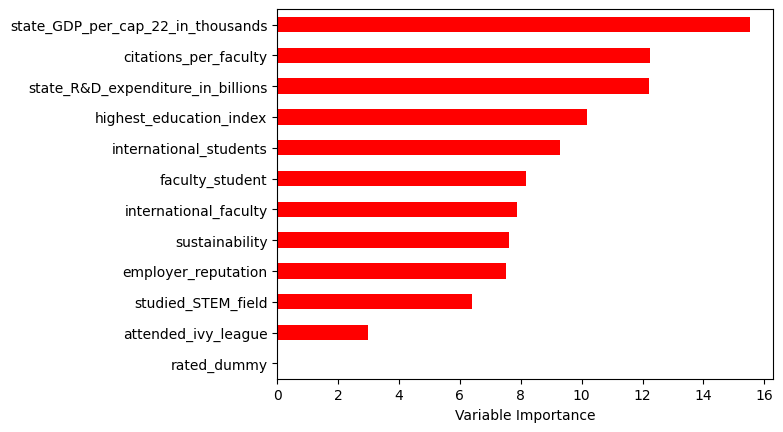

In [194]:
# All x-variables
Importance_test = pd.DataFrame({'Importance':regr_test.feature_importances_*100}, index=X_test.columns)
Importance_test.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The results provided by the Random Forest model utilizing all independent variables are considerably different from the Decision Tree model. According to the former, external factors such as State GDP per capita and State R&D expenditure are more effective determinants of startup funding than most aspects of founders education, ranking 1st and 3rd in terms of their explanatory power of startup funding. The citations per faculty rating for founders' schools are the second most important predictor of startup funding, and the most important factor of founders' education that may have an impact on startup funding. The founders' level of education ranks 4th in terms of explanatory power for startup funding, contradicting the results by the Linear Regression and the Decision Tree. Out of all the independent variables considered, whether the founders studied a STEM field for their highest qualification or attended an Ivy League institution are the least significant predictors of startup funding, ranking behind other types of school ratings.

### Comparing different models

Compared to the Linear Regression model, the Decision Tree is better at capturing non-linear relationships, which is more suitable for the independent variables in this dataset. The Decision Tree model splits data according to features to maximize the accuracy of the model, therefore better capturing the non-linear nuances presented in the data, whereas the Linear Regression model neglect this factor and falsely assumes a firm linear relationship between explanatory variables and startup funding. Additionally, the Decision Tree model provides information about the importance of the specific factors that can impact startup funding and the important thresholds for each factor, which cannot be achieved with a Linear Regression model. These features of the model help answer the research question in terms of comparing the significance of different independent variables to startup funding.

Judging the models' performances based on R-squared, the Random Forest model has the highest accuracy in using factors of founders' education to predict startup funding, followed by the Decision Tree model and the Linear Regression model. Accounting for the variations in all of the independent variables of founders' education, the Random Forest model can explain roughly 47% of the variation in startup funding, which is significantly better than the 9% and 1% of Linear Regression and Decision Tree, respectively. Similarly, for the models using only explanatory variables from the preferred specification, the Random Forest model still outperformed the  Decision Tree model and the Linear Regression models, although to a less significant extent. 

In short, the results provided by the Random Forest models are likely the most accurate out of the 3 types of models. This is expected, as the Random Forest model are better the the other 2 modes at capturing non-linear complexities between the the independent variables and dependent variables. It is also more capable of handling multicollinearity  (a big issue in the dataset) and it is capable of providing a measure of variable importance. The Mean Squared Error of the Random Forest Model is also significantly smaller than that of the Decision Tree Model, indicating superior accuracy in predicting startup funding. In short, based on the most accurate model used in this paper, the factors of founders' education that most impact startup funding is their school's research environment, their level of education and their schools' international students ratio, in that order. All of these factors contribute to building the founders' human capital in different ways, which may potentially play a part in building better startup, leading to higher funding.

## 3.6 Conclusion

As startups navigate the multitude of challenges in staying operational in the current business world, having a deep understanding of human capital and their impact is crucial. This research project has explored the founders' educational background (defined by certain variables) and the amount of funding raised by companies, a pivotal indicator of their success. The Startup Investments dataset provided by Crunchbase has allowed a detailed look into these elements and infer several key insights. 

Firstly, from the dataset, it is assumed that the number of art and science degrees attained by founders of a company is not a contributory factor to attract funding. A higher number of Art degrees will not contribute to a company's fundraising endeavors although having more than one Science degree can have a positive impact. Secondly, exploring the first variable further, the average number of degrees held by the founders of startups is also not a clear determinant in the process of securing fundings. In this light, the quantity of degrees of founders does not appear to be relevant to the total amount of funding received by the startups. 

On the other hand, the quality of the degrees might play an important role. From the analysis performed above, a higher-level academic qualification (a PhD degree as opposed to a Bachelor degree) has a higher average funding amount per degree for the average startup. In general, startups that have founders with higher academic qualifications tend to have higher funding. Another area to consider is whether founders studied in a STEM or non-STEM field, as founders with a STEM background on average secure higher funding than those without. Furthermore, the quality of institutions that founders graduated from is also considered, as the analysis indicates that founders that studied at Ivy League schools are associated with higher-funded startups compared to those who studied at other institutions. This is further consolidated by the finding that schools with top rankings tend to attract slightly higher funding compared to those not ranked. Additionally, the characteristics of founders' schools play a role in influencing startup funding. This paper found that the employer reputation, citation per faculty, faculty-student ratio, international faculty, international students’ ratios and sustainability of founders’ schools could positively impact fundraising for startups to a certain extent.

Various state-level maps provide more support for these findings, despite some inconsistencies arising from the differing startup distributions across states. Essentially, states with higher average education levels and a greater proportion of STEM founders tend to exhibit higher average funding for startups, although this pattern is not consistent across all states. Another interesting finding is that the West Coast and Eastern regions of the US, particularly the Northeastern states, are densely populated with startups offices and have a high percentage of schools that produce startup founders. New York, Pennsylvania, and Texas consistently produce founders securing medium to high levels of funding for startups.

Using different Regression and Machine Learning models, this paper was able to determine the factors that have the most significant relationship with startup. Firstly, the external state factors such as state GDP per capita and State R&D Expenditure are two of the most influential elements to determining the amount of startup funding. Higher funded startups tend to be located in higher-income and R&D-centric states. The research environment of schools where founders studied is determined to be the most important factor in predicting startup funding out of all the elements of the founders’ educational background. Other schools related factors that also have a significant relationship with startup funding are the international student ratio and the faculty-student ratio. In terms of individual educational characteristics, the founders’ level of education is the important factor in predicting startup funding, higher educated founders are associated with higher funded startups. Lastly, the founders’ STEM education and Ivy League education are the least influential variables when it comes to determining startup funding. 

It is important to note that this project has several limitations and areas where future research can build on. Firstly, the original dataset has been modified through a process of data cleaning, filtering, and aggregating. As a result, the remaining sample size has been reduced significantly. Second, the original dataset had many missing values and inconsistencies that cannot be thoroughly addressed by the data cleaning process, leading to possible inaccuracies in the analysis. On the geographical level, there is missing data for many of the states, this is an aspect that could be investigated further to provide a more well-rounded picture. Additionally, future research can explore more complex models that better fit the data than the Random Forest Model, which can provide a more accurate assessment of the degree of impact that educational background factors have on startup funding. 

From this analysis, future research should focus on determining causation in areas where patterns between academic background and funding have been found. Although this paper has established the ground for which potential educational factors can impact startup funding, future papers can aim to explain why these relationships exist and build on the theory and assumptions made in this paper.

# References

Adedeji, Olugbenga S., and Omolara A. Campbell (2013). “The Role of Higher Education in Human Capital Development.” Social Science Research Network, January. https://doi.org/10.2139/ssrn.2380878.

Croak, Mallory (2018). “The Effects of STEM Education on Economic Growth.” Union | Digital Works. https://digitalworks.union.edu/theses/1705/.

Degree-granting postsecondary institutions, by control and classification of institution and state or jurisdiction: (2016). US National Center for Education Statistics. https://nces.ed.gov/programs/digest/d17/tables/dt17_317.20.asp

Franco, S, et al. (2021). Founder Education and start-up funds raised. IEEE Engineering Management Review. https://ieeexplore.ieee.org/document/9428508

Furqon D. A., Permana M. Y., & Komarudin N. A. (2023). The Influence of The Entrepreneurs’ Background on Digital Startups Attaining Investment Milestones in Indonesia. Indonesian Journal of Business and Entrepreneurship (IJBE), 9(3), 502. https://doi.org/10.17358/ijbe.9.3.502

Location of postsecondary institutions by states (Datafile: hd2022) . US National Center for Education Statistics. https://nces.ed.gov/ipeds/datacenter/datafiles.aspx?sid=e0c7fe2c-203f-4077-ad58-99e7316bffcf&rtid=1

Ratzinger, D, et al. (2018). The impact of digital start-up founders’ Higher Education on reaching Equity Investment Milestones. The Journal of technology transfer. https://pubmed.ncbi.nlm.nih.gov/31258242/ 

Ross, Sean. 2023. “What Is the Human Capital Theory and How Is It Used?” Investopedia. September 17, 2023. https://www.investopedia.com/ask/answers/032715/what-human-capital-and-how-it-used.asp.

Singha, Rahul. (2023). “QS World University Rankings Methodology 2023.” Shiksha.Com. June 9, 2023. https://www.shiksha.com/studyabroad/qs-world-university-rankings-methodology-articlepage-2777.

Winters, John V. 2014. “STEM Graduates, Human Capital Externalities, and Wages in the U.S.” Regional Science and Urban Economics 48 (September): 190–98. https://doi.org/10.1016/j.regsciurbeco.2014.07.003.
